In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.lda import LDA
from imblearn.under_sampling.random_under_sampler import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
 
from matplotlib.pyplot import *
%matplotlib inline
#plt.ion()
#from unbalanced_dataset.under_sampling import RandomUnderSampler


C:\Users\omar\Anaconda2\lib\site-packages\sklearn\lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [3]:
TC=['Vastzijde Thermokoppel 01 (1A)','Vastzijde Thermokoppel 02 (1B)','Vastzijde Thermokoppel 03 (1C)',\
'Vastzijde Thermokoppel 04 (1D)','Vastzijde Thermokoppel 05 (1E)','Vastzijde Thermokoppel 06 (1F)',\
'Vastzijde Thermokoppel 07 (1G)','Vastzijde Thermokoppel 08 (1H)','Vastzijde Thermokoppel 09 (1I)',\
'Vastzijde Thermokoppel 10 (1J)','Vastzijde Thermokoppel 11 (2A)','Vastzijde Thermokoppel 12 (2B)',\
'Vastzijde Thermokoppel 13 (2C)','Vastzijde Thermokoppel 14 (2D)','Vastzijde Thermokoppel 15 (2E)',\
'Vastzijde Thermokoppel 16 (2F)','Vastzijde Thermokoppel 17 (2G)', 'Vastzijde Thermokoppel 18 (2H)',\
'Vastzijde Thermokoppel 19 (2I)','Vastzijde Thermokoppel 20 (2J)','Vastzijde Thermokoppel 21 (3A)',\
'Vastzijde Thermokoppel 22 (3B)','Vastzijde Thermokoppel 23 (3C)','Vastzijde Thermokoppel 24 (3D)',\
'Vastzijde Thermokoppel 25 (3E)','Vastzijde Thermokoppel 26 (3F)','Vastzijde Thermokoppel 27 (3G)',\
'Vastzijde Thermokoppel 28 (3H)','Vastzijde Thermokoppel 29 (3I)','Vastzijde Thermokoppel 30 (3J)',\
'Vastzijde Thermokoppel 31 (4A)','Vastzijde Thermokoppel 32 (4B)','Vastzijde Thermokoppel 33 (4C)',\
'Vastzijde Thermokoppel 34 (4D)','Vastzijde Thermokoppel 35 (4E)','Vastzijde Thermokoppel 36 (4F)',\
'Vastzijde Thermokoppel 37 (4G)','Vastzijde Thermokoppel 38 (4H)','Vastzijde Thermokoppel 39 (4I)',\
'Vastzijde Thermokoppel 40 (4J)','Vastzijde Thermokoppel 41 (5A)','Vastzijde Thermokoppel 42 (5B)',\
'Vastzijde Thermokoppel 43 (5C)','Vastzijde Thermokoppel 44 (5D)','Vastzijde Thermokoppel 45 (5E)',\
'Vastzijde Thermokoppel 46 (5F)','Vastzijde Thermokoppel 47 (5G)','Vastzijde Thermokoppel 48 (5H)',\
'Vastzijde Thermokoppel 49 (5I)','Vastzijde Thermokoppel 50 (5J)',\
'Loszijde Thermokoppel 01 (1A)','Loszijde Thermokoppel 02 (1B)','Loszijde Thermokoppel 03 (1C)',\
'Loszijde Thermokoppel 04 (1D)','Loszijde Thermokoppel 05 (1E)', 'Loszijde Thermokoppel 06 (1F)',\
'Loszijde Thermokoppel 07 (1G)','Loszijde Thermokoppel 08 (1H)','Loszijde Thermokoppel 09 (1I)',\
'Loszijde Thermokoppel 10 (1J)','Loszijde Thermokoppel 11 (2A)','Loszijde Thermokoppel 12 (2B)',\
'Loszijde Thermokoppel 13 (2C)','Loszijde Thermokoppel 14 (2D)','Loszijde Thermokoppel 15 (2E)',\
'Loszijde Thermokoppel 16 (2F)','Loszijde Thermokoppel 17 (2G)','Loszijde Thermokoppel 18 (2H)',\
'Loszijde Thermokoppel 19 (2I)','Loszijde Thermokoppel 20 (2J)','Loszijde Thermokoppel 21 (3A)',\
'Loszijde Thermokoppel 22 (3B)','Loszijde Thermokoppel 23 (3C)','Loszijde Thermokoppel 24 (3D)',\
'Loszijde Thermokoppel 25 (3E)','Loszijde Thermokoppel 26 (3F)','Loszijde Thermokoppel 27 (3G)',\
'Loszijde Thermokoppel 28 (3H)','Loszijde Thermokoppel 29 (3I)','Loszijde Thermokoppel 30 (3J)',\
'Loszijde Thermokoppel 31 (4A)','Loszijde Thermokoppel 32 (4B)','Loszijde Thermokoppel 33 (4C)',\
'Loszijde Thermokoppel 34 (4D)','Loszijde Thermokoppel 35 (4E)','Loszijde Thermokoppel 36 (4F)',\
'Loszijde Thermokoppel 37 (4G)','Loszijde Thermokoppel 38 (4H)','Loszijde Thermokoppel 39 (4I)',\
'Loszijde Thermokoppel 40 (4J)','Loszijde Thermokoppel 41 (5A)','Loszijde Thermokoppel 42 (5B)',\
'Loszijde Thermokoppel 43 (5C)','Loszijde Thermokoppel 44 (5D)','Loszijde Thermokoppel 45 (5E)',\
'Loszijde Thermokoppel 46 (5F)','Loszijde Thermokoppel 47 (5G)','Loszijde Thermokoppel 48 (5H)',\
'Loszijde Thermokoppel 49 (5I)','Loszijde Thermokoppel 50 (5J)',\
'Smalzijde KB (Right) Thermokoppel 61 (1A)','Smalzijde KB (Right) Thermokoppel 62 (1B)',\
'Smalzijde KB (Right) Thermokoppel 63 (2A)','Smalzijde KB (Right) Thermokoppel 64 (2B)',\
'Smalzijde KB (Right) Thermokoppel 65 (3A)','Smalzijde KB (Right) Thermokoppel 66 (3B)',\
'Smalzijde KB (Right) Thermokoppel 67 (4A)','Smalzijde KB (Right) Thermokoppel 68 (4B)',\
'Smalzijde KB (Right) Thermokoppel 69 (5A)','Smalzijde KB (Right) Thermokoppel 70 (5B)',\
'Smalzijde KK (Left) Thermokoppel 61 (1A)','Smalzijde KK (Left) Thermokoppel 62 (1B)',\
'Smalzijde KK (Left) Thermokoppel 63 (2A)','Smalzijde KK (Left) Thermokoppel 64 (2B)',\
'Smalzijde KK (Left) Thermokoppel 65 (3A)','Smalzijde KK (Left) Thermokoppel 66 (3B)',\
'Smalzijde KK (Left) Thermokoppel 67 (4A)','Smalzijde KK (Left) Thermokoppel 68 (4B)',\
'Smalzijde KK (Left) Thermokoppel 69 (5A)','Smalzijde KK (Left) Thermokoppel 70 (5B)']

In [4]:
chemin="C:\\Users\\omar\\Desktop\\TE\\ALL_TE\\TE\\new\\"
Nom_Des_Fichiers_Qualite=[]

In [5]:
for element in os.listdir(chemin):
    if element.endswith('.csv'):
        elementCSVFinal=chemin + element
        Nom_Des_Fichiers_Qualite.append(elementCSVFinal)

In [6]:
list_df=[]
for fichier in  Nom_Des_Fichiers_Qualite: 
    print fichier
    with open(fichier, "r") as f:
        Csv_File = pd.read_csv(f, sep=';') 
        f.close()
    list_df.append(pd.DataFrame(Csv_File) )# Mettre les donnees dans un Data Frame

C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_12032012.csv
C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_18092012.csv
C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_19092012.csv
C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_22012013.csv
C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_23012013.csv
C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_TE_L3 14032016 PM.csv
C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_TE_L3 16032016 PM.csv
C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_TE_L3 19012016 AM.csv
C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_TE_L3 19012016 PM.csv
C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_TE_L3 20012016 AM part1.csv
C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_TE_L3 20012016 AM part2.csv
C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_TE_L3 21012016 PM1.csv
C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_TE_L3 21012016 PM2.csv
C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_TE_L4 150316 PM.csv
C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_TE_L4 16032016 AM.csv


C:\Users\omar\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (123,124,125,126,127,128,129,130,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_TE_L4 16032016 PM.csv
C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_TE_L4 17032016 PM part1.csv
C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_TE_L4 17032016 PM part2.csv
C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_TE_L4 19012016 AM.csv
C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_TE_L4 20012016 AM part1.csv
C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_TE_L4 20012016 AM part2.csv
C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_TE_L4 21012016 PM1.csv
C:\Users\omar\Desktop\TE\ALL_TE\TE\new\TE_TE_L4 21012016 PM2.csv


In [17]:
len(list_df)

23

In [19]:
def fn_Format(x,y,format_range,type_format,df):
    
    j=0
    l=[]
    Instable=[]
    SR=[]
    DR=[]
    MR=[]
    Tot=[]
    
    for i in np.arange(x,y,format_range):
        if type_format=='Width':
            df_temp=df[(df.Width>i) & (df.Width<i+format_range)]
        elif type_format=='Speed':
            df_temp=df[(df.Speed.round(2)>i) & (df.Speed.round(2)<i+format_range)]
            
        y_list=df_temp['TypeE']
        l.append(str(i)+":"+str(i+format_range))
        Instable.append(sum(1 for i in y_list if i==0))
        SR.append(sum(1 for i in y_list if i==1))
        DR.append(sum(1 for i in y_list if i==2))
        MR.append(sum(1 for i in y_list if i==3))
        t=len(df_temp)
        Tot.append(t)
        j=len(Tot)

    return l,SR,DR,MR,Instable,j,Tot

def fn_plot_TypeE (l,SR,MR,Instable,j,type_format):
    ind = np.arange(j)  # the x locations for the groups
    width = 0.25     # the width of the bars
    
    font = {'family': 'serif','color':  'darkred', 'weight': 'normal', 'size': 16,}
    fig = plt.figure(figsize=(40,20))
    ax = fig.add_subplot(111)
    plt.title('Mould Flow pattern /'+ type_format, fontsize=40,fontdict=font)
    rects1 = ax.bar(ind, SR, width, color='r')
    rects2 = ax.bar(ind+width, MR, width, color='b')
    rects3 = ax.bar(ind+width*2, DR, width, color='g')
    
    if type_format=="Width":
        unite="(mm)"
    else:
        unite="(m/min)"
        
    ax.set_ylabel('Numbers of features (seconds)',fontsize=40,fontdict=font)
    ax.set_xlabel( type_format+ ' range ' +unite,fontsize=40,fontdict=font)
    
    ax.set_xticks(ind+width+0.14)
    ax.set_xticklabels(l)
    ax.legend( (rects1[0], rects2[0], rects3[0]), ( 'Single roll', 'mixed ','Double Roll ') ,prop={'size':40})
    ax.xaxis.set_tick_params(labelsize=30)
    ax.yaxis.set_tick_params(labelsize=30)

    def autolabel(rects):
        for rect in rects:
            h = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., h + 10, '%d'%int(h),size=27, ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    plt.show()

In [20]:
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=90)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
for i in range(len(list_df)):
    list_df[i]=list_df[i].dropna()
    list_df[i]=list_df[i].loc[list_df[i]['TypeE'] != 0 ]

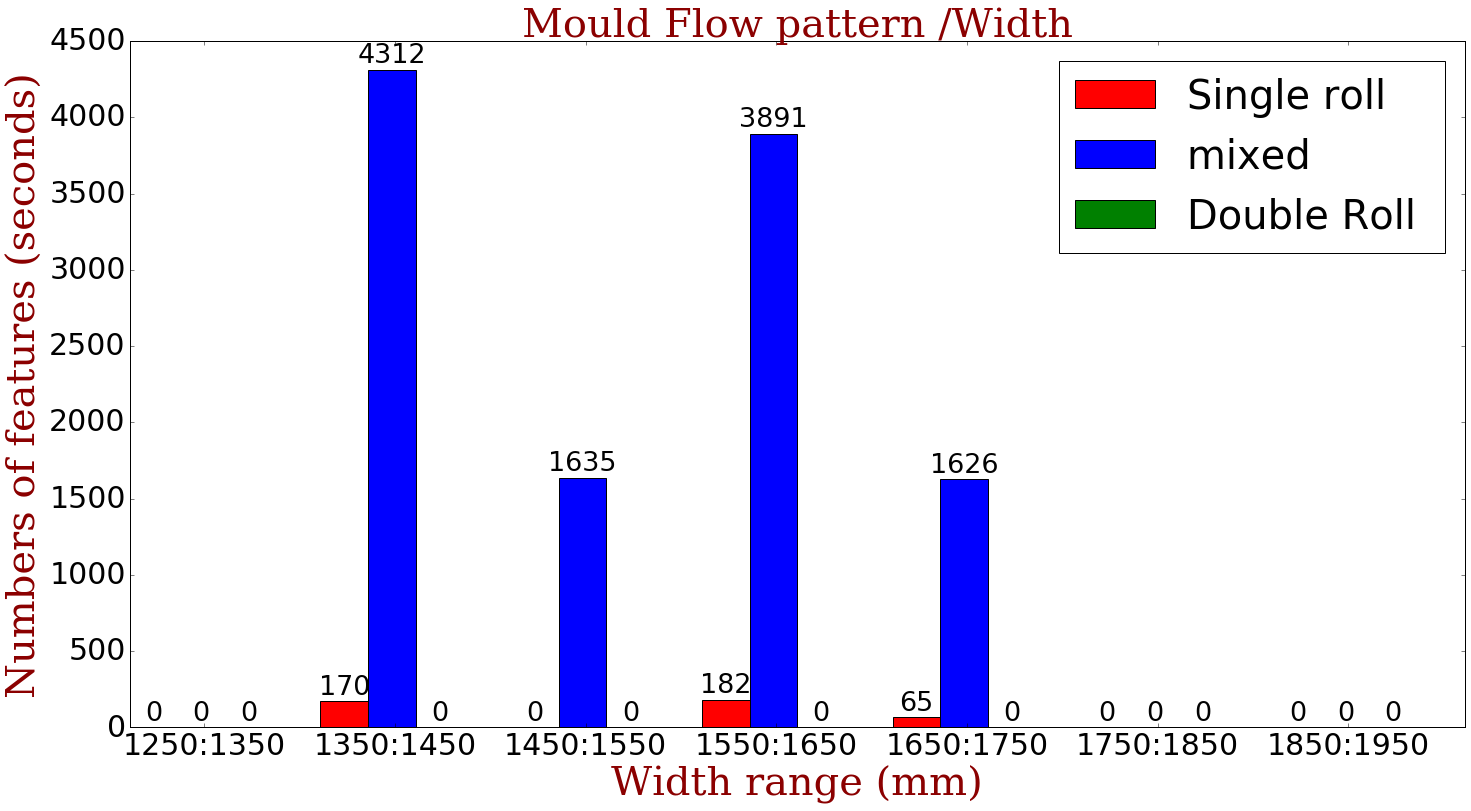

In [1924]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[0])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

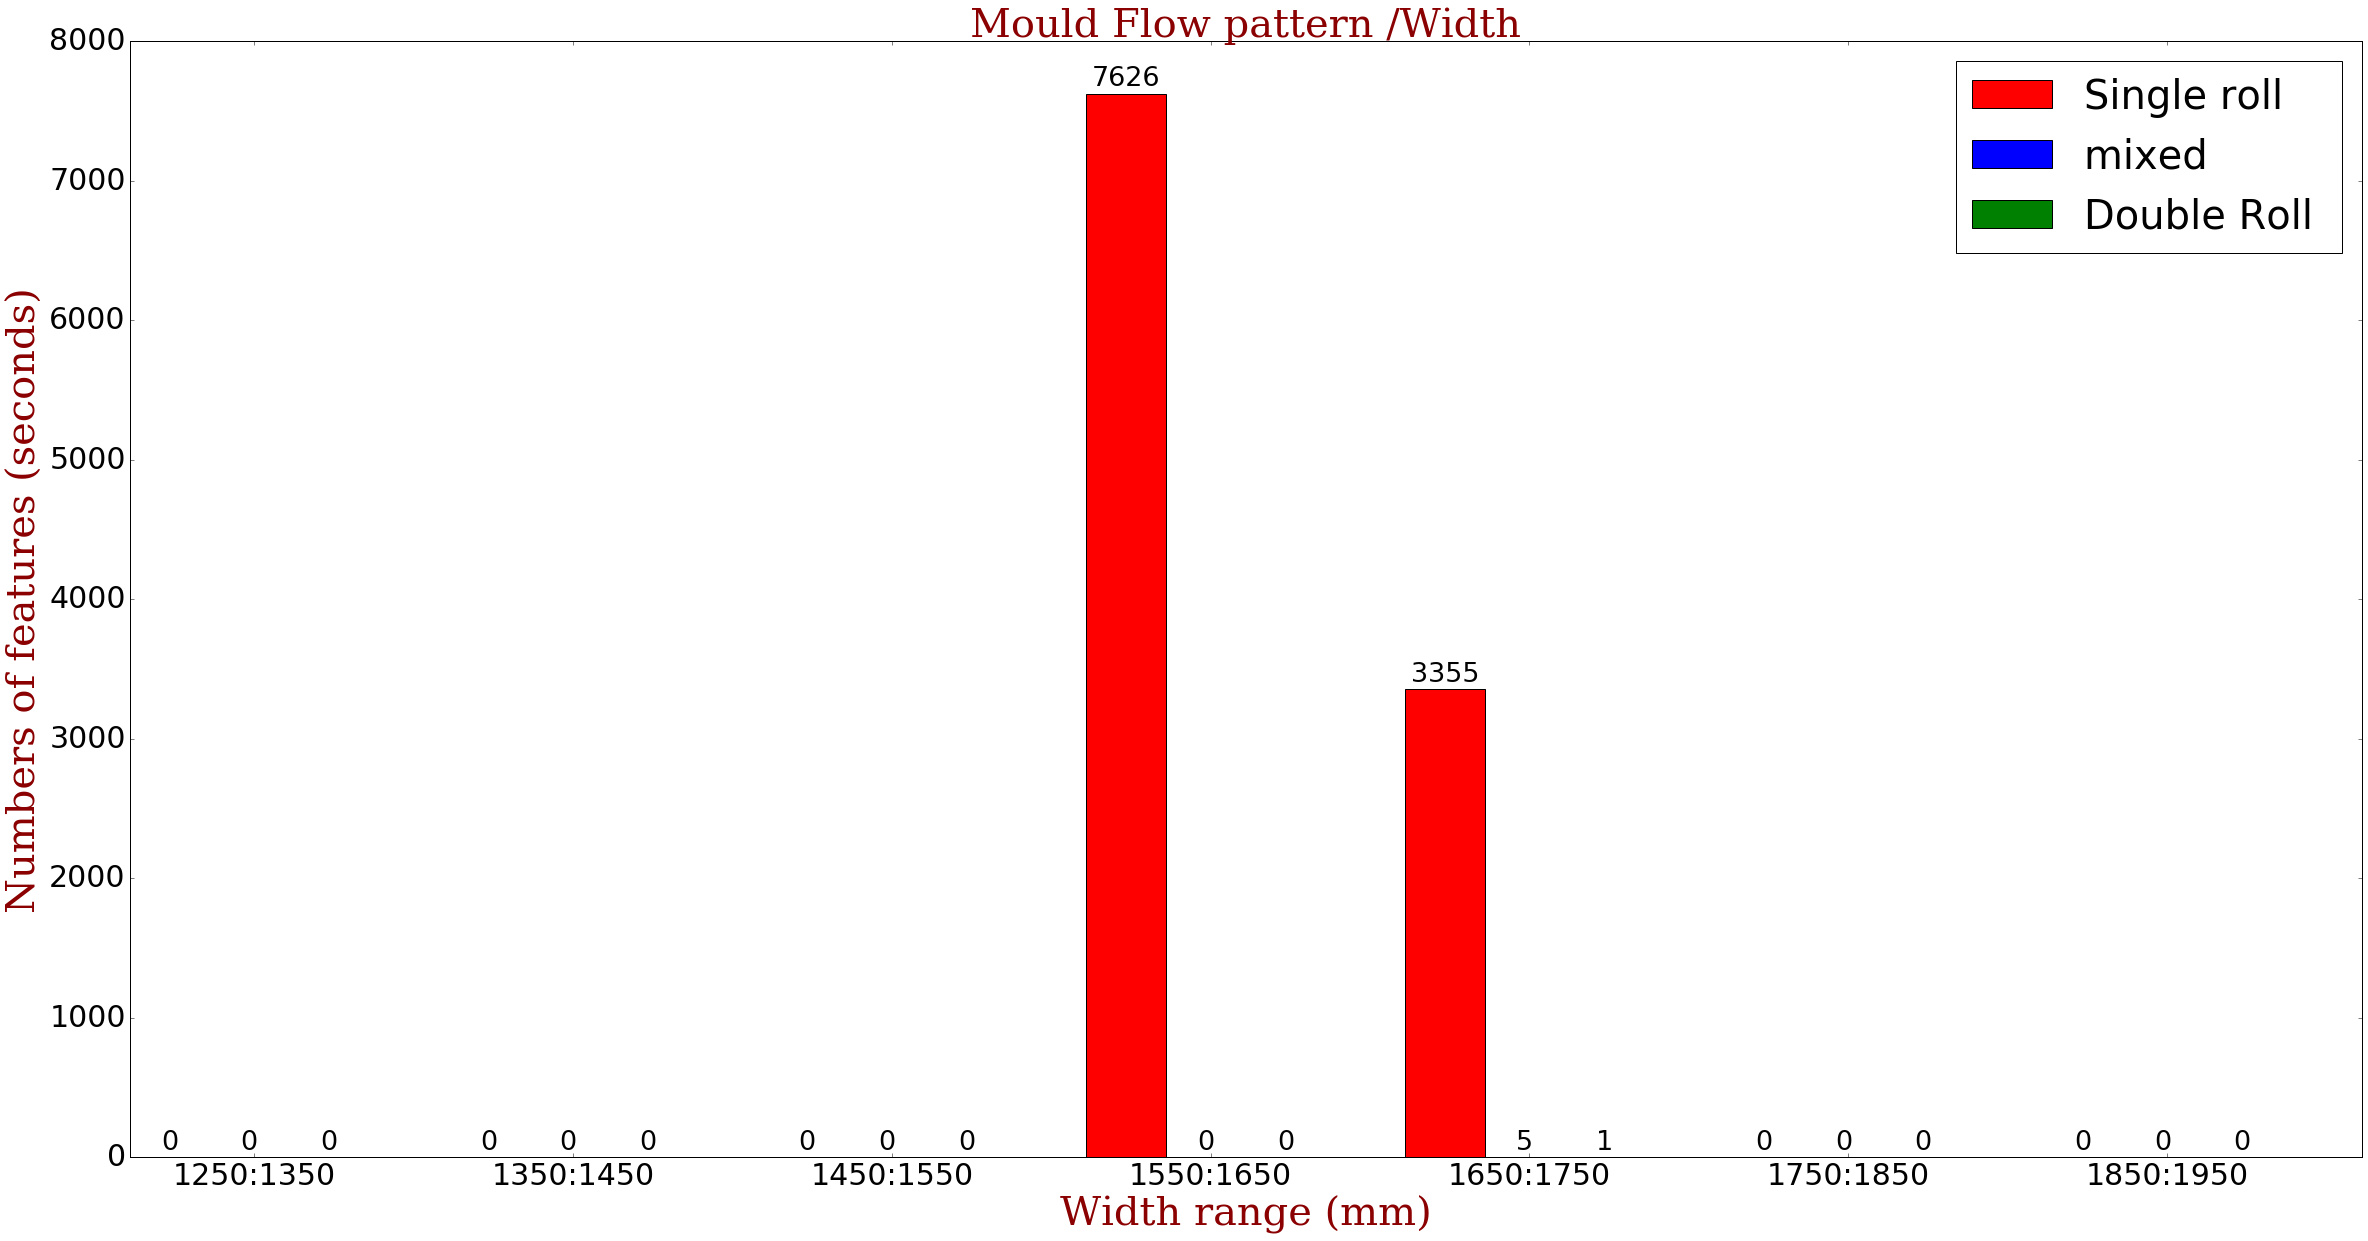

In [83]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[1])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

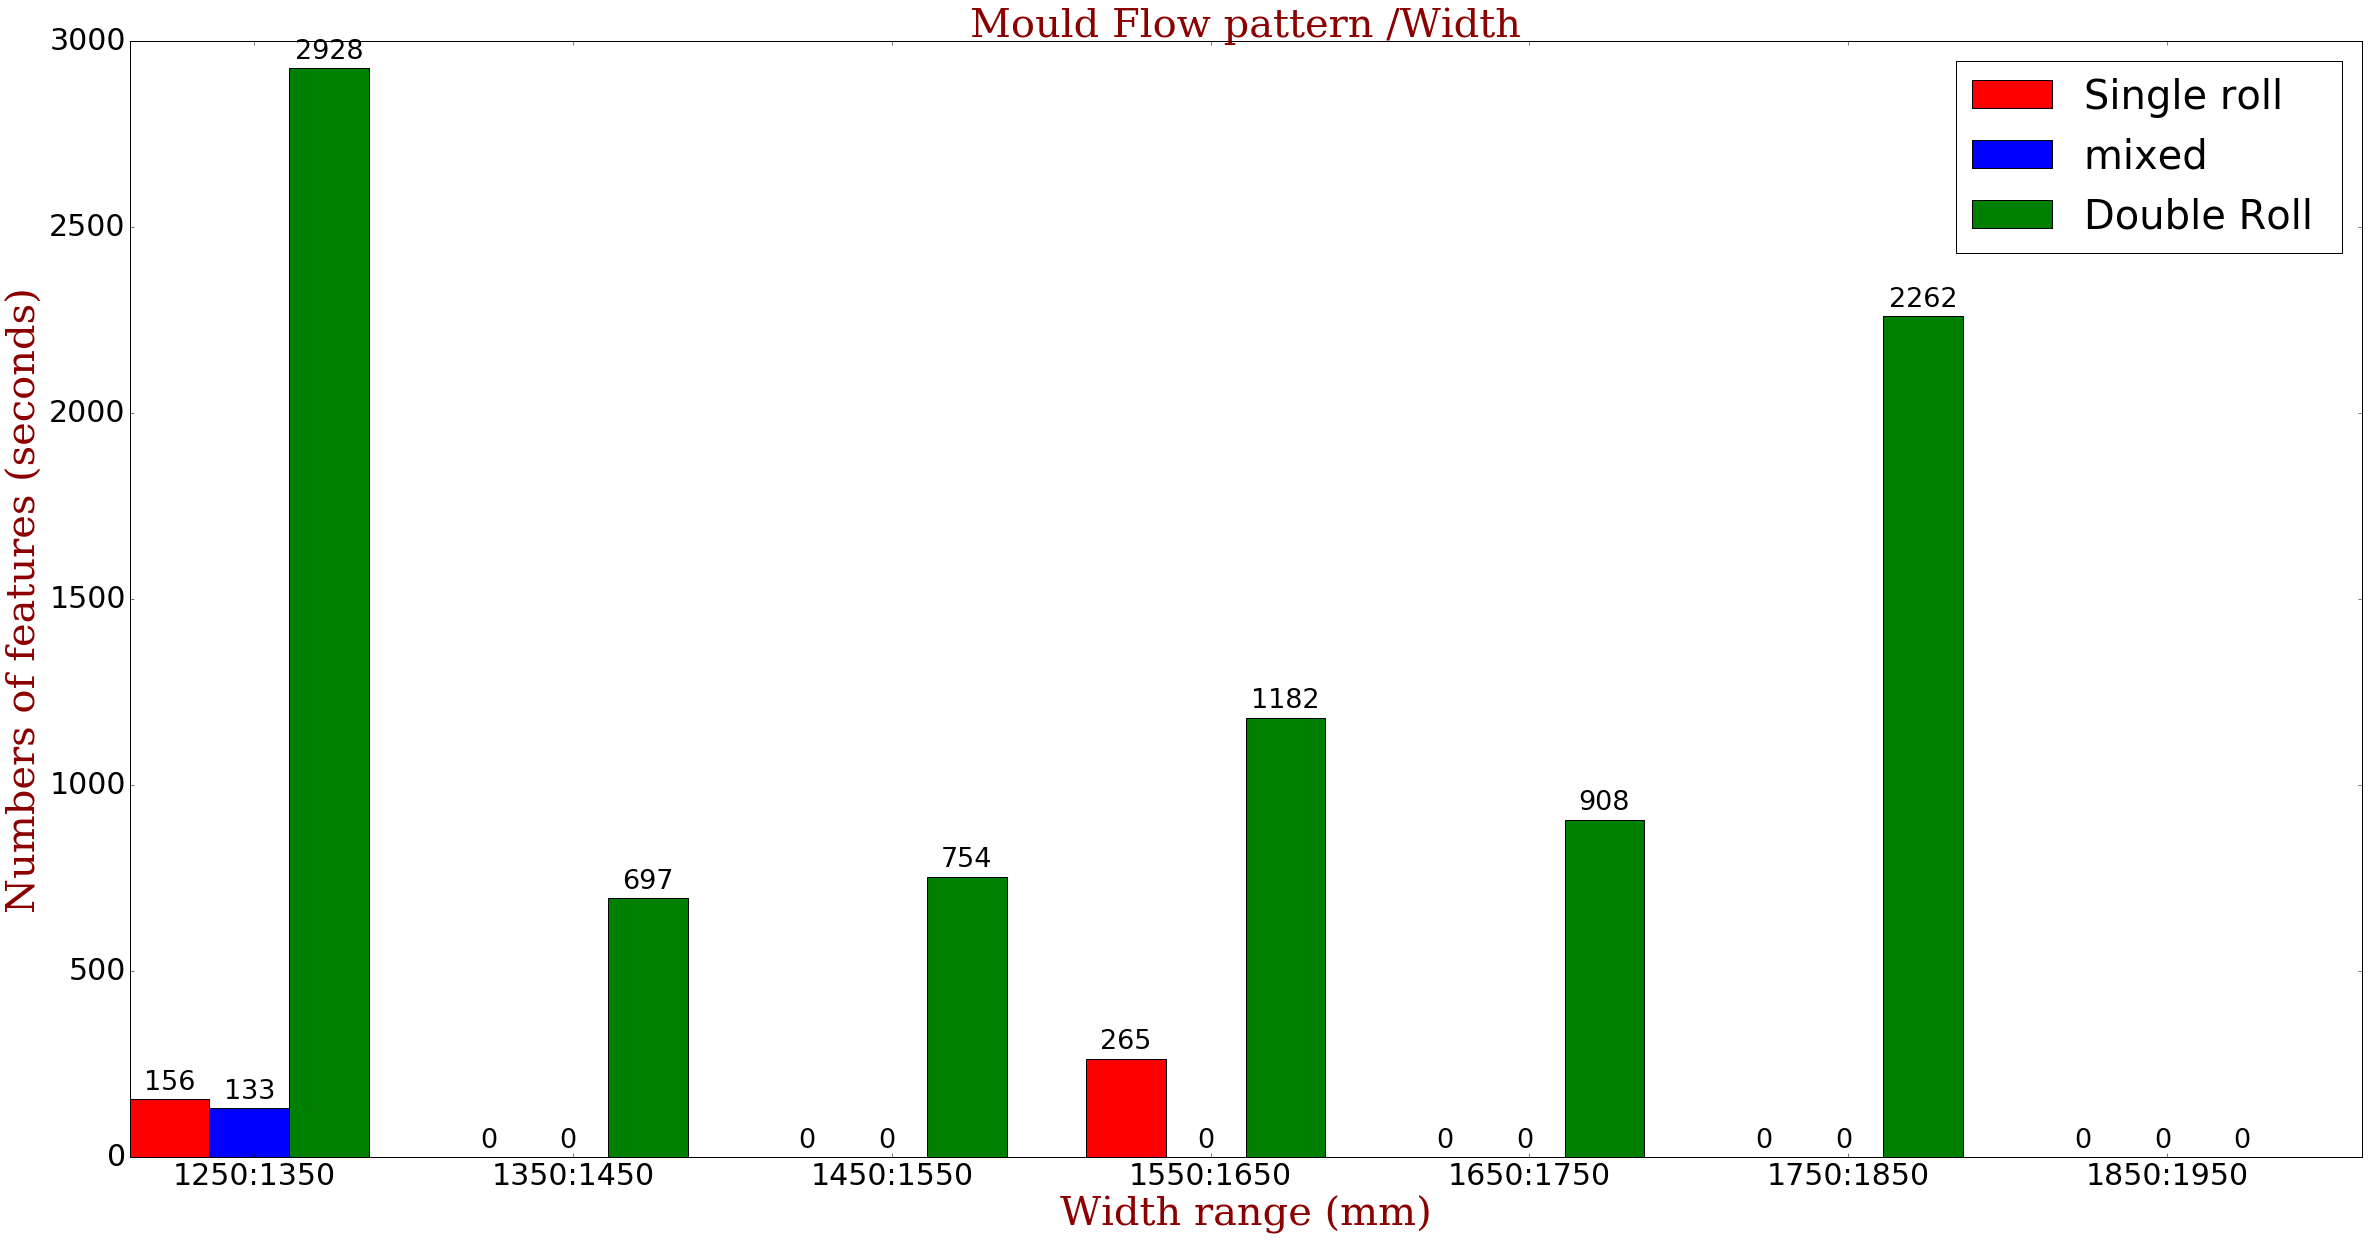

In [84]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[2])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

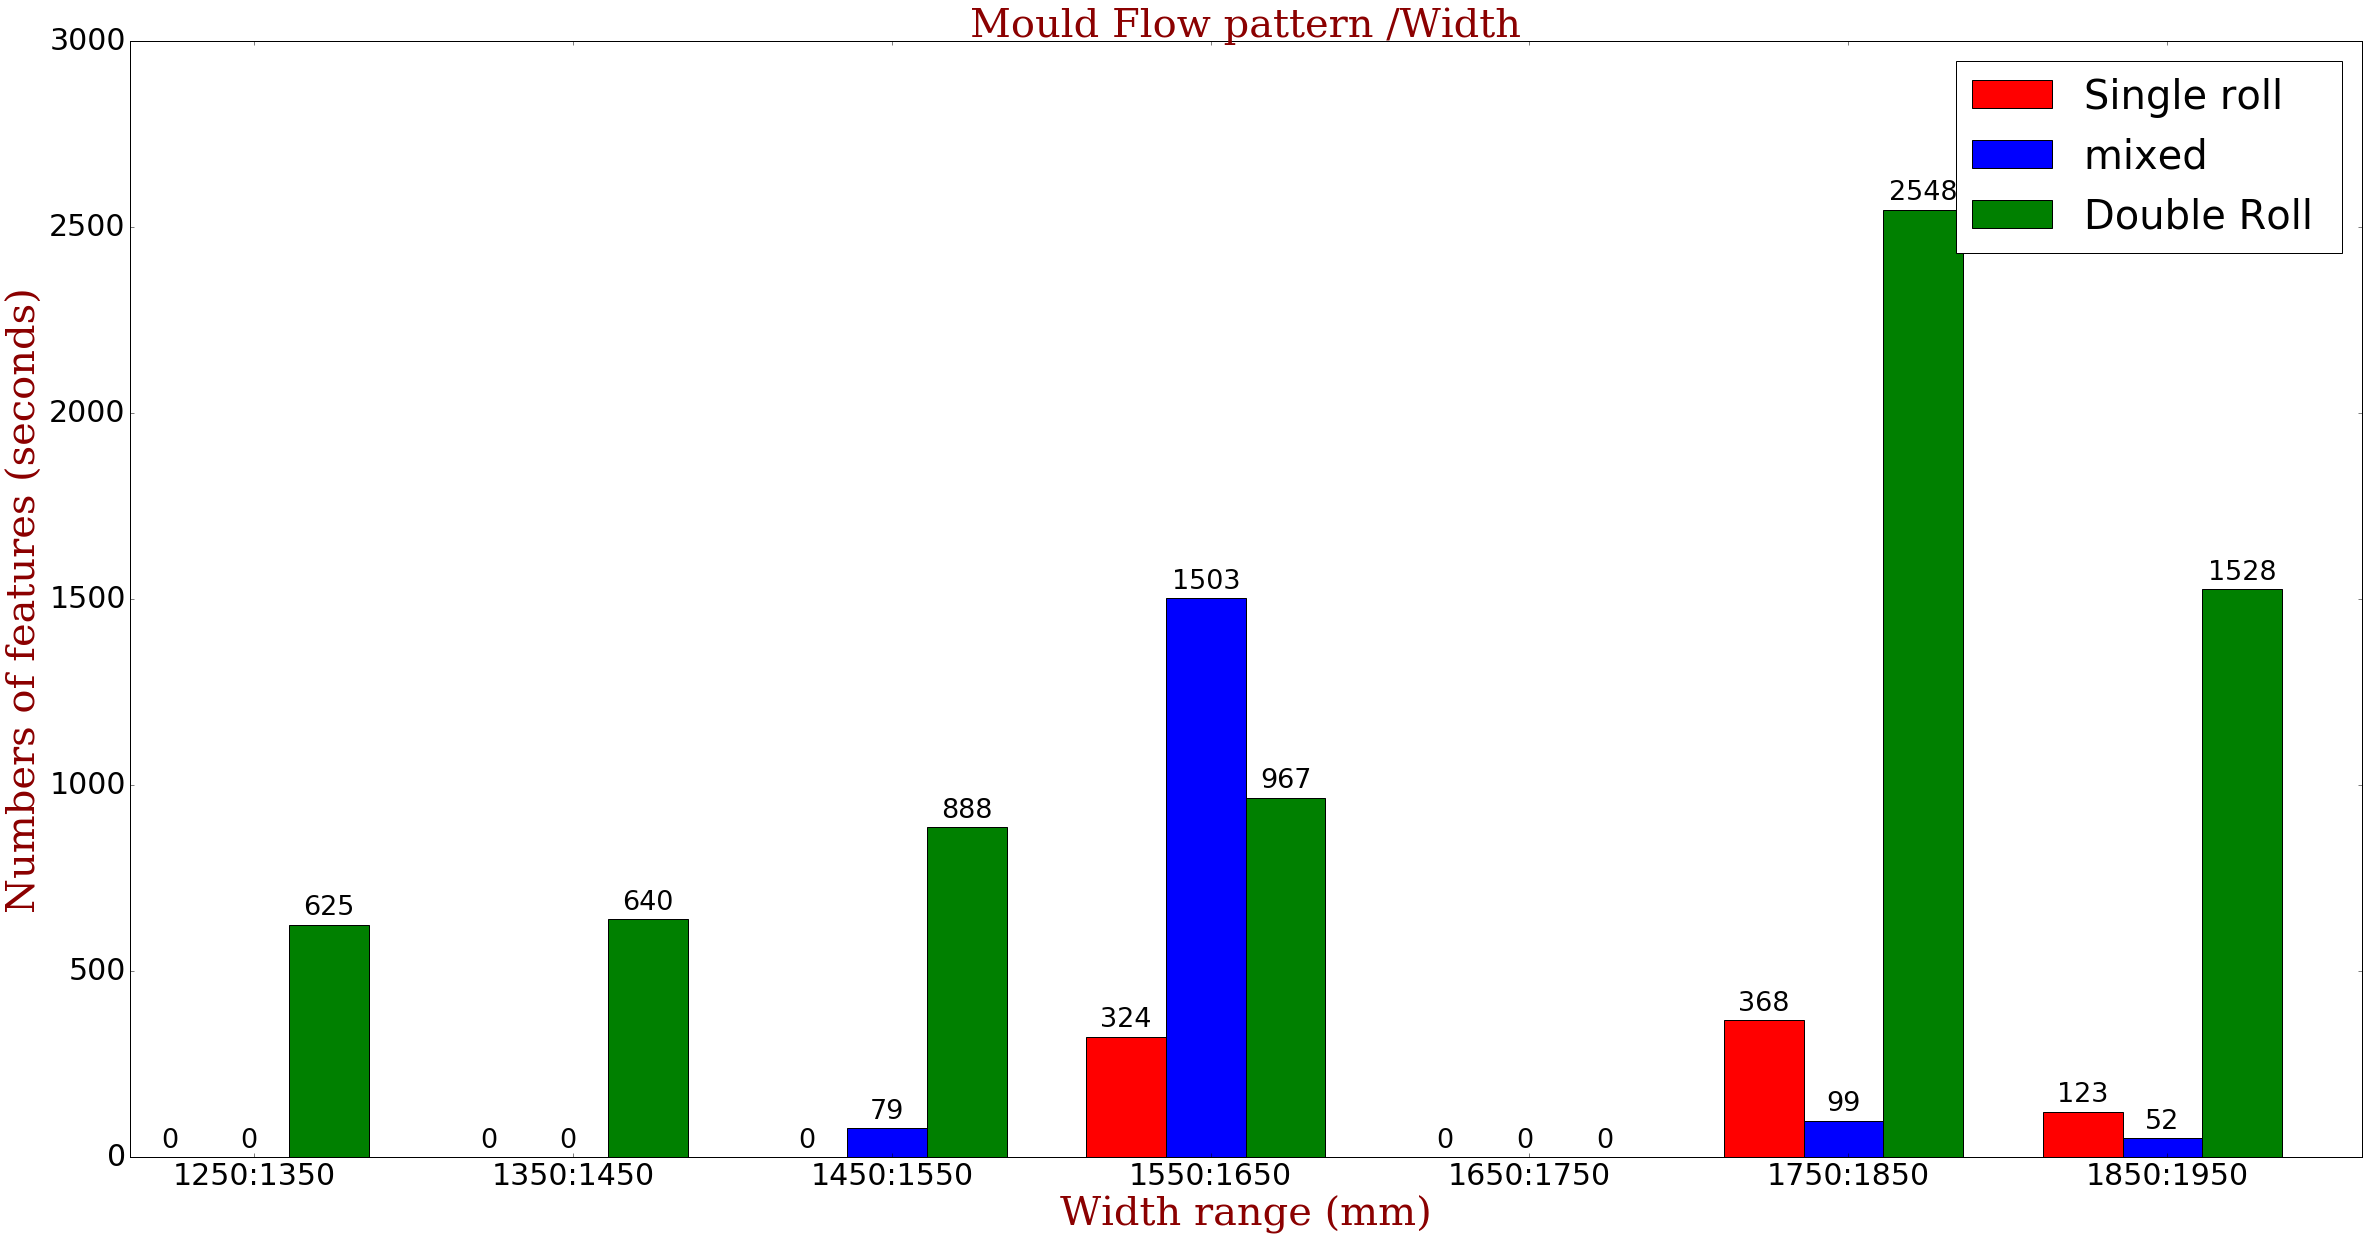

In [85]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[3])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

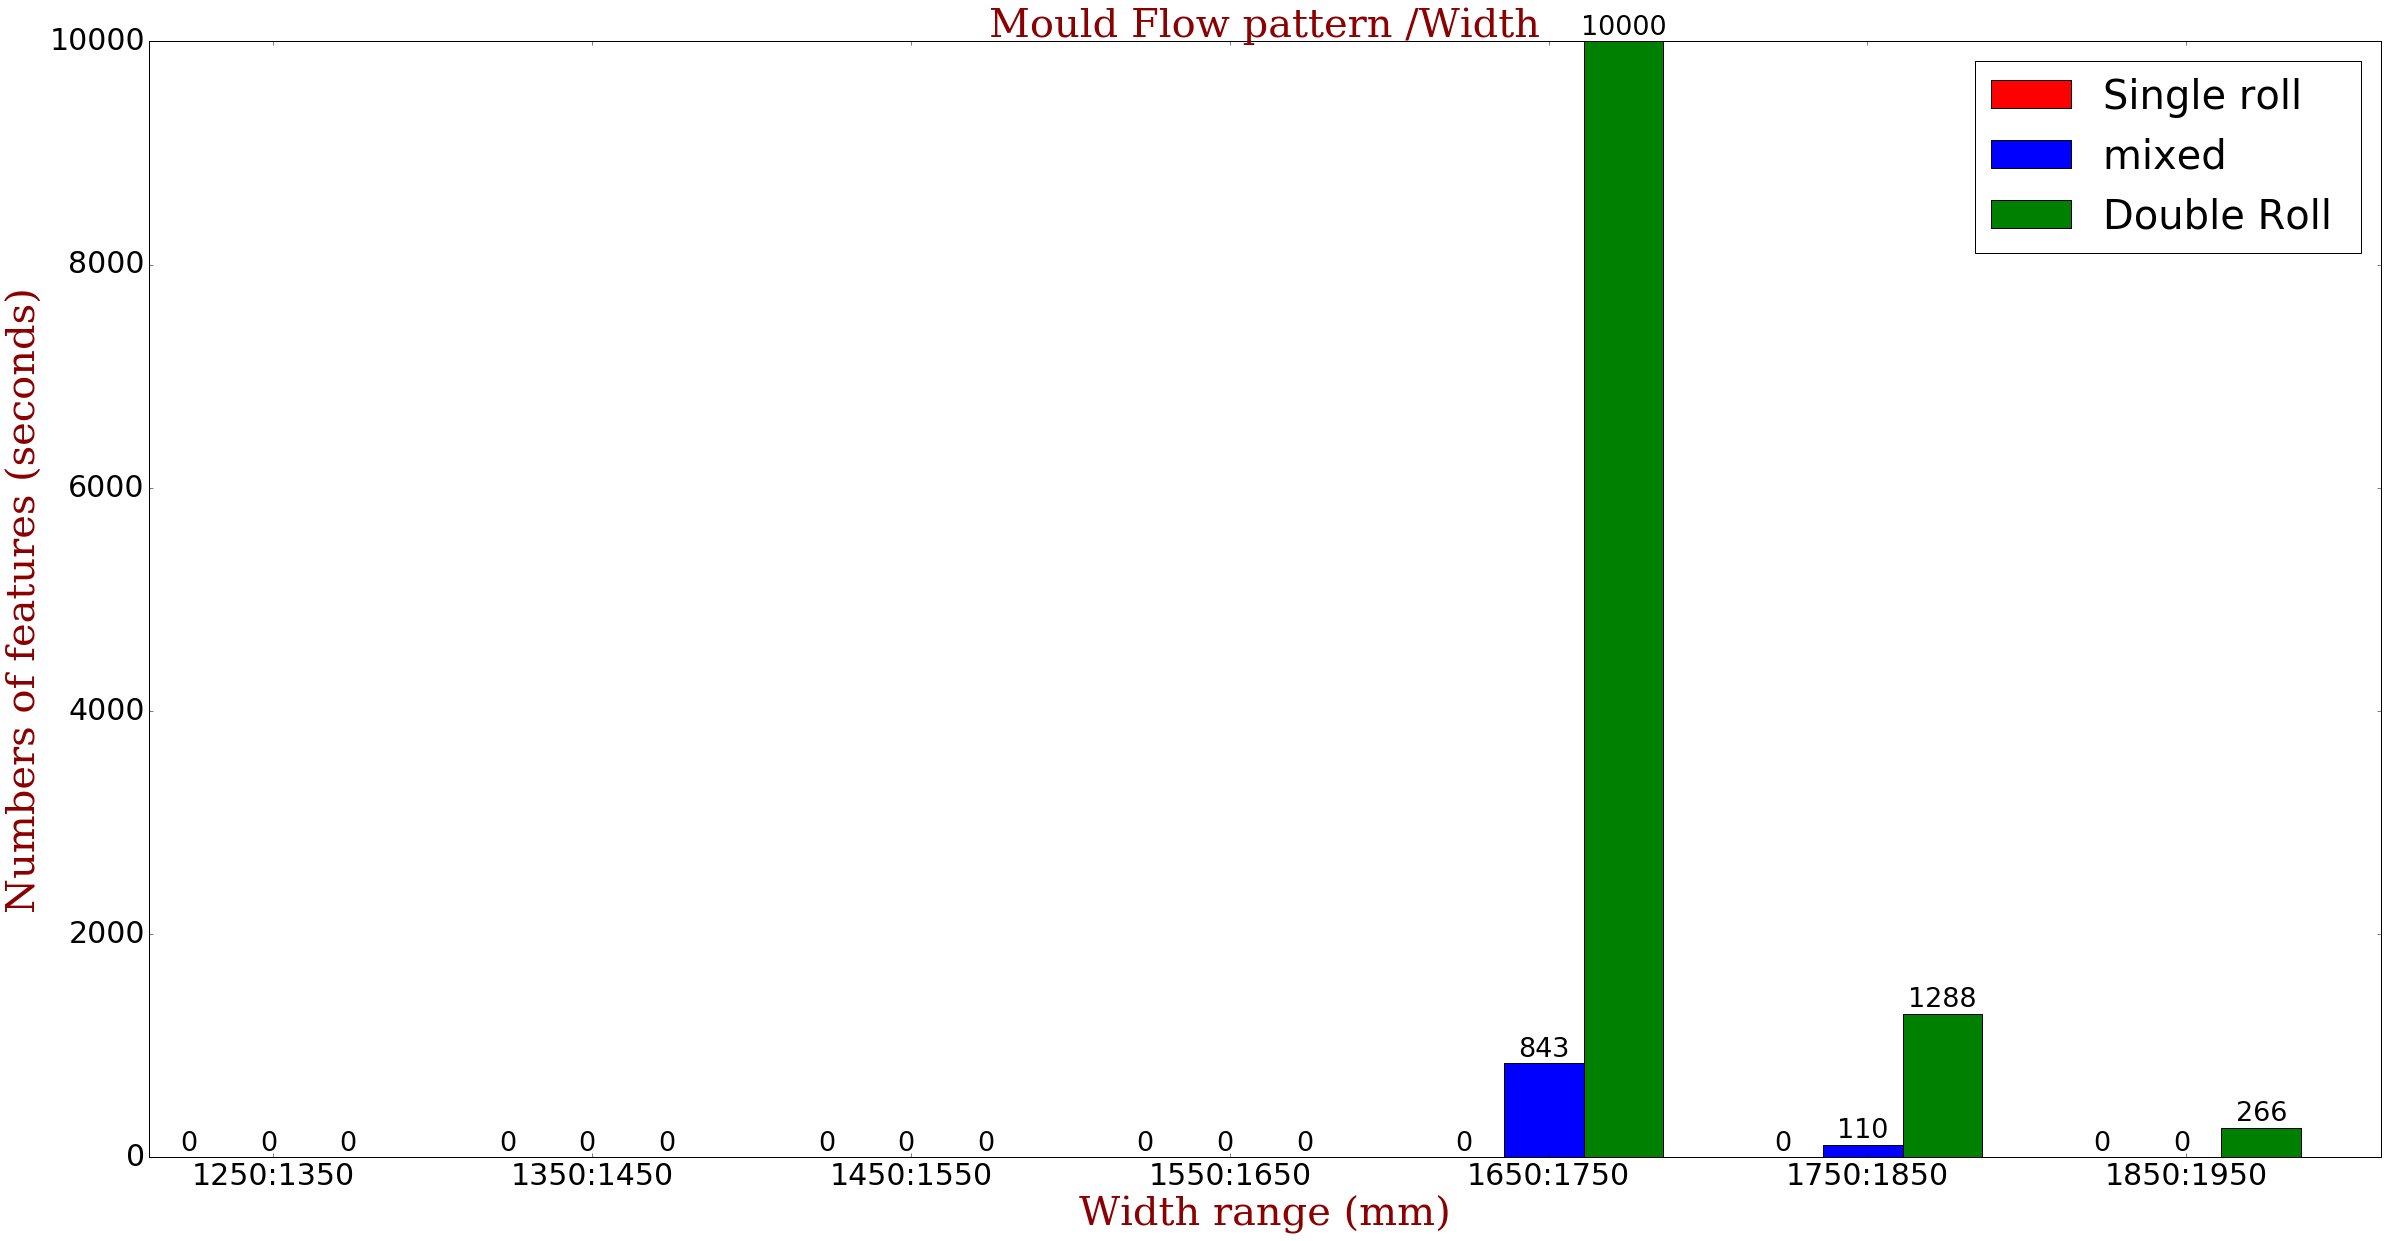

In [86]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[4])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

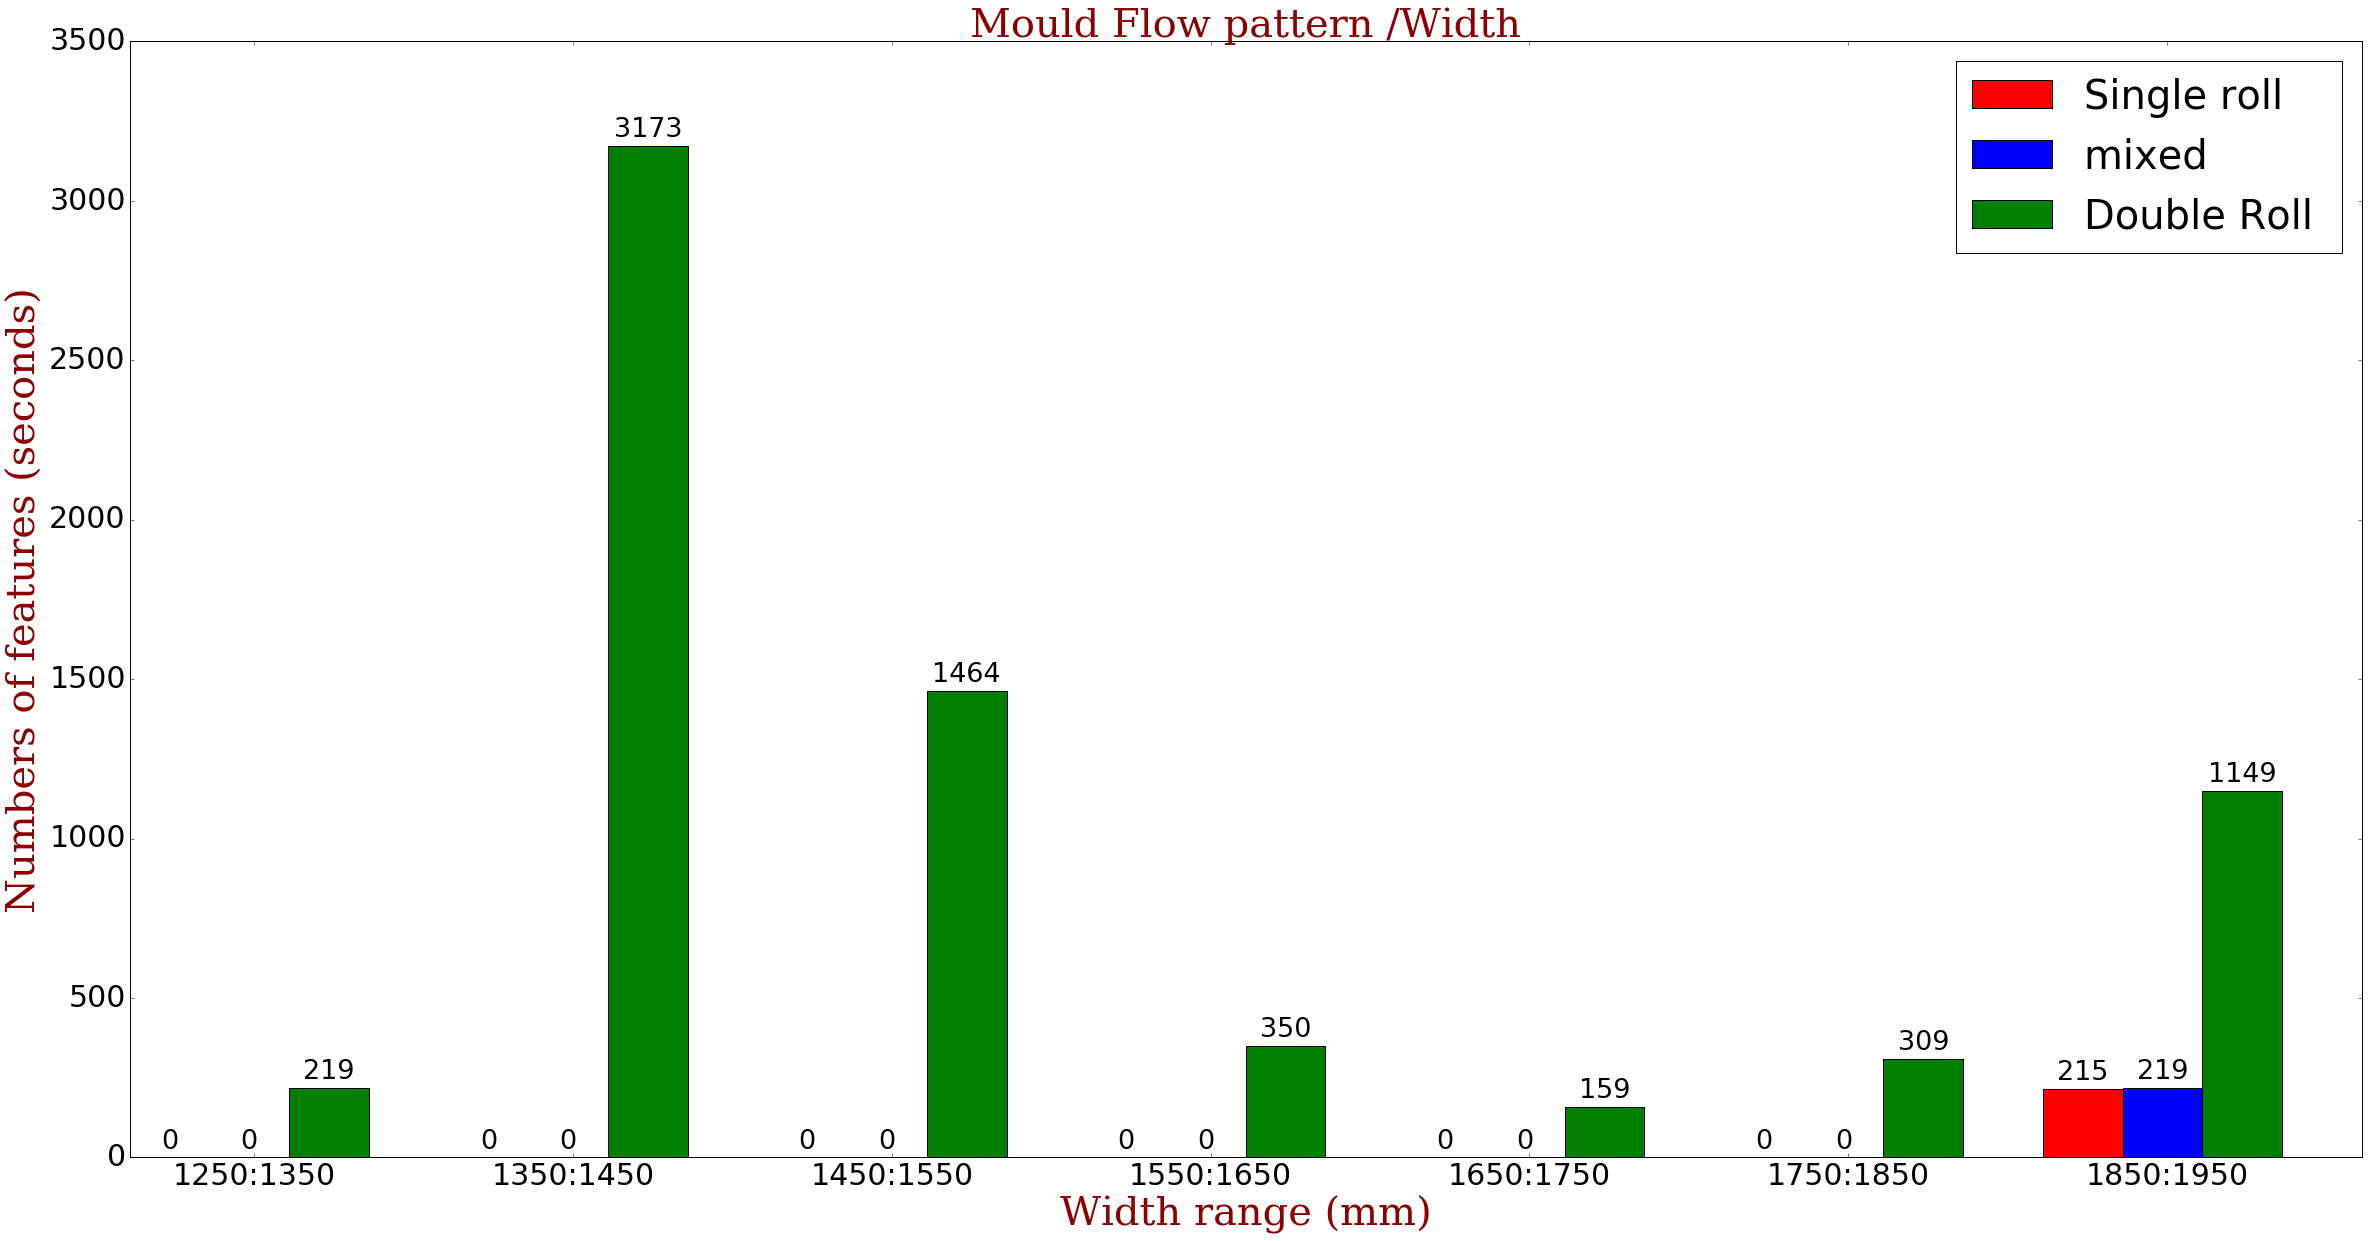

In [87]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[5])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

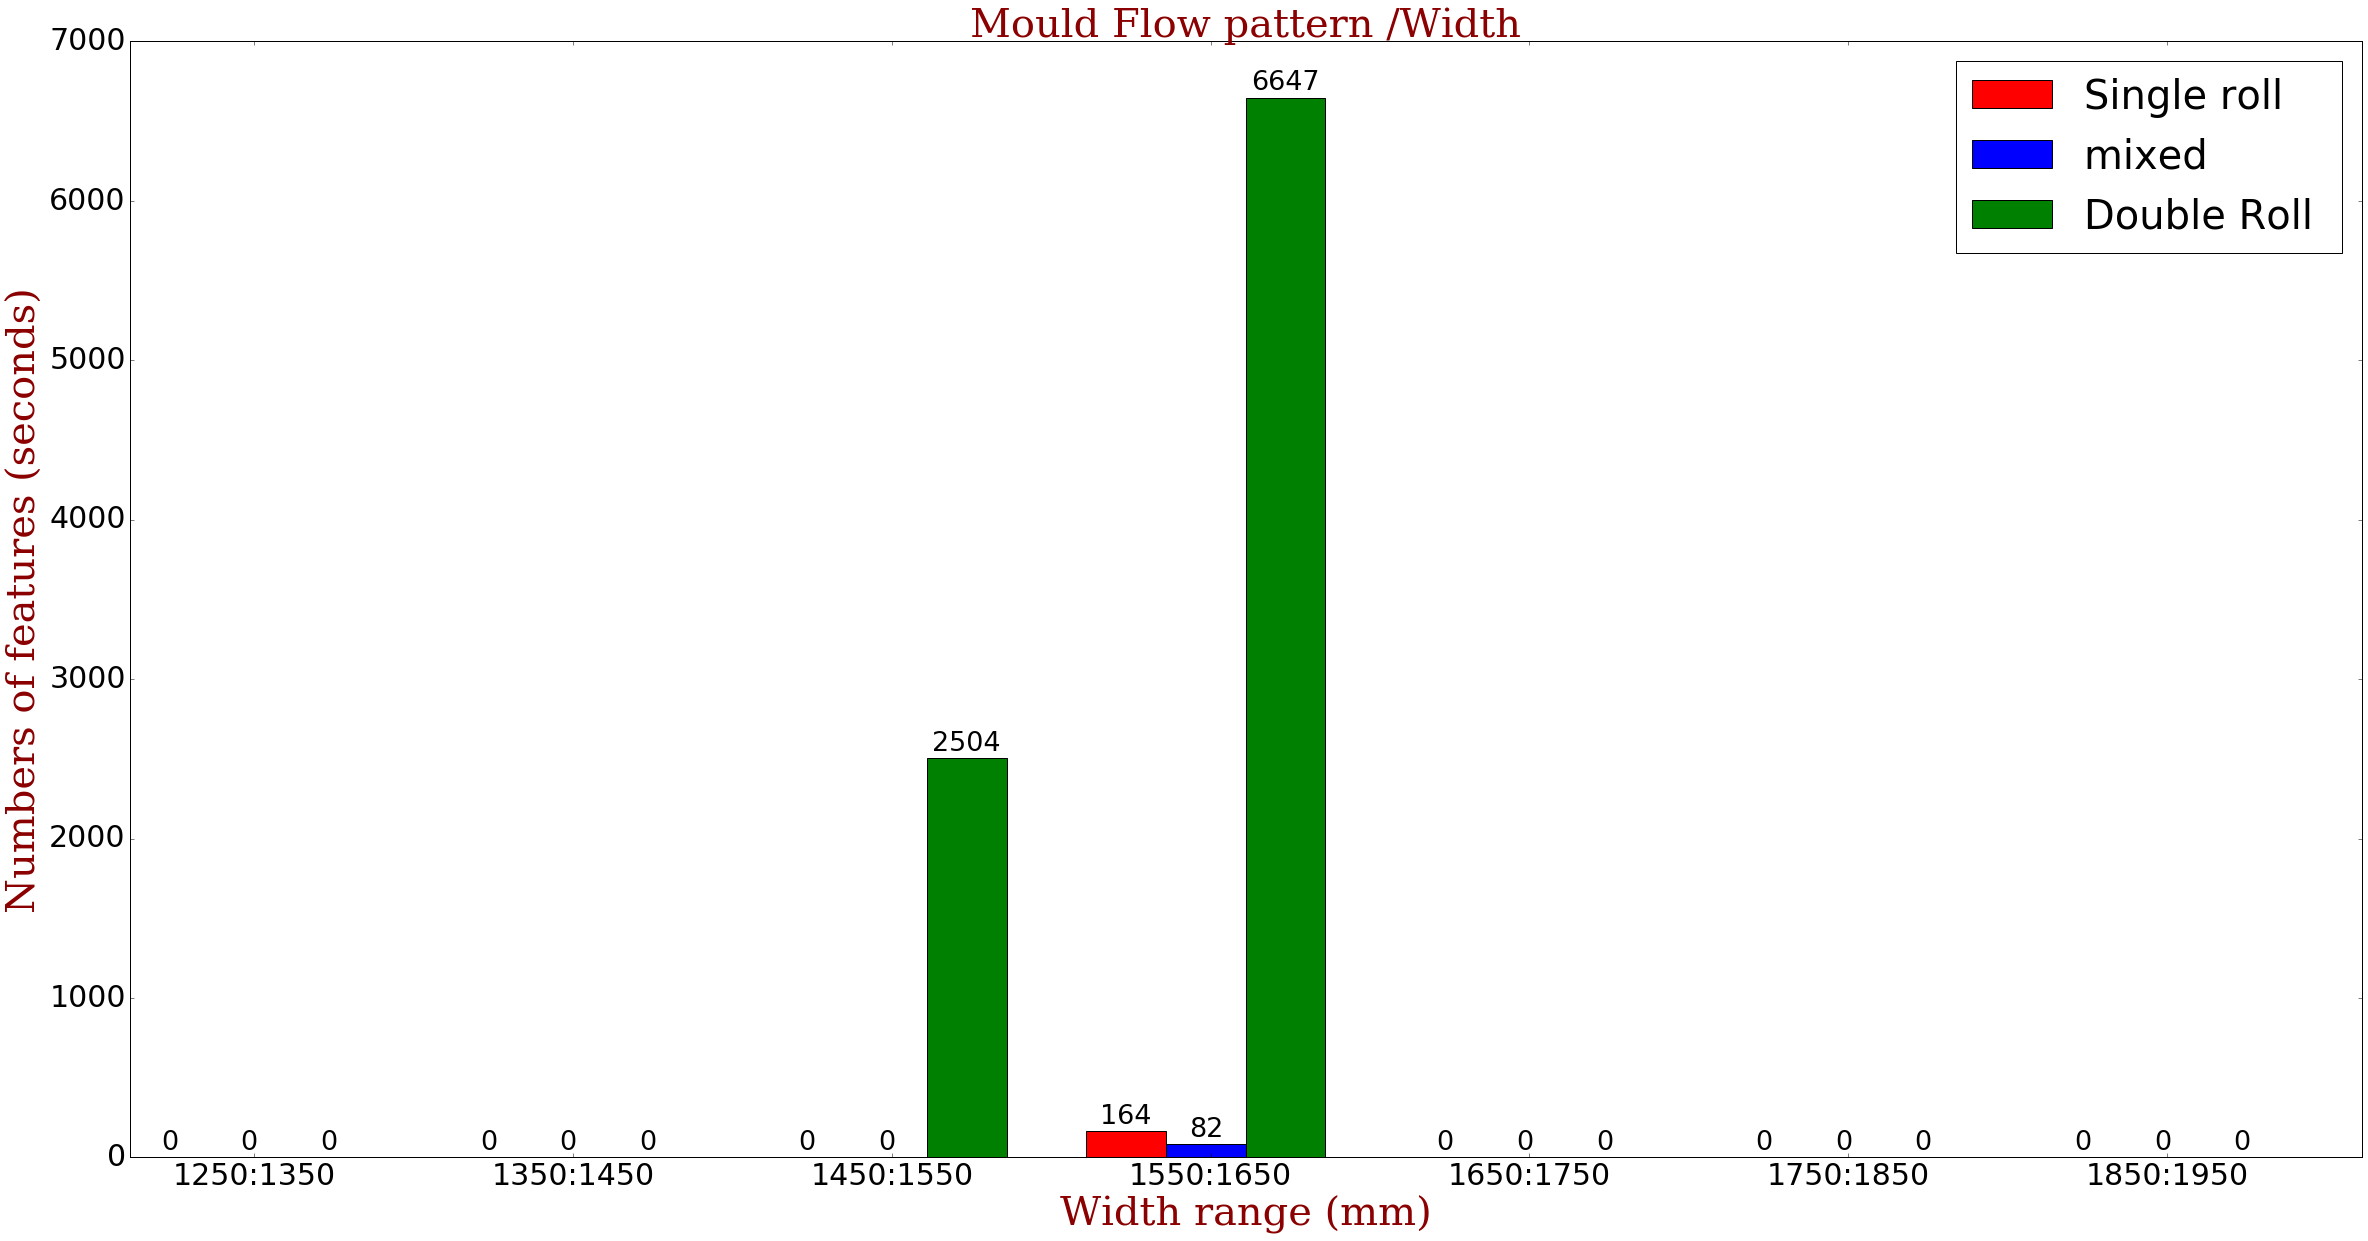

In [88]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[6])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

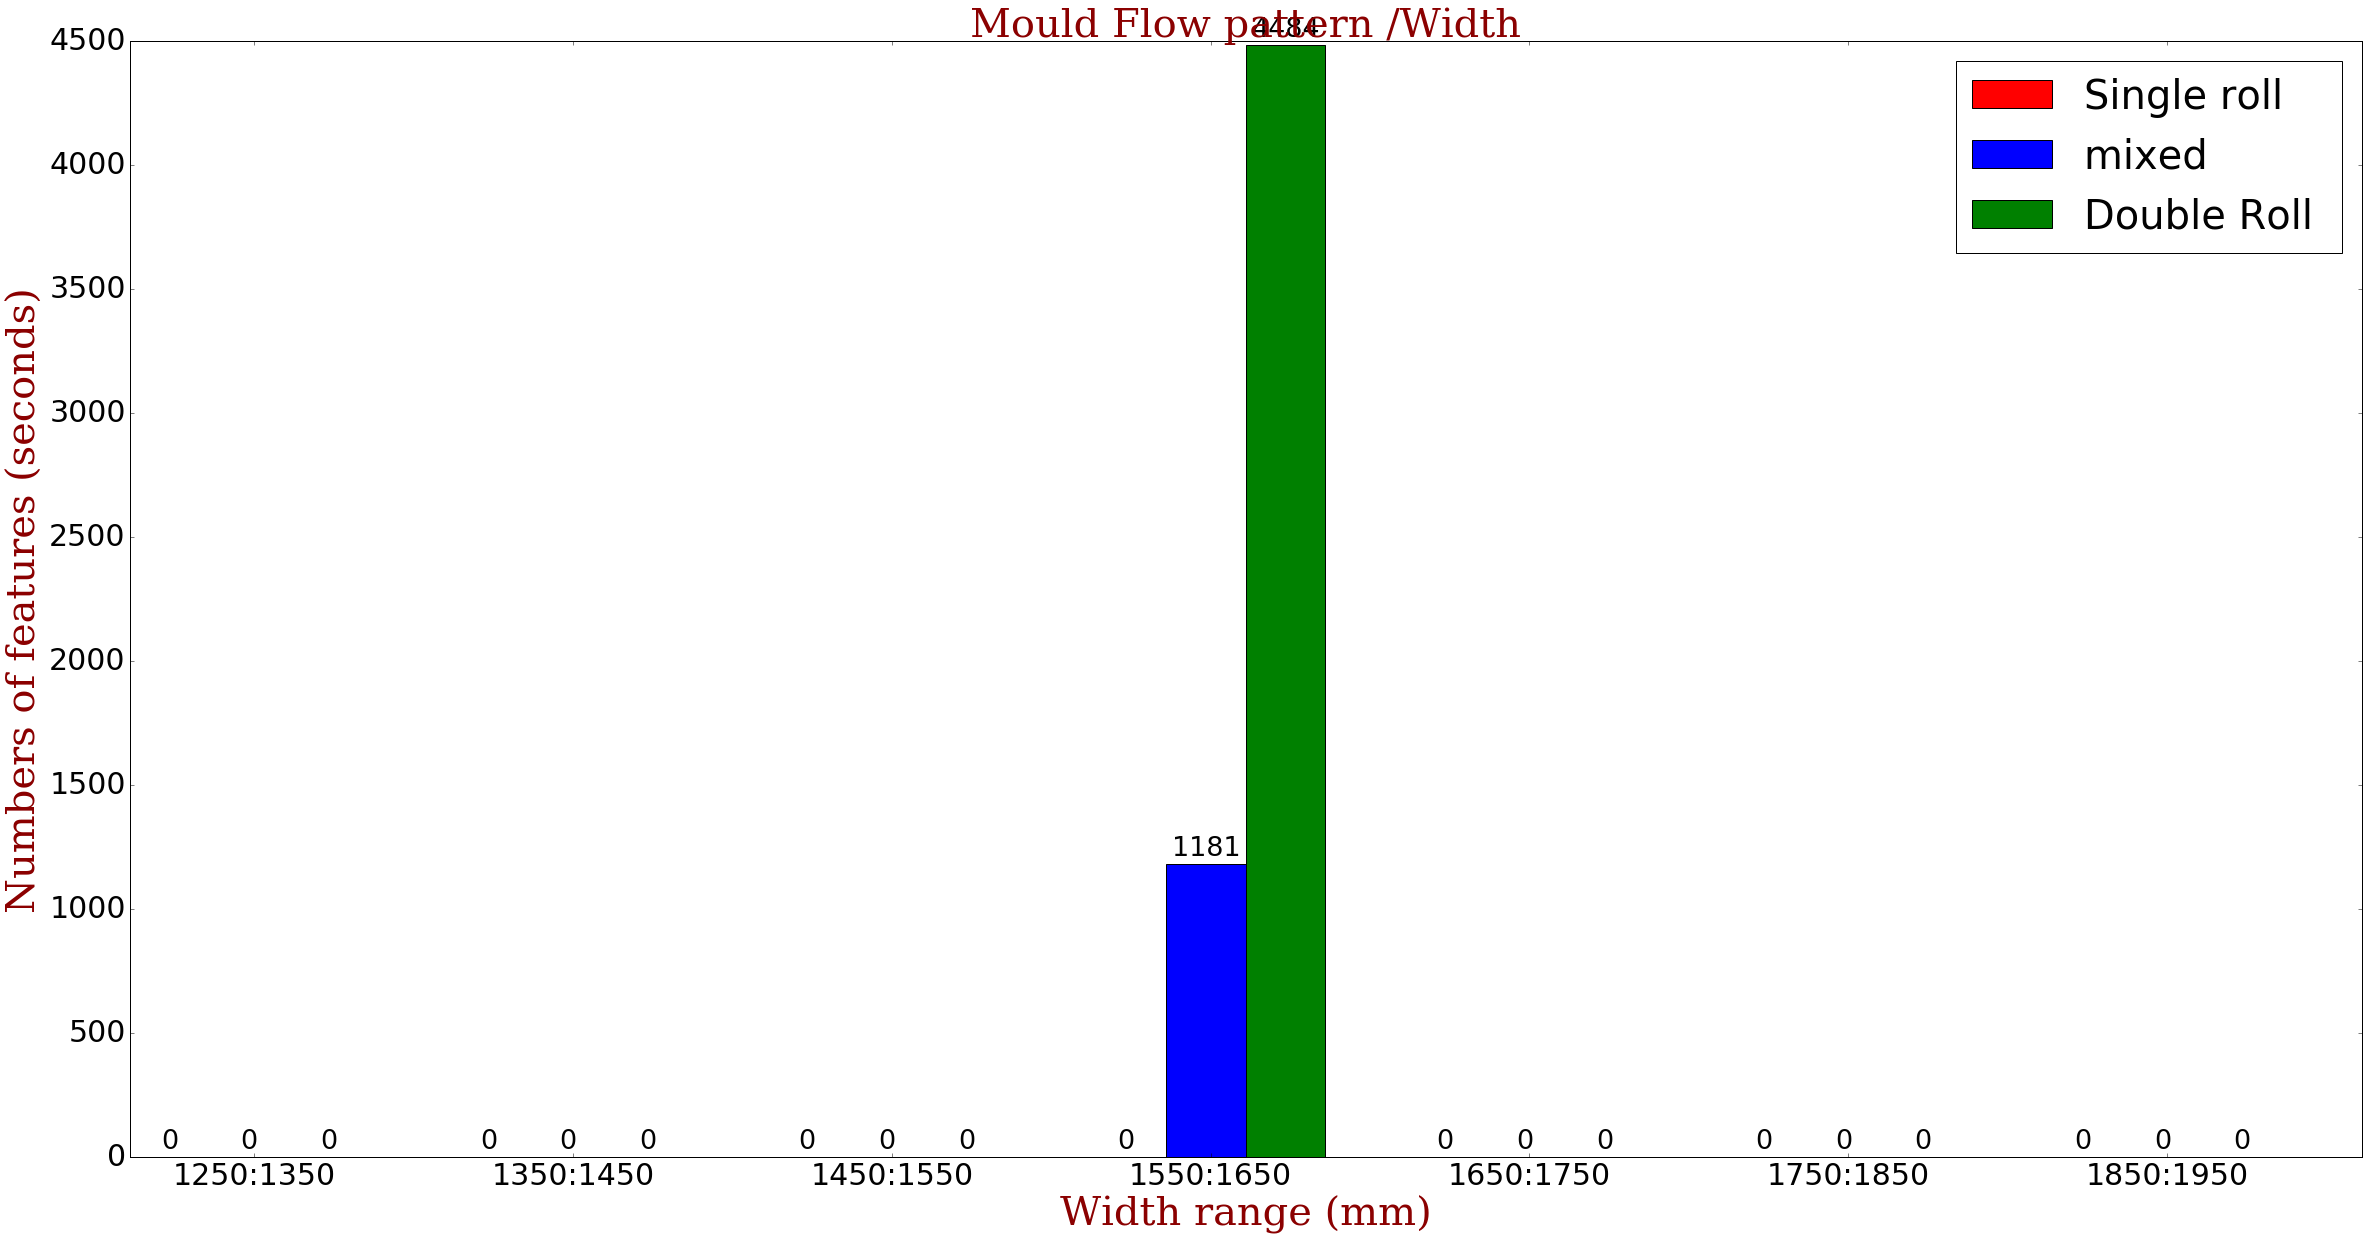

In [89]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[7])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

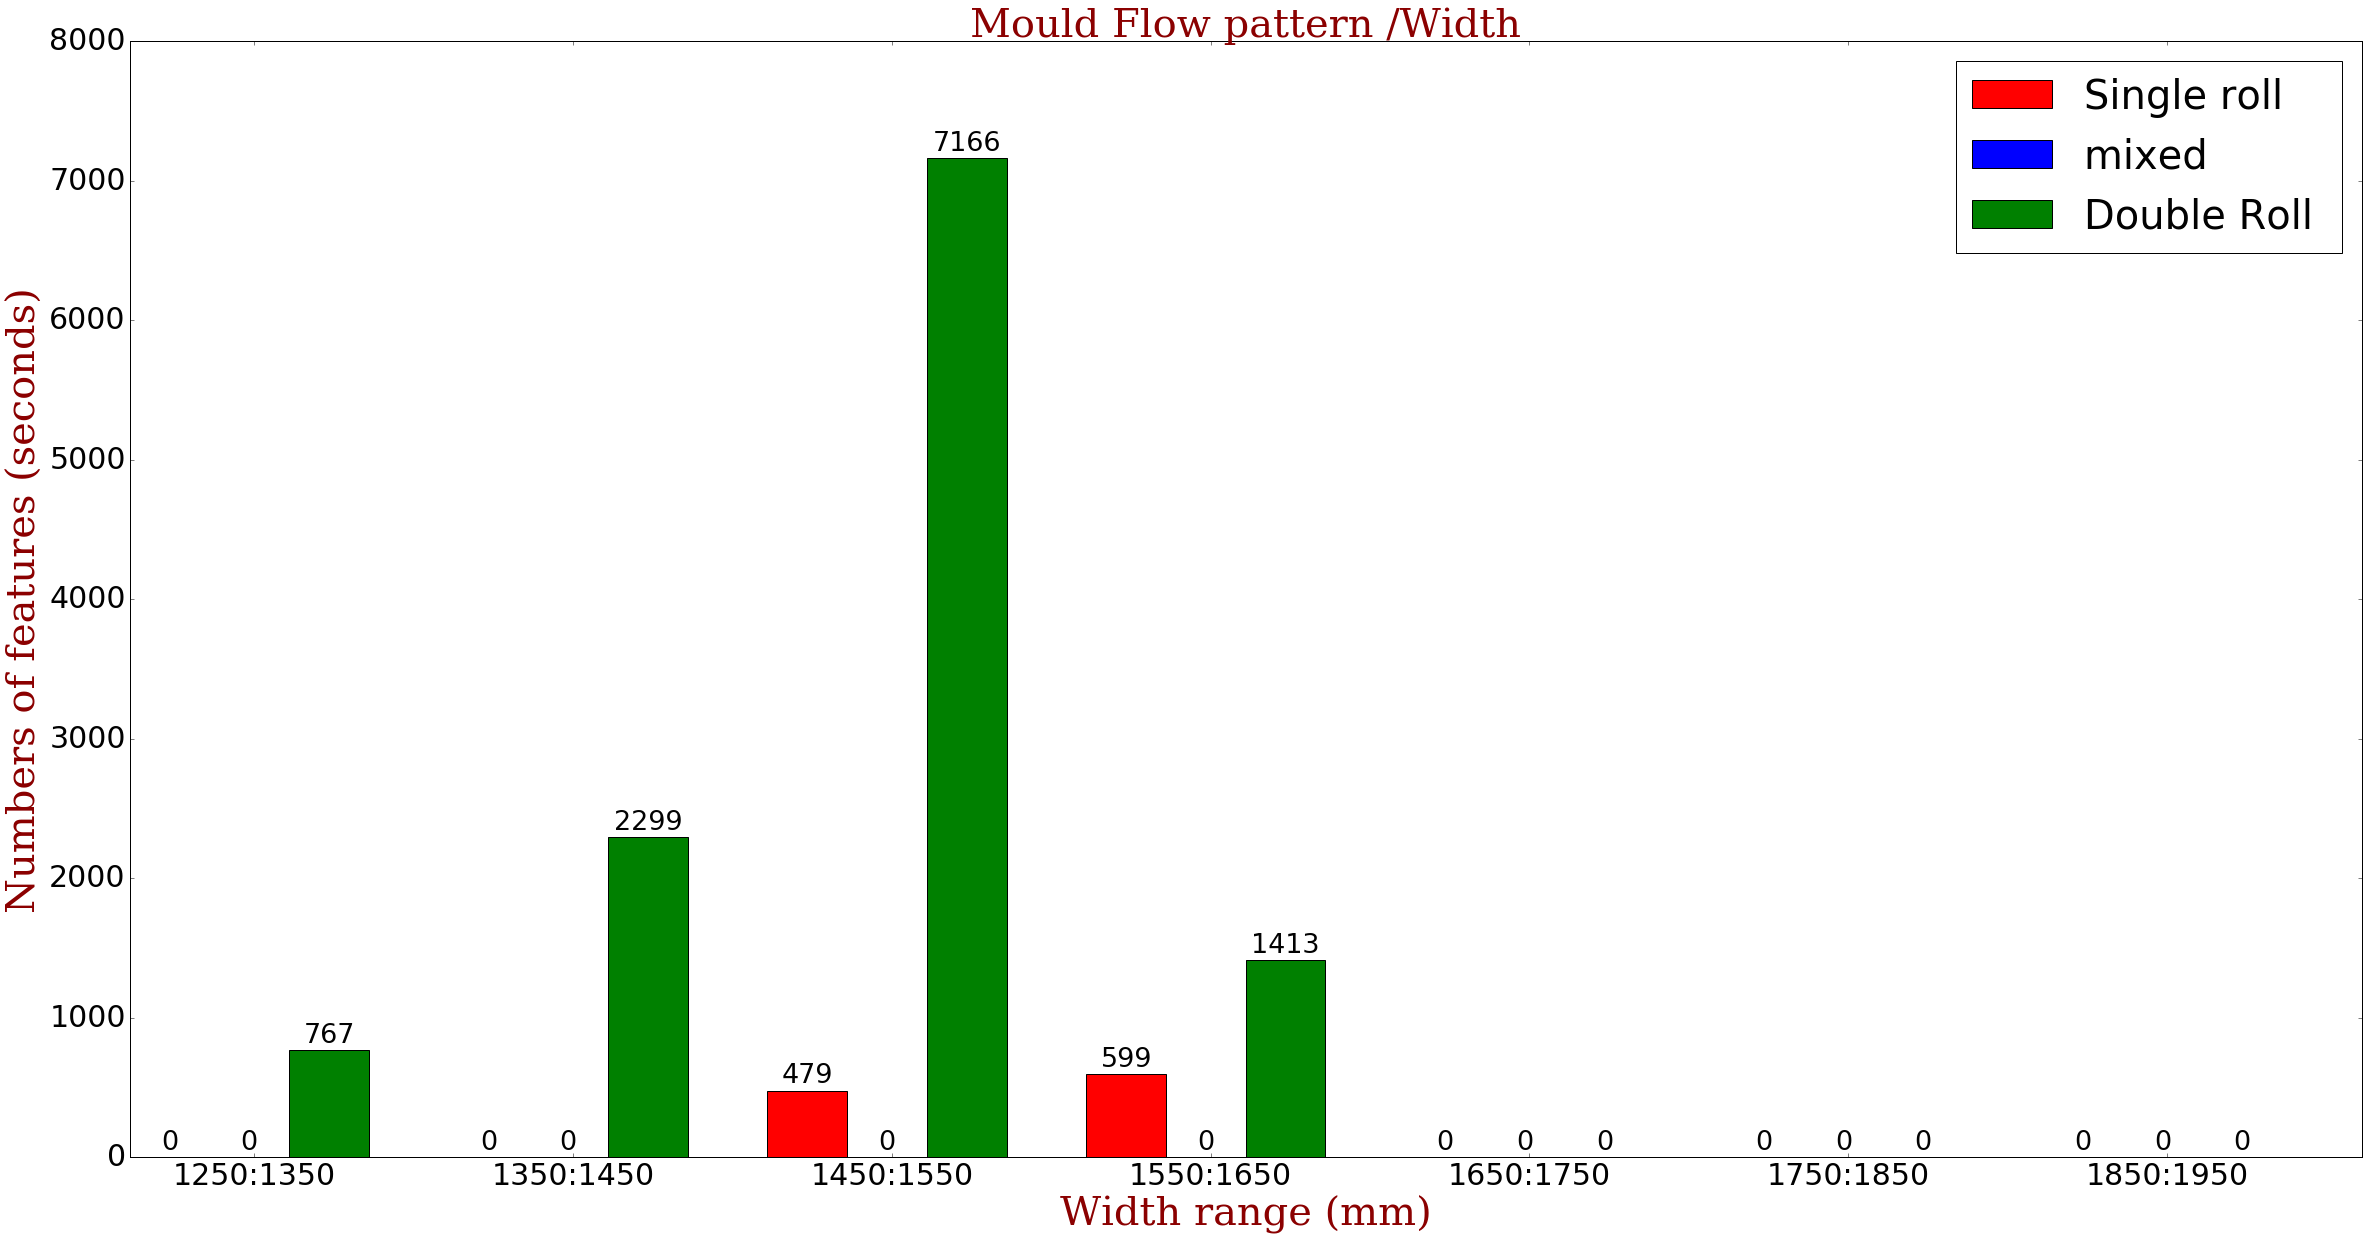

In [90]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[8])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

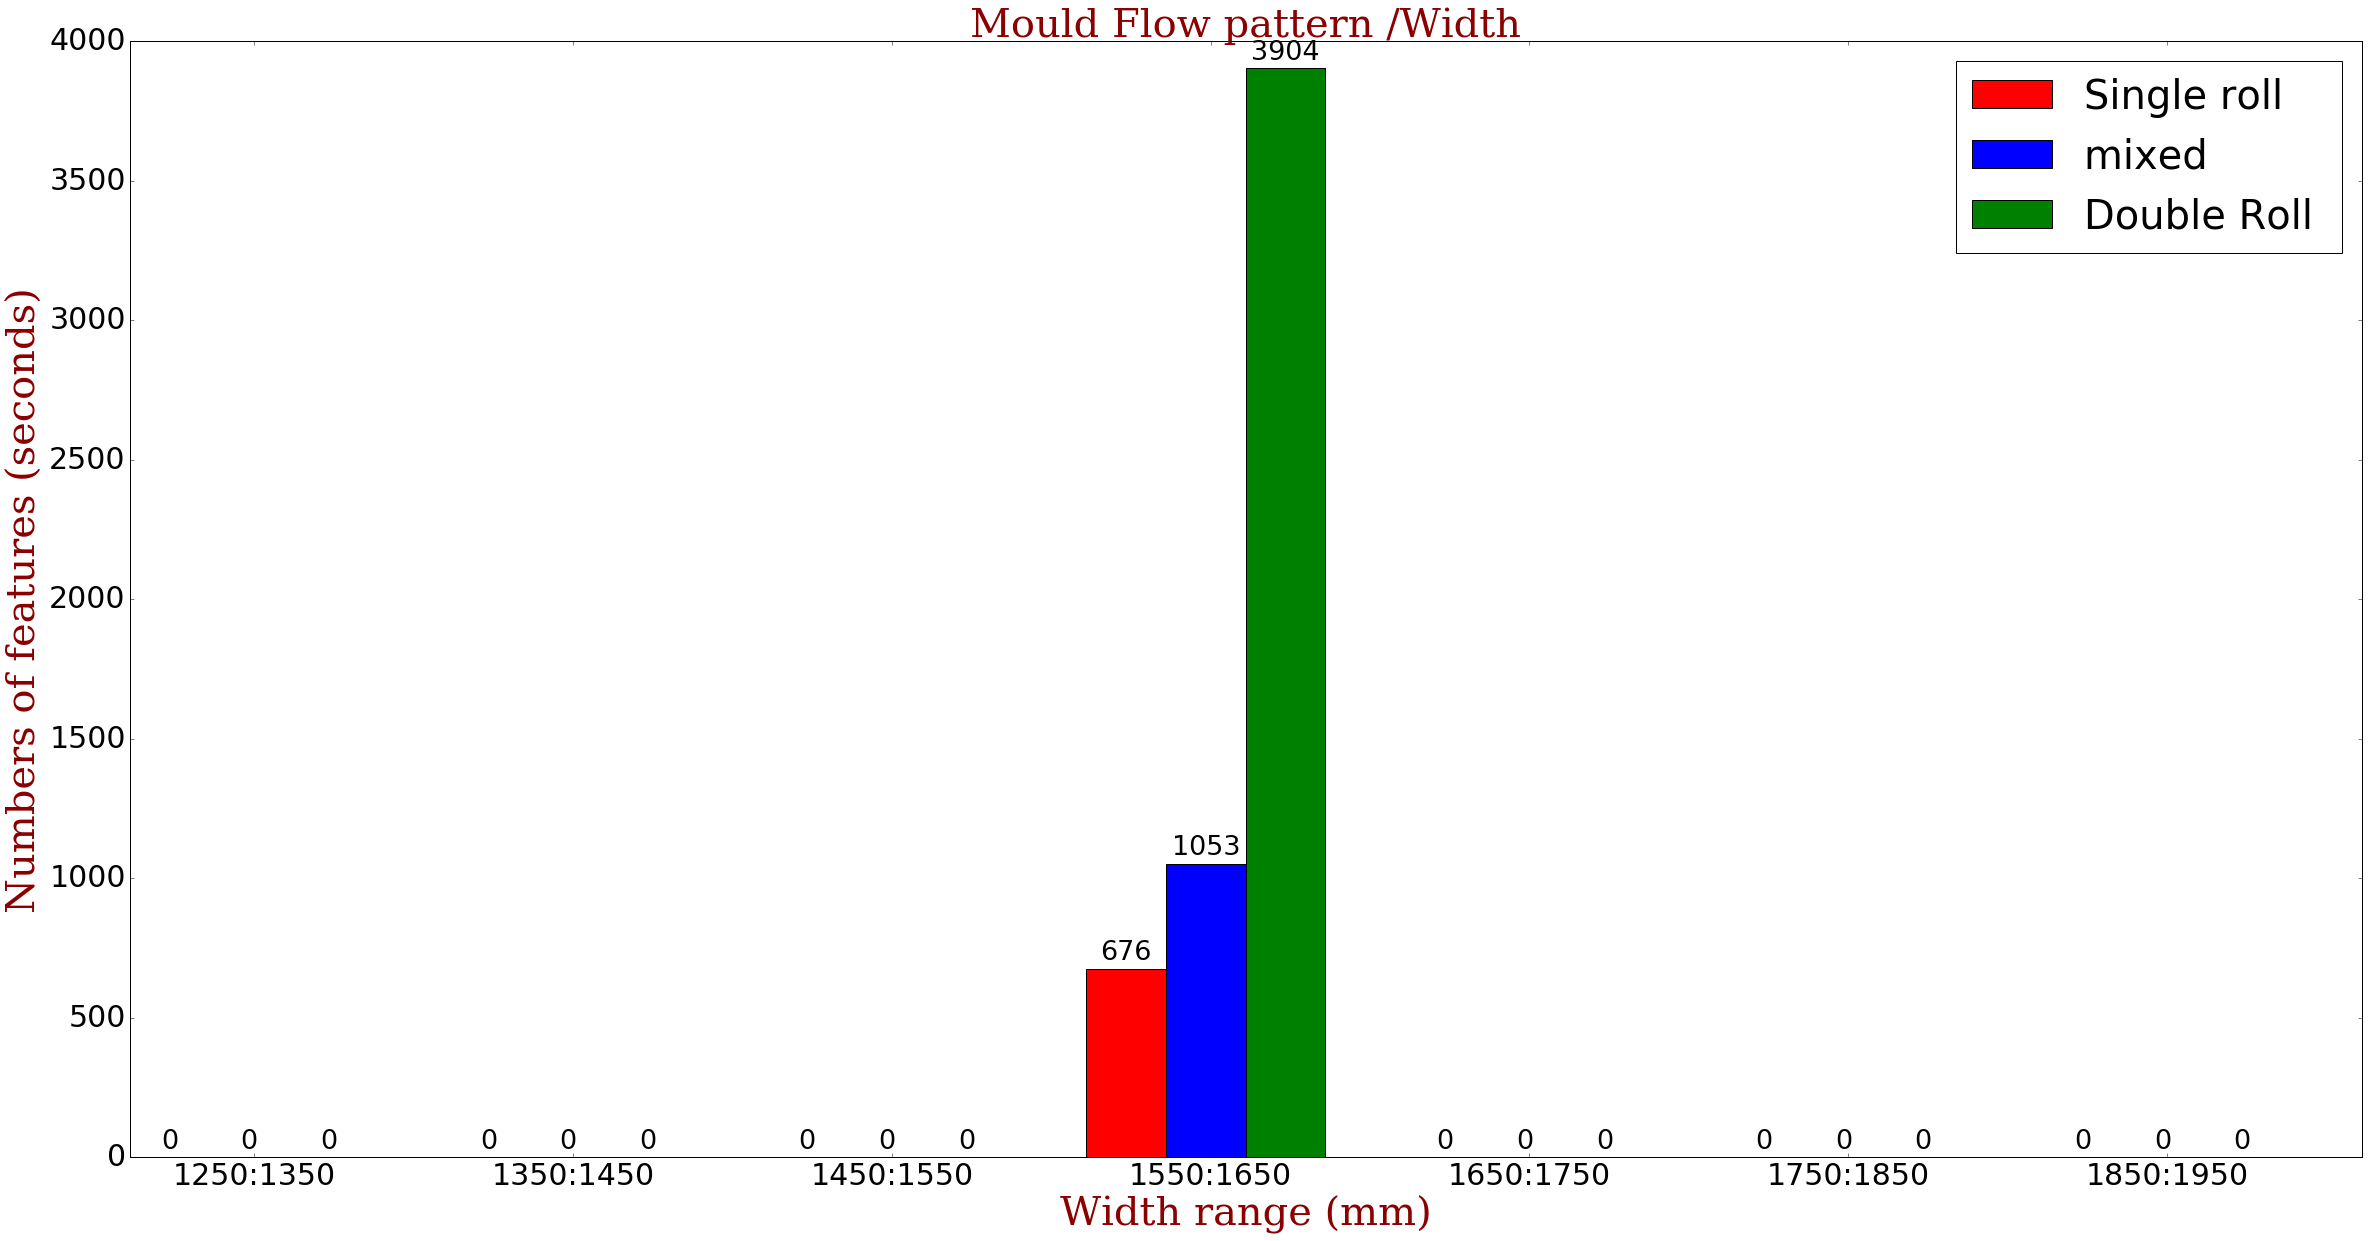

In [91]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[9])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

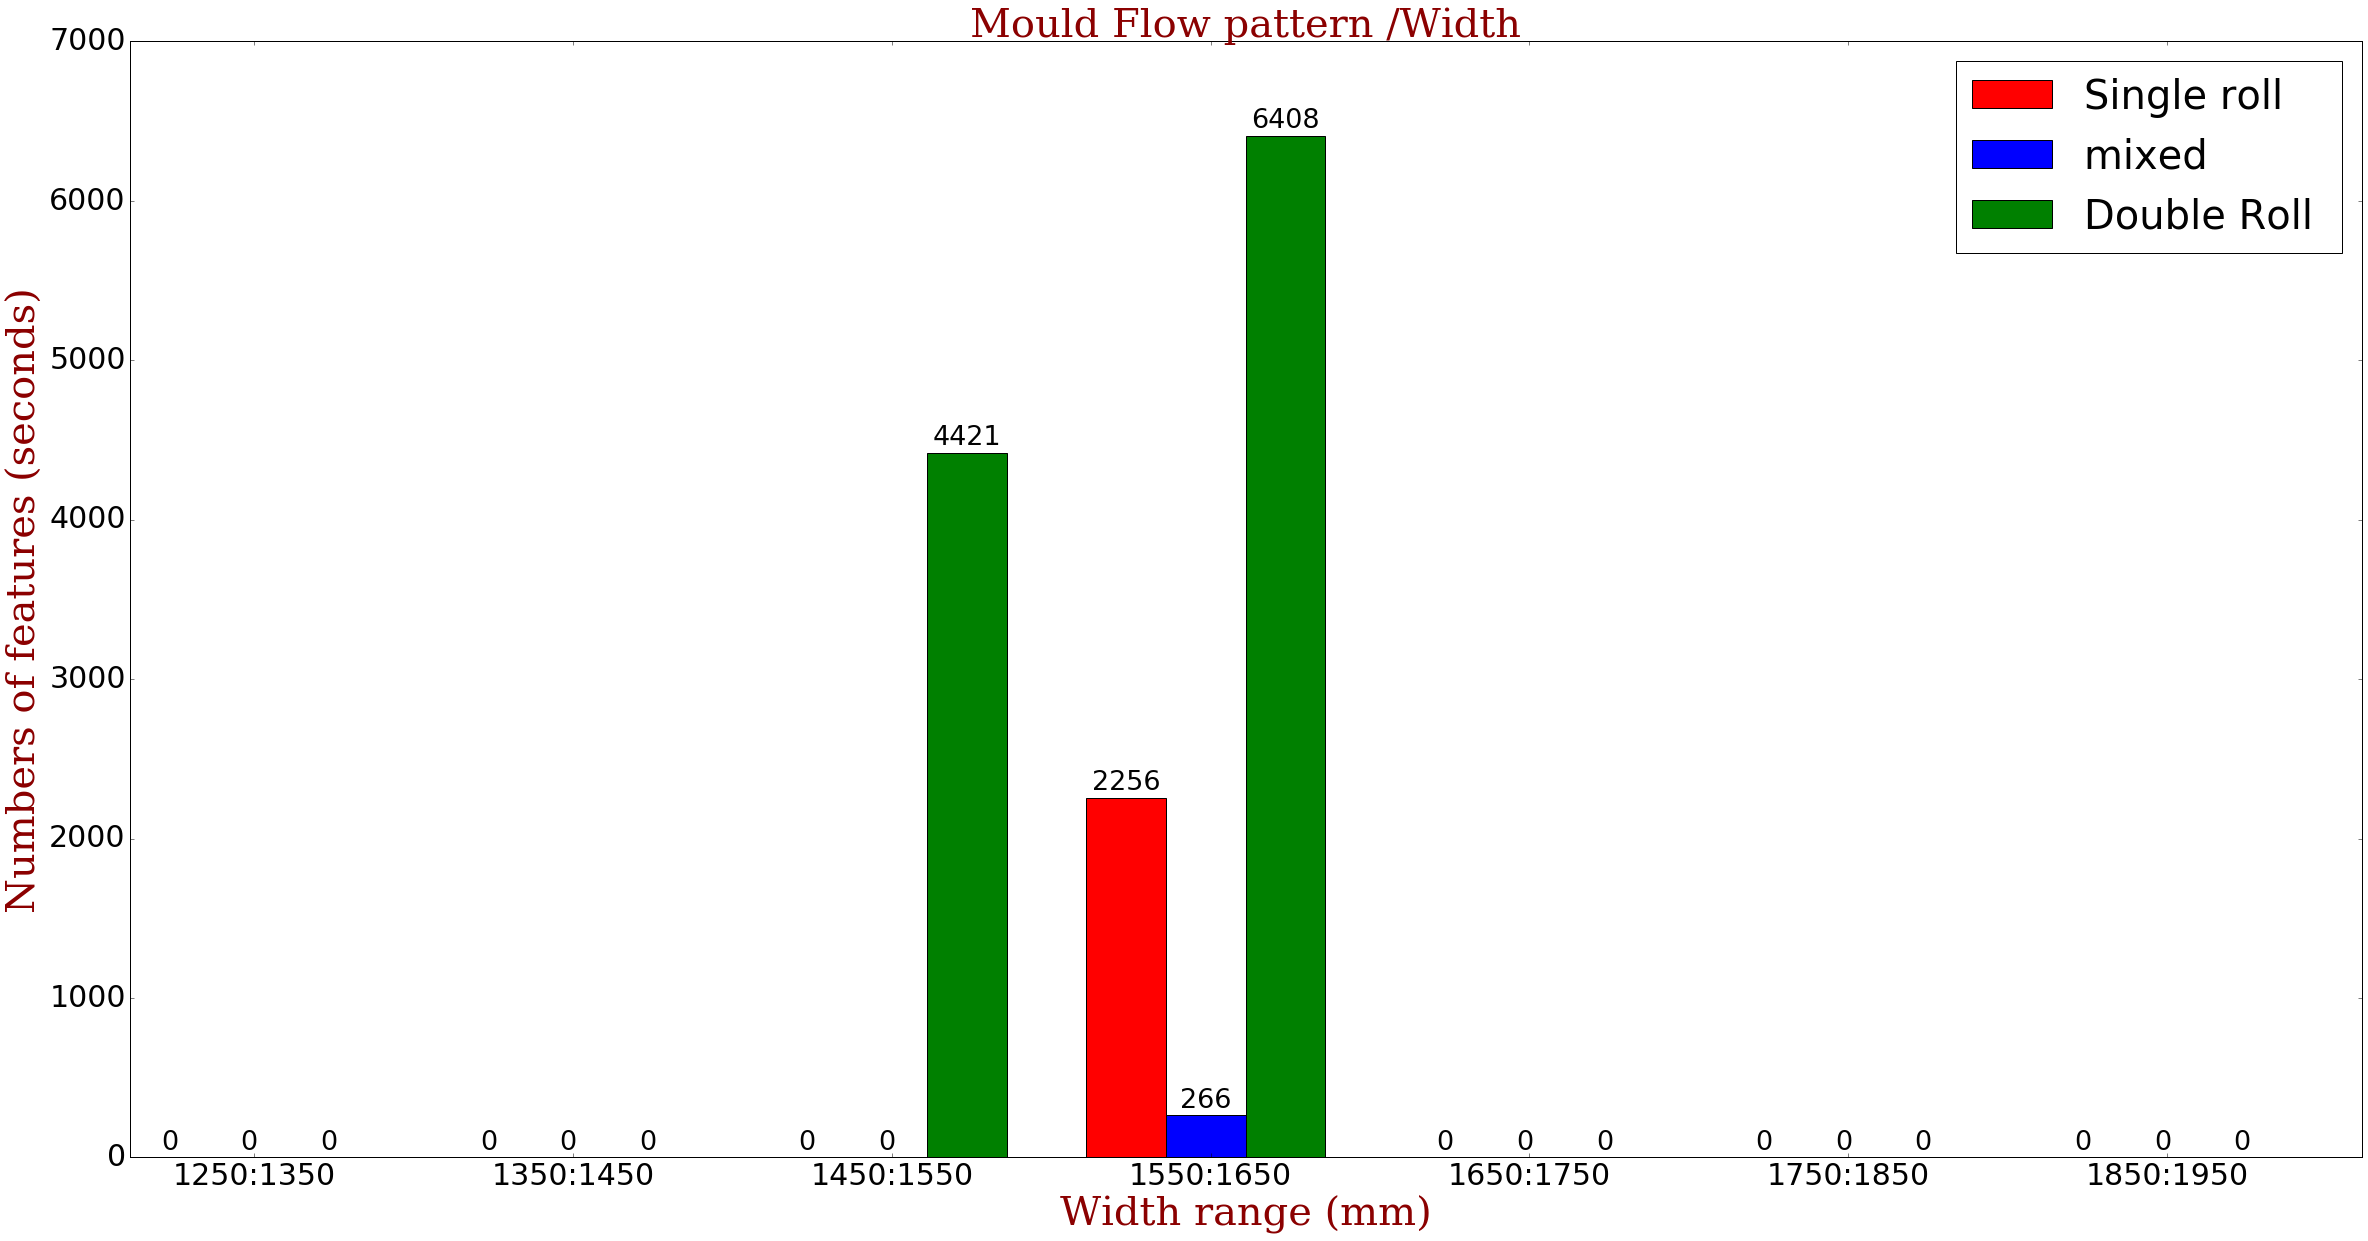

In [92]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[10])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

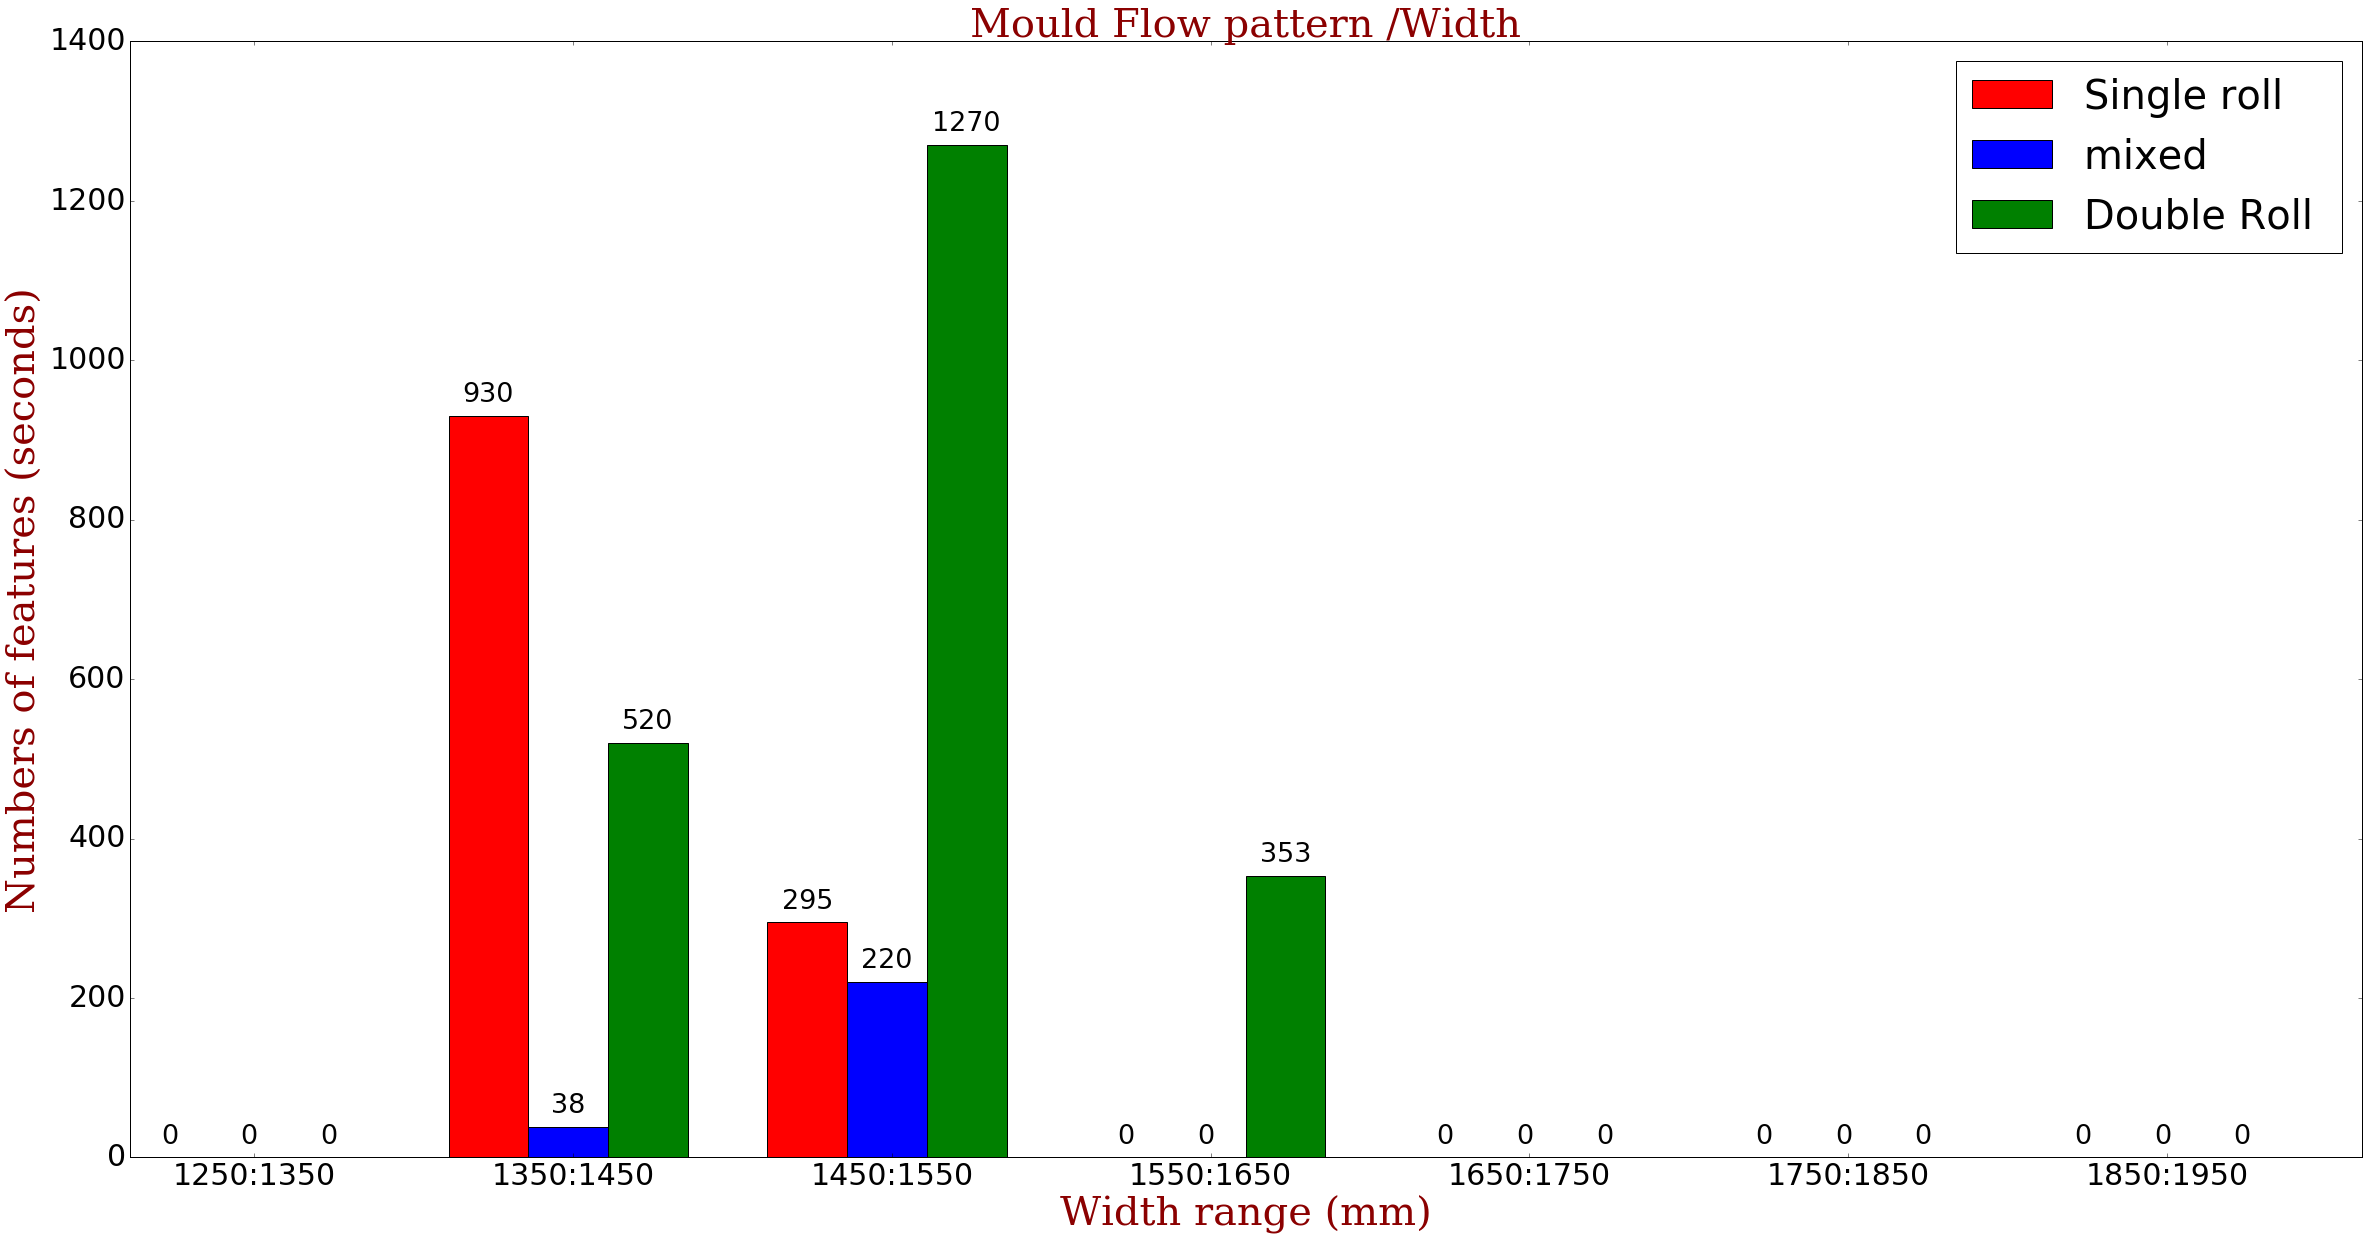

In [93]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[11])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

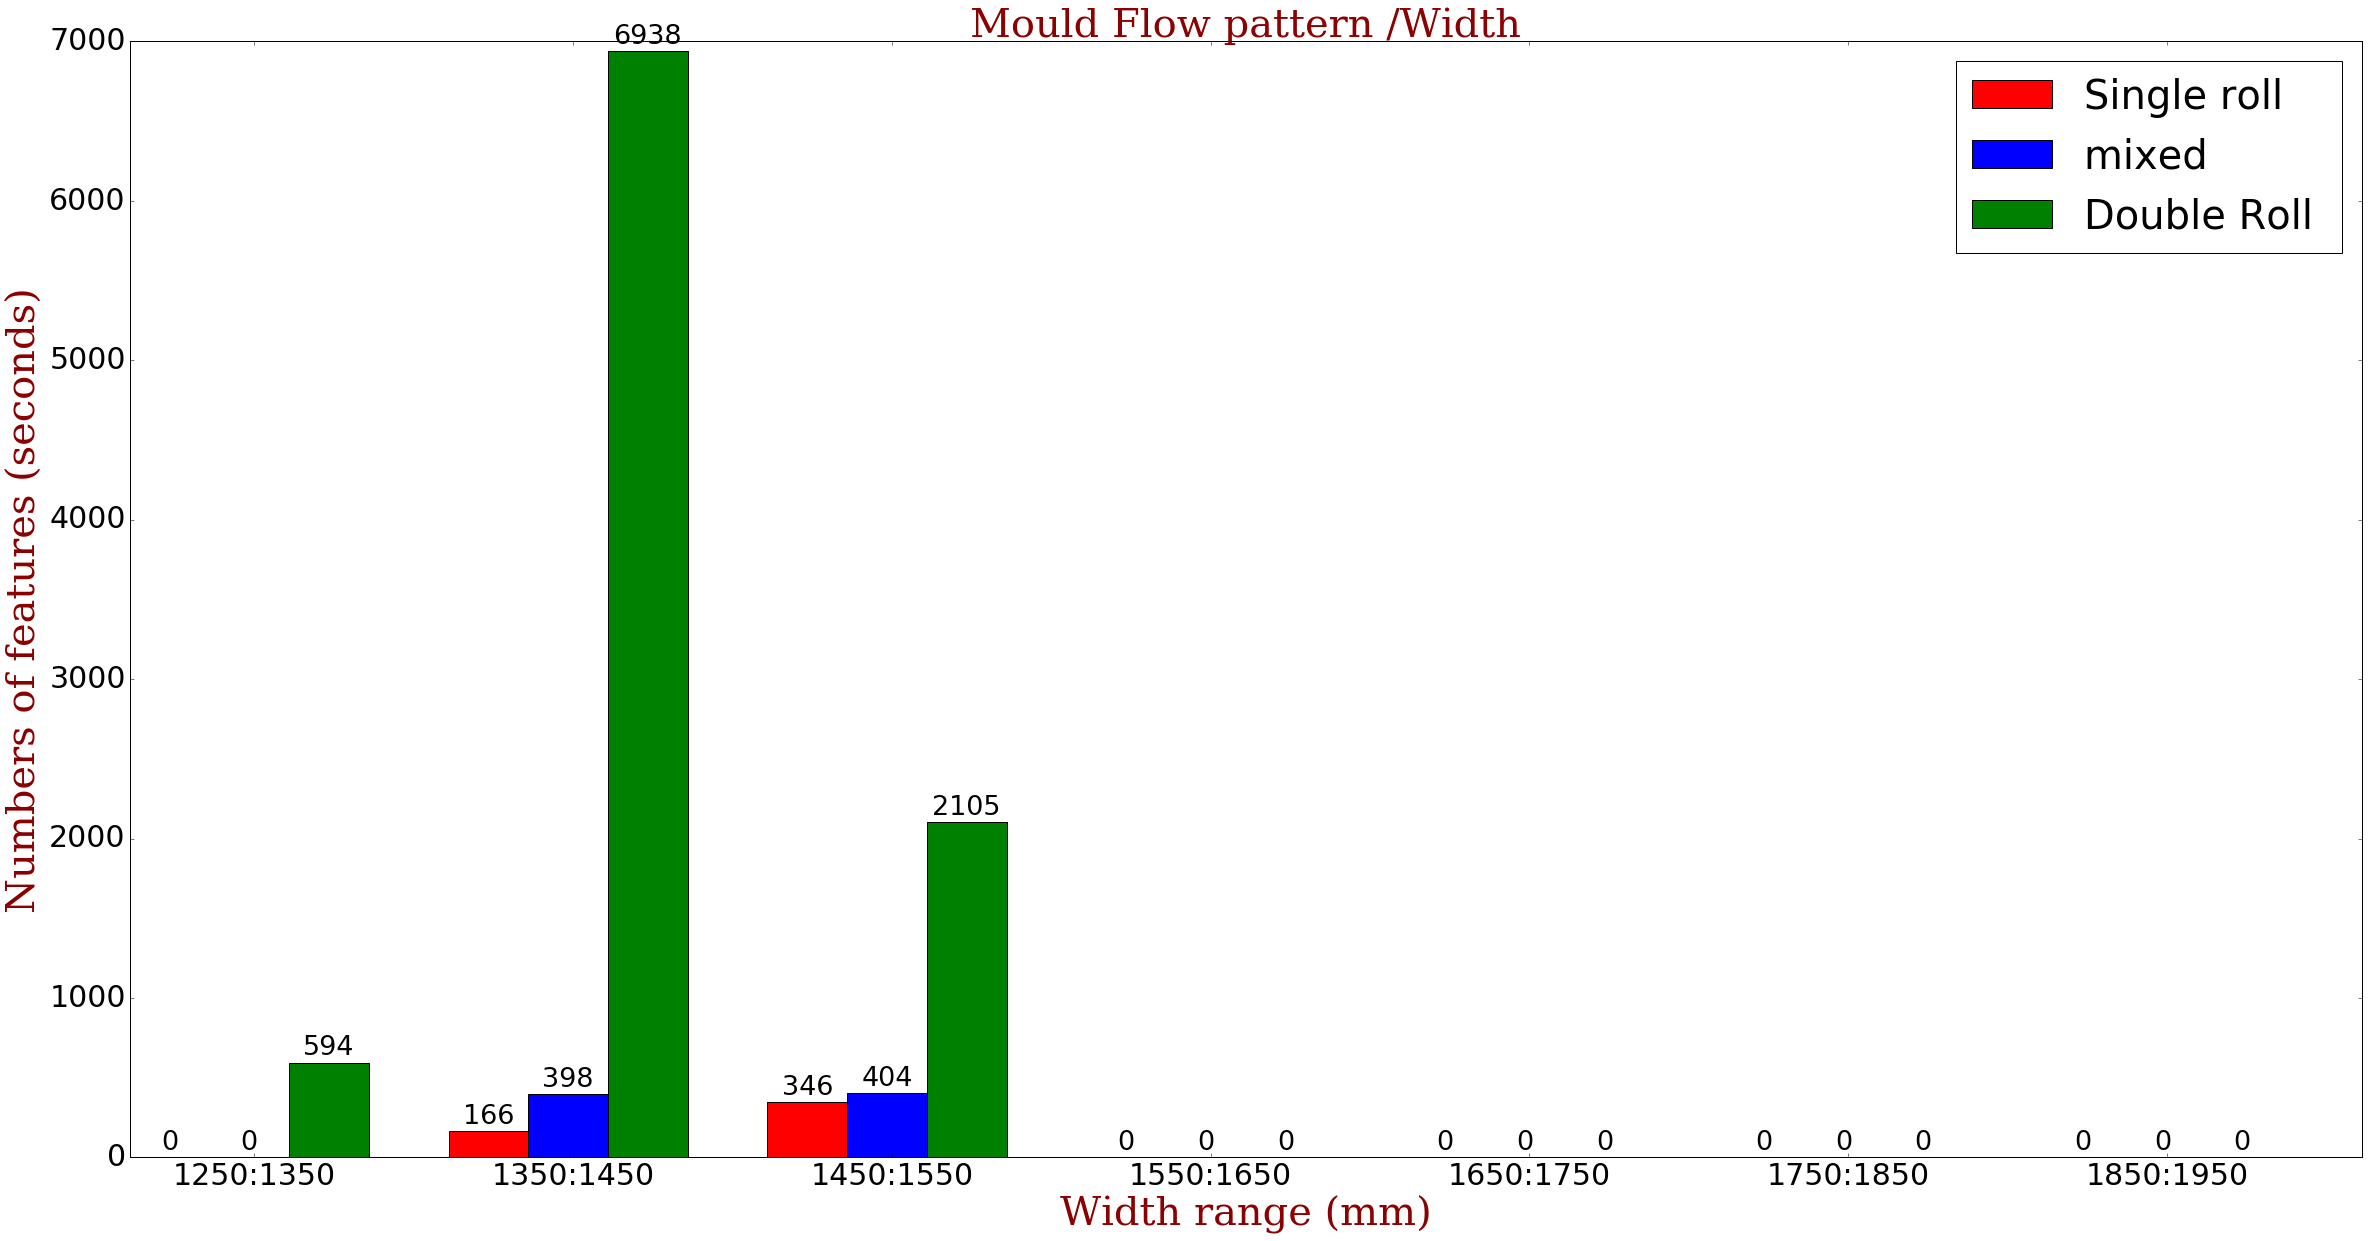

In [94]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[12])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

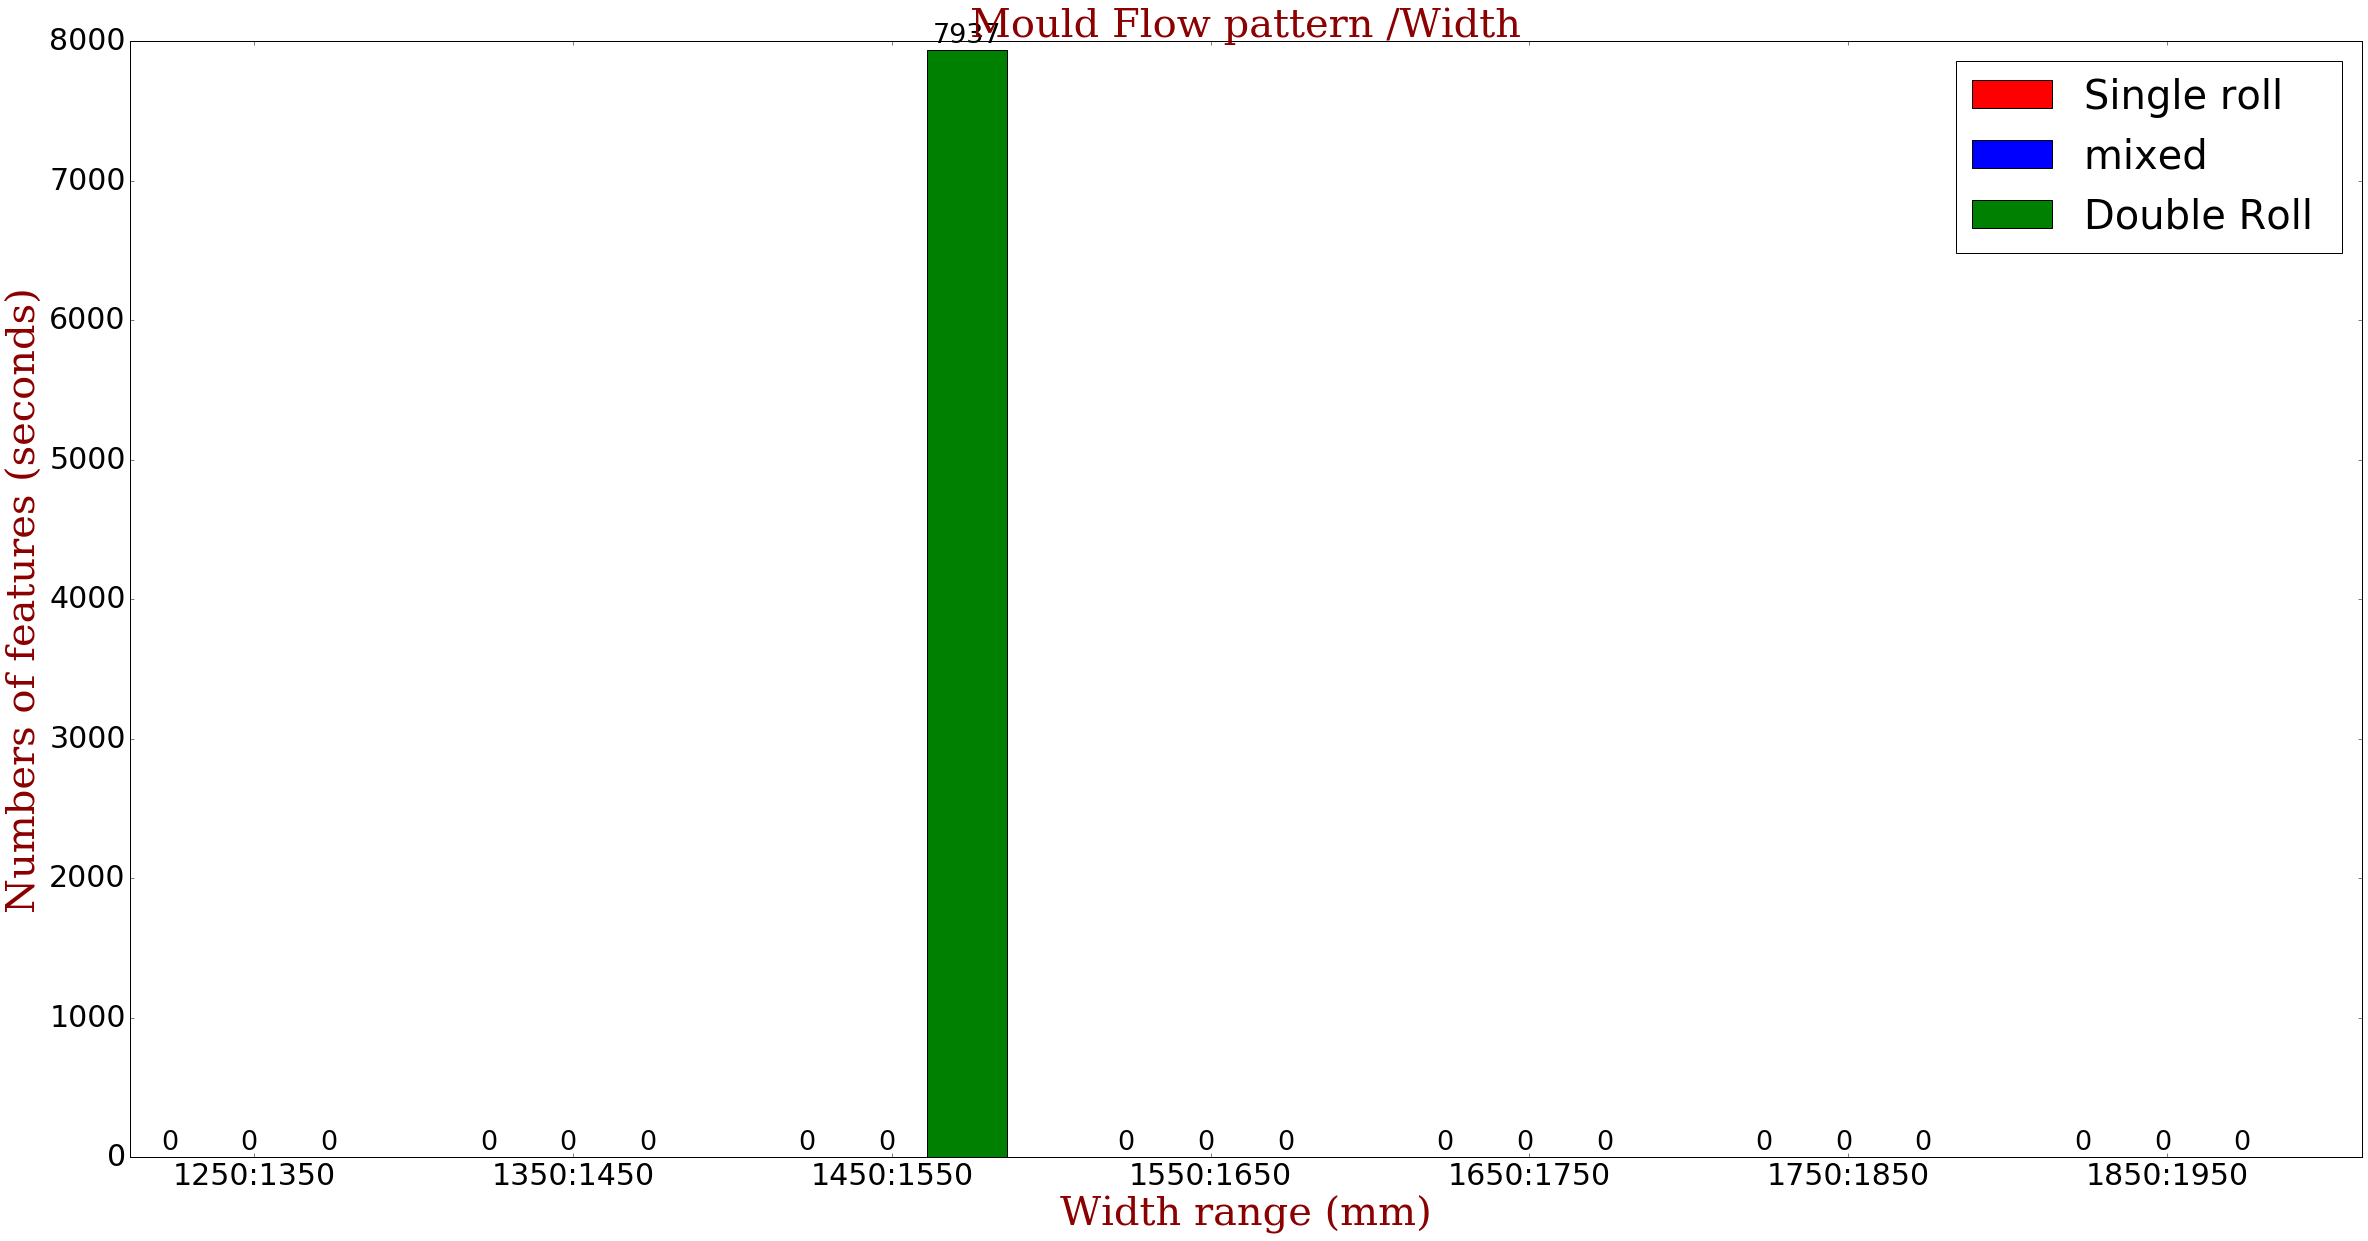

In [95]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[13])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

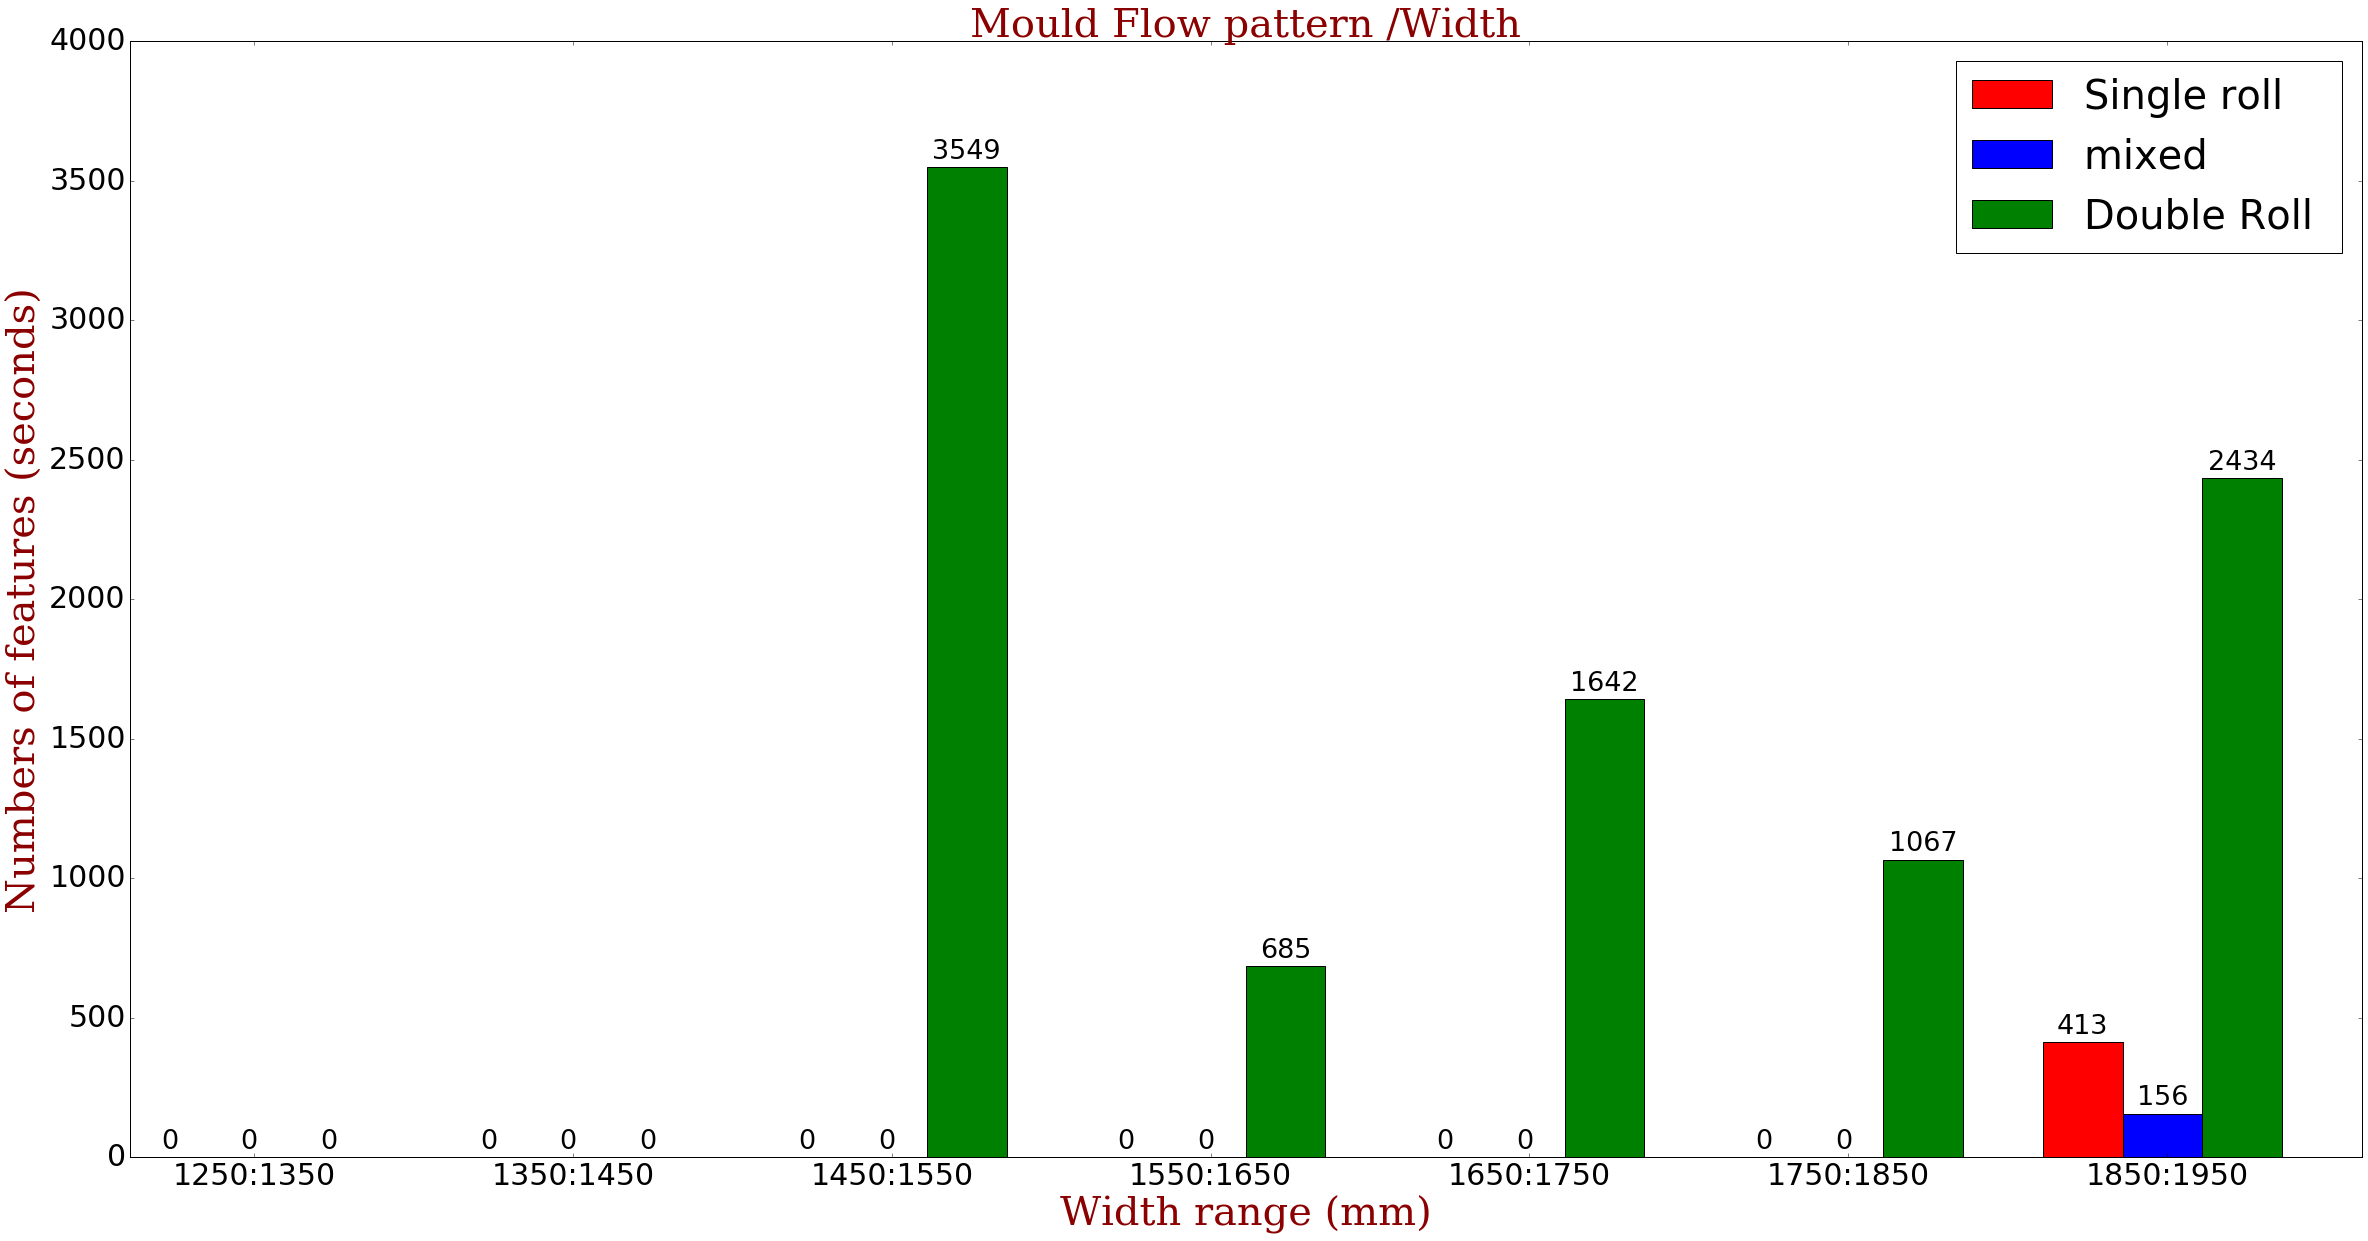

In [96]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[14])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

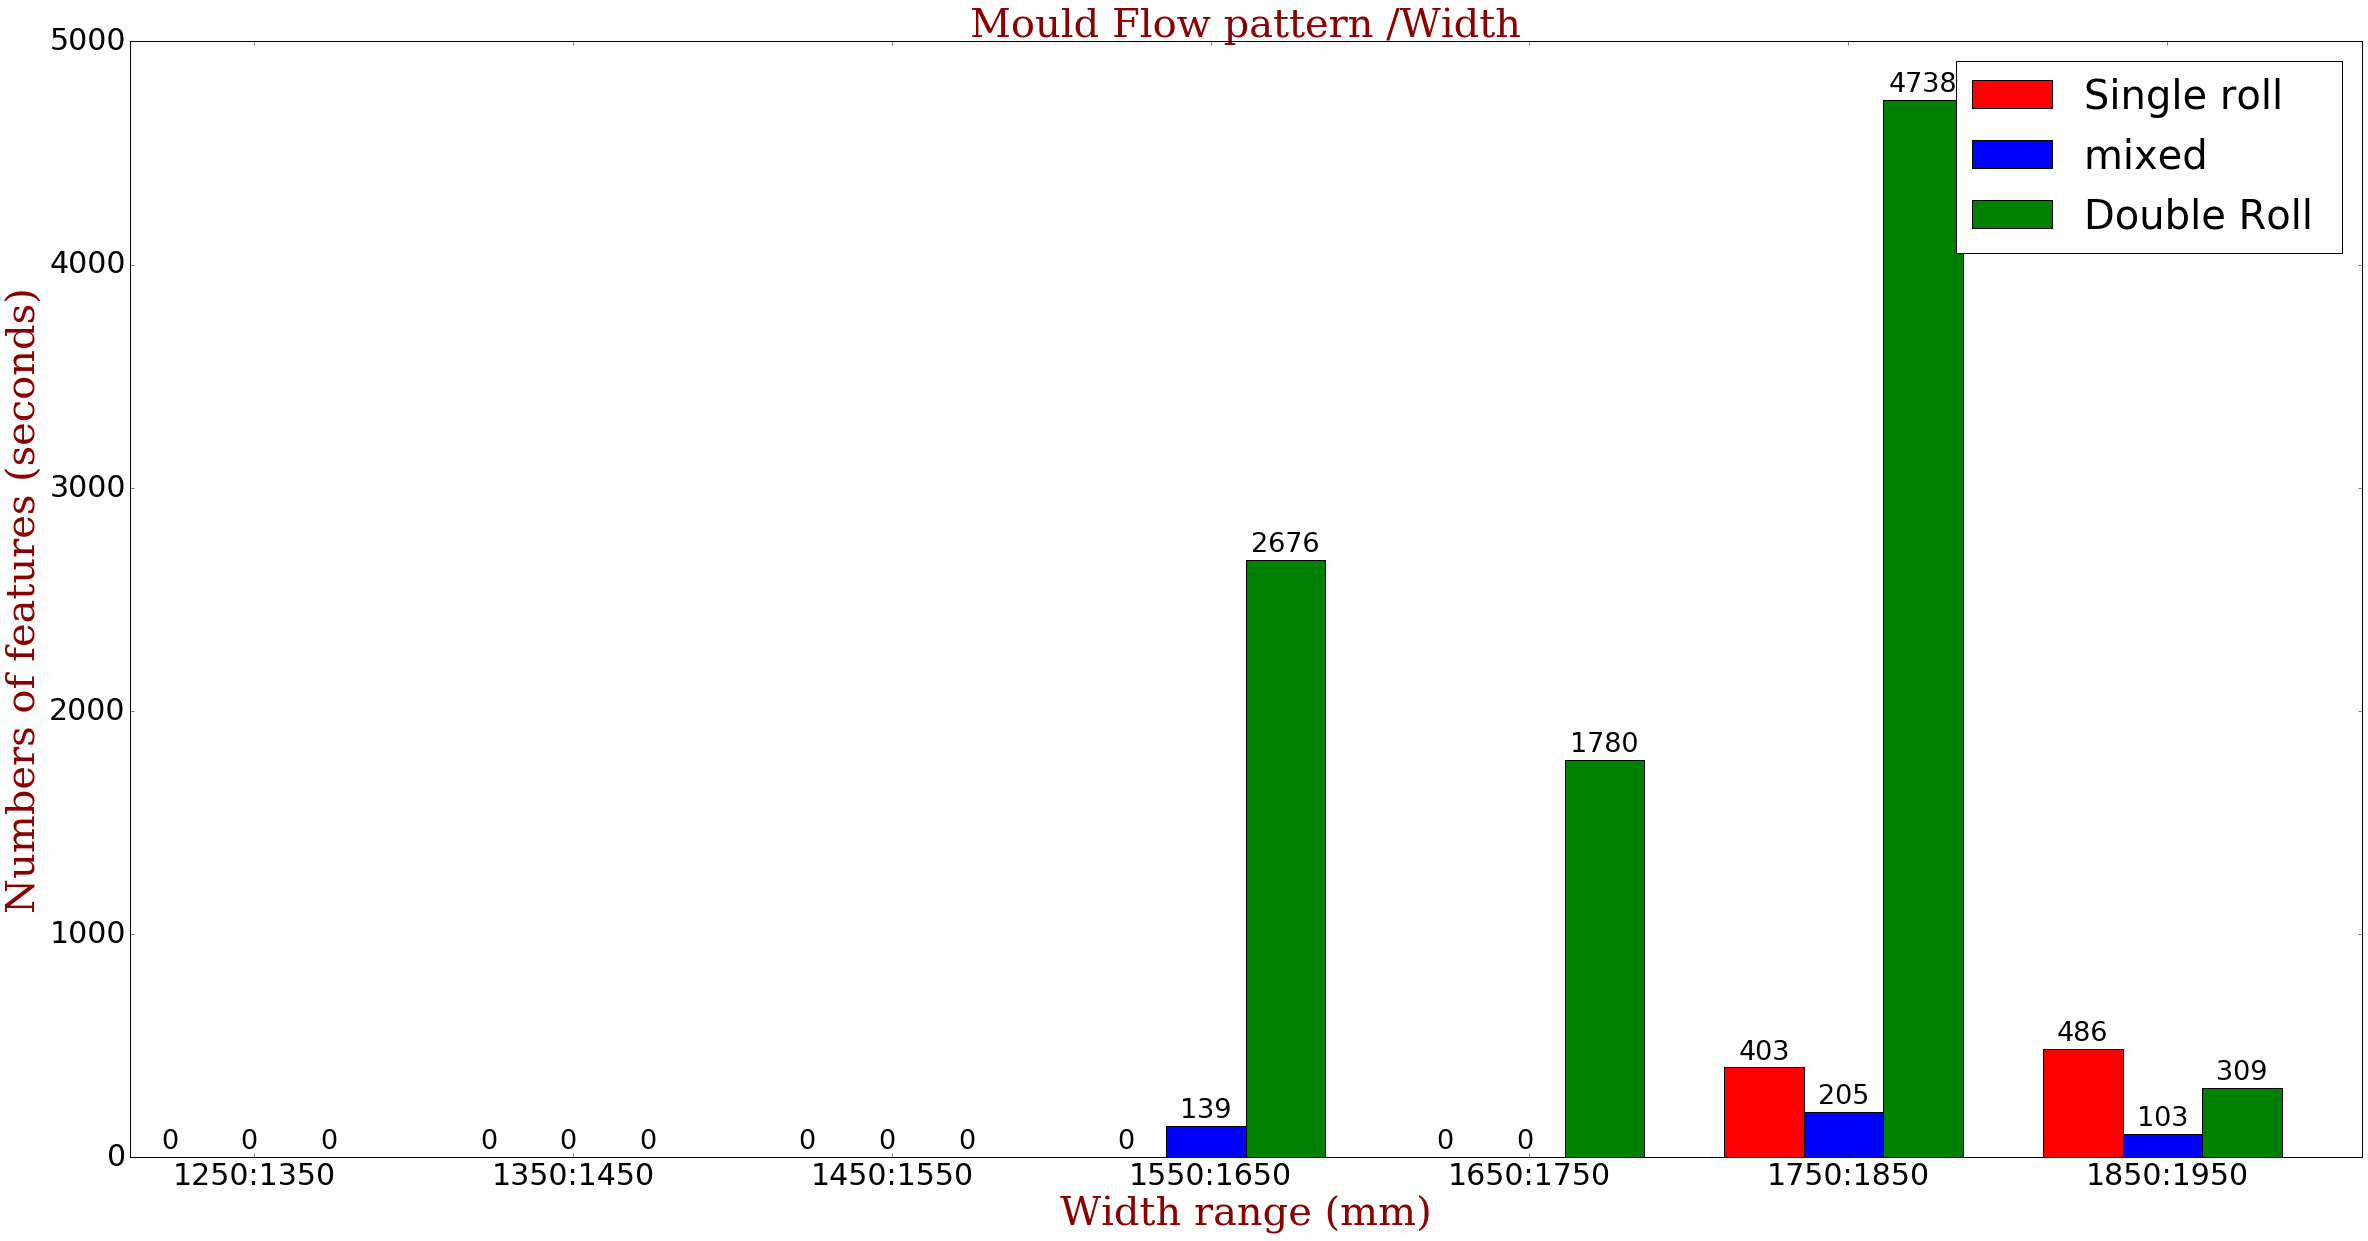

In [97]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[15])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

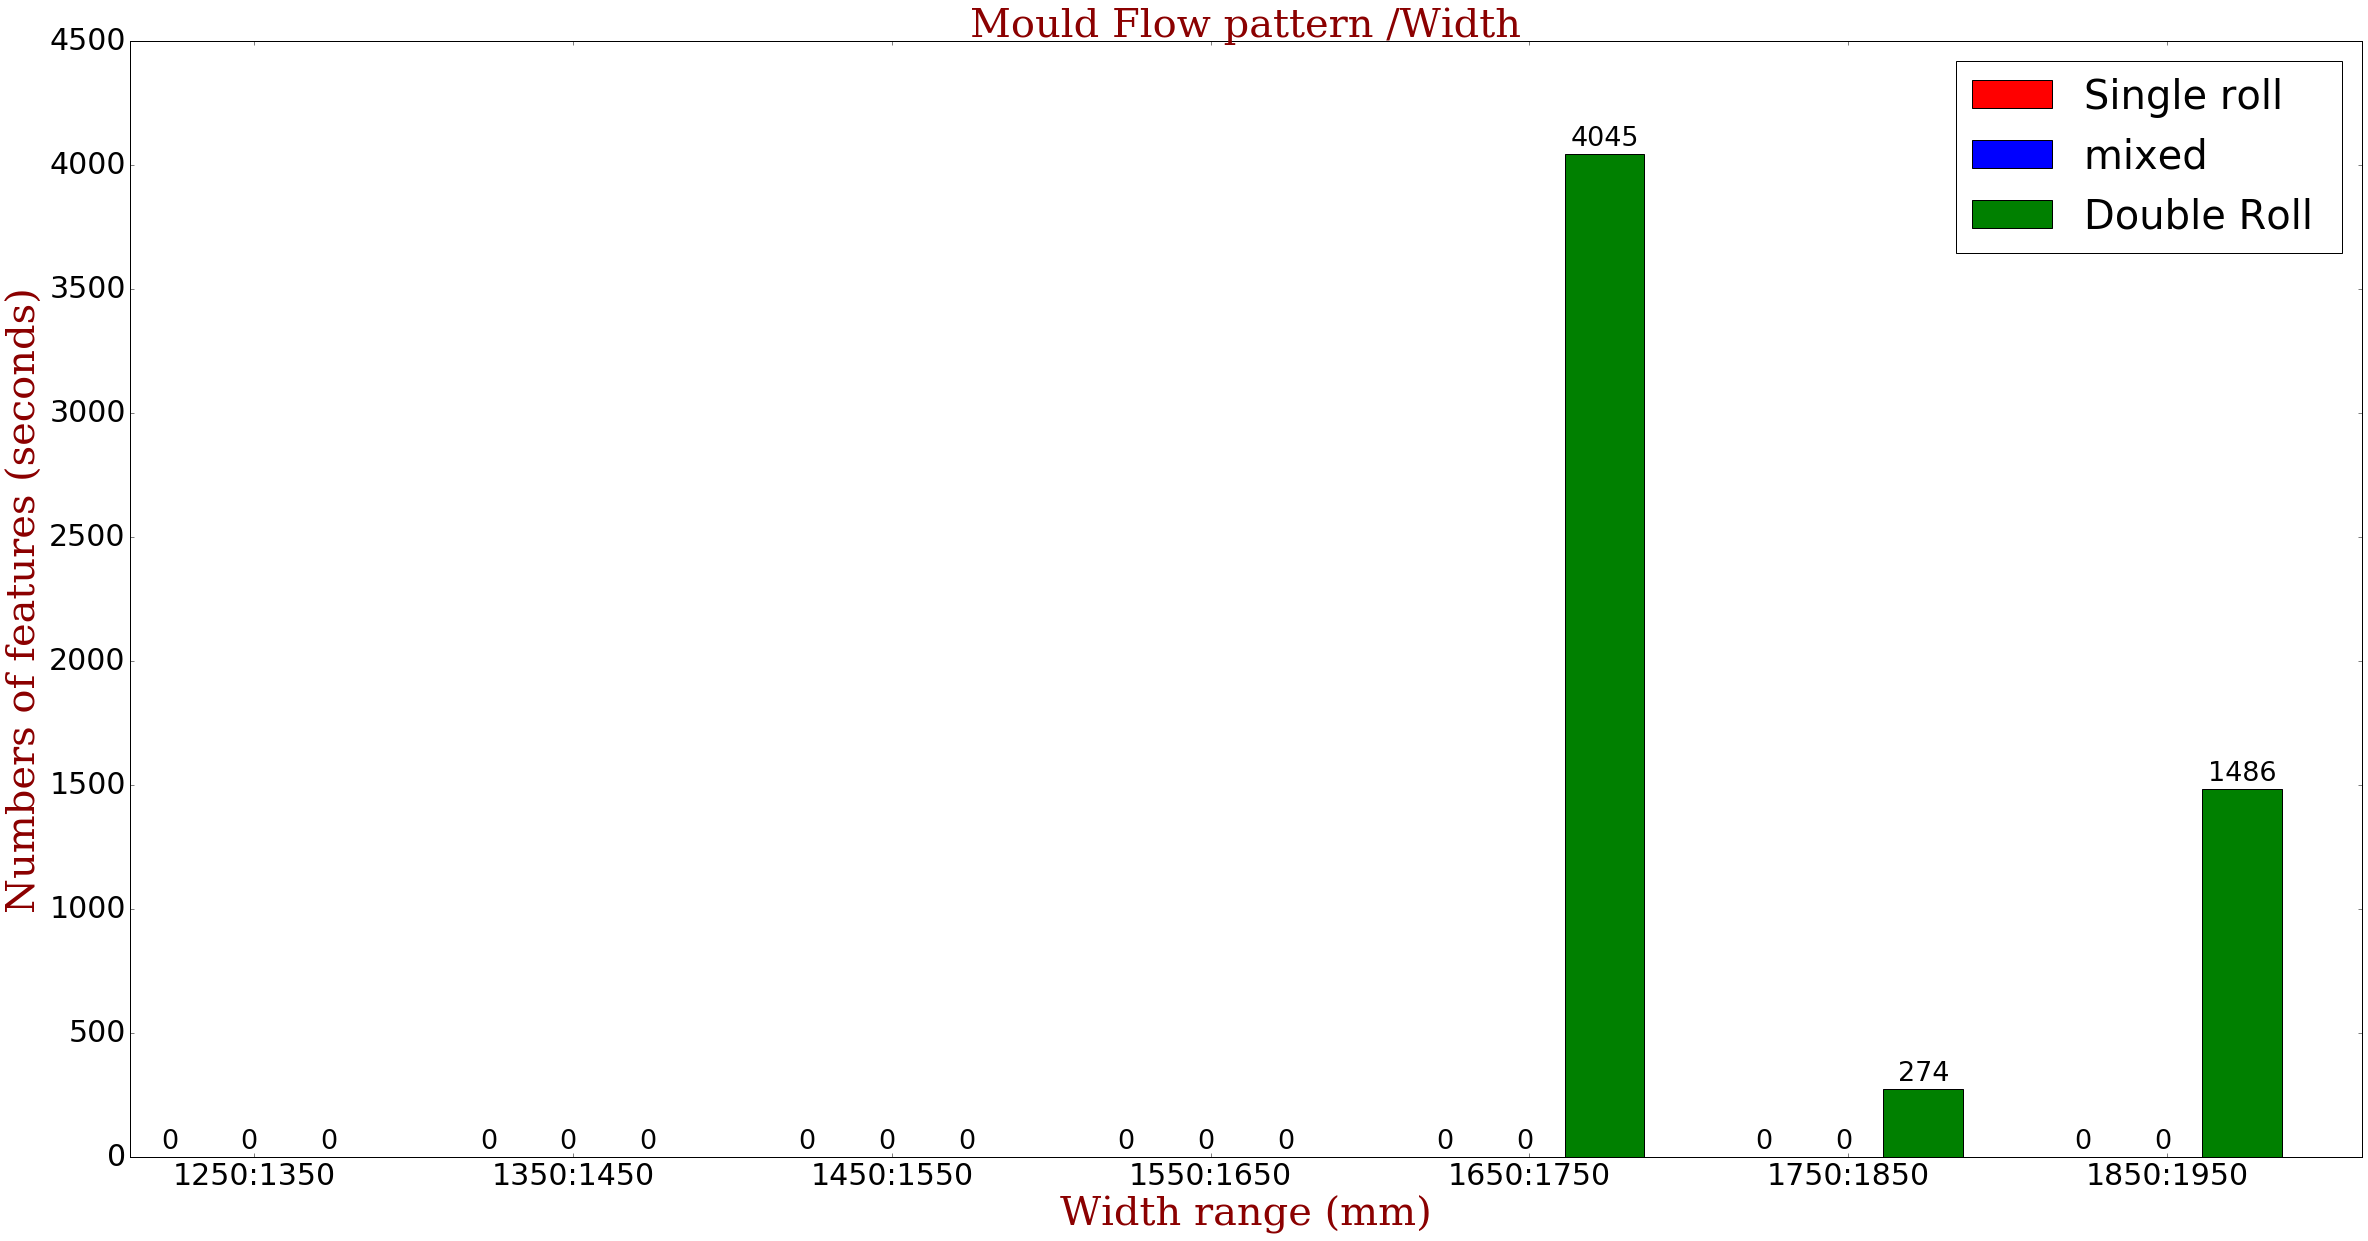

In [98]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[16])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

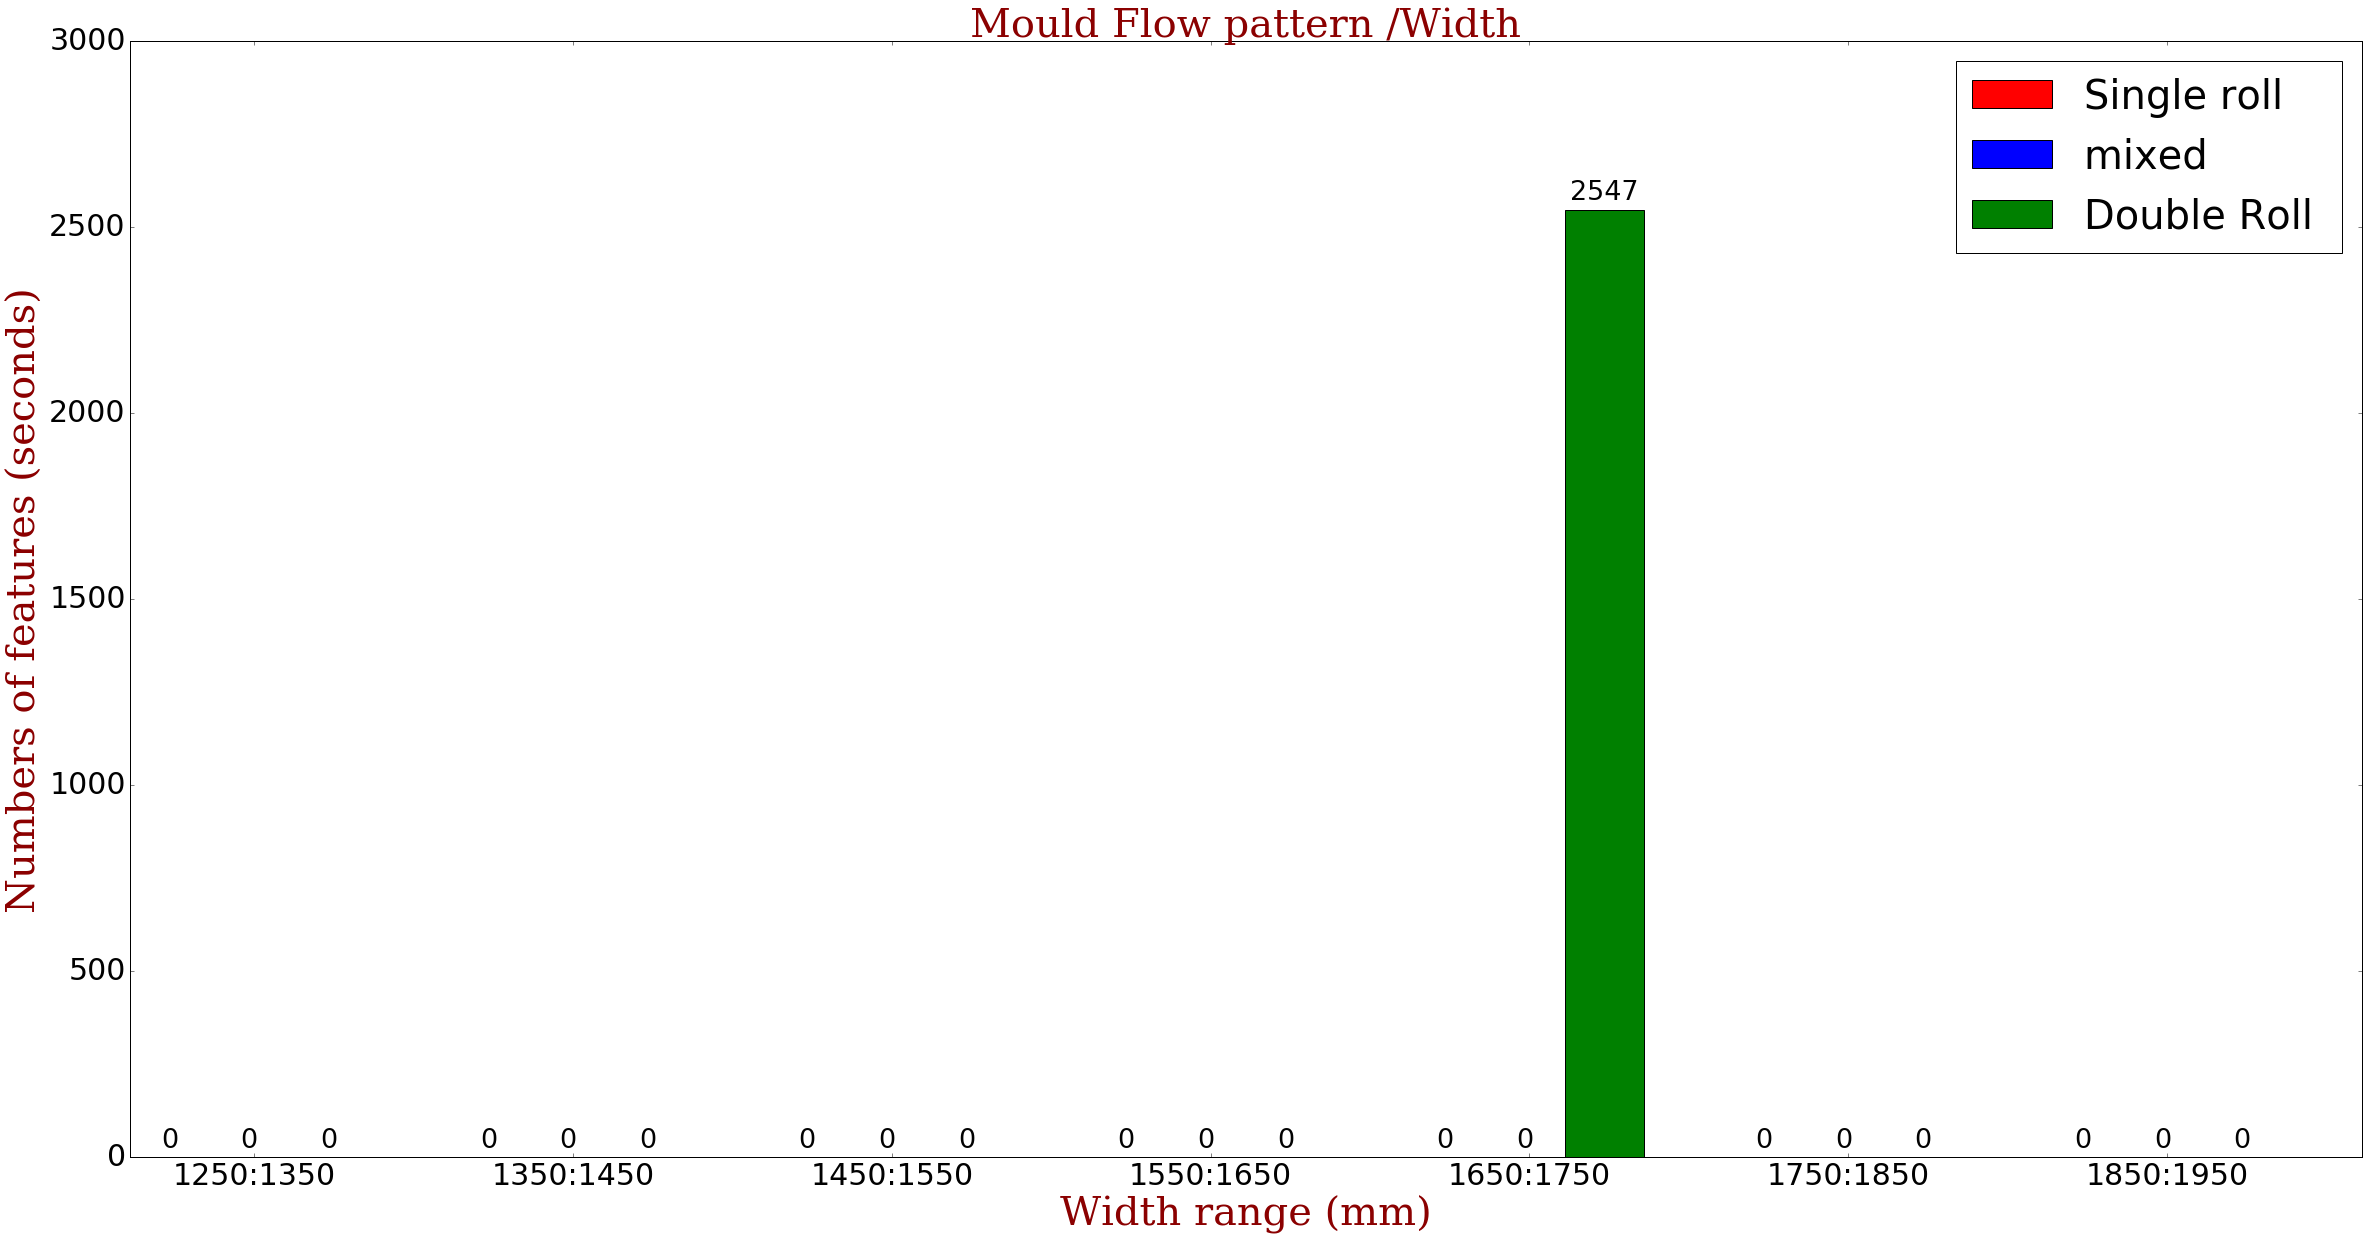

In [99]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[17])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

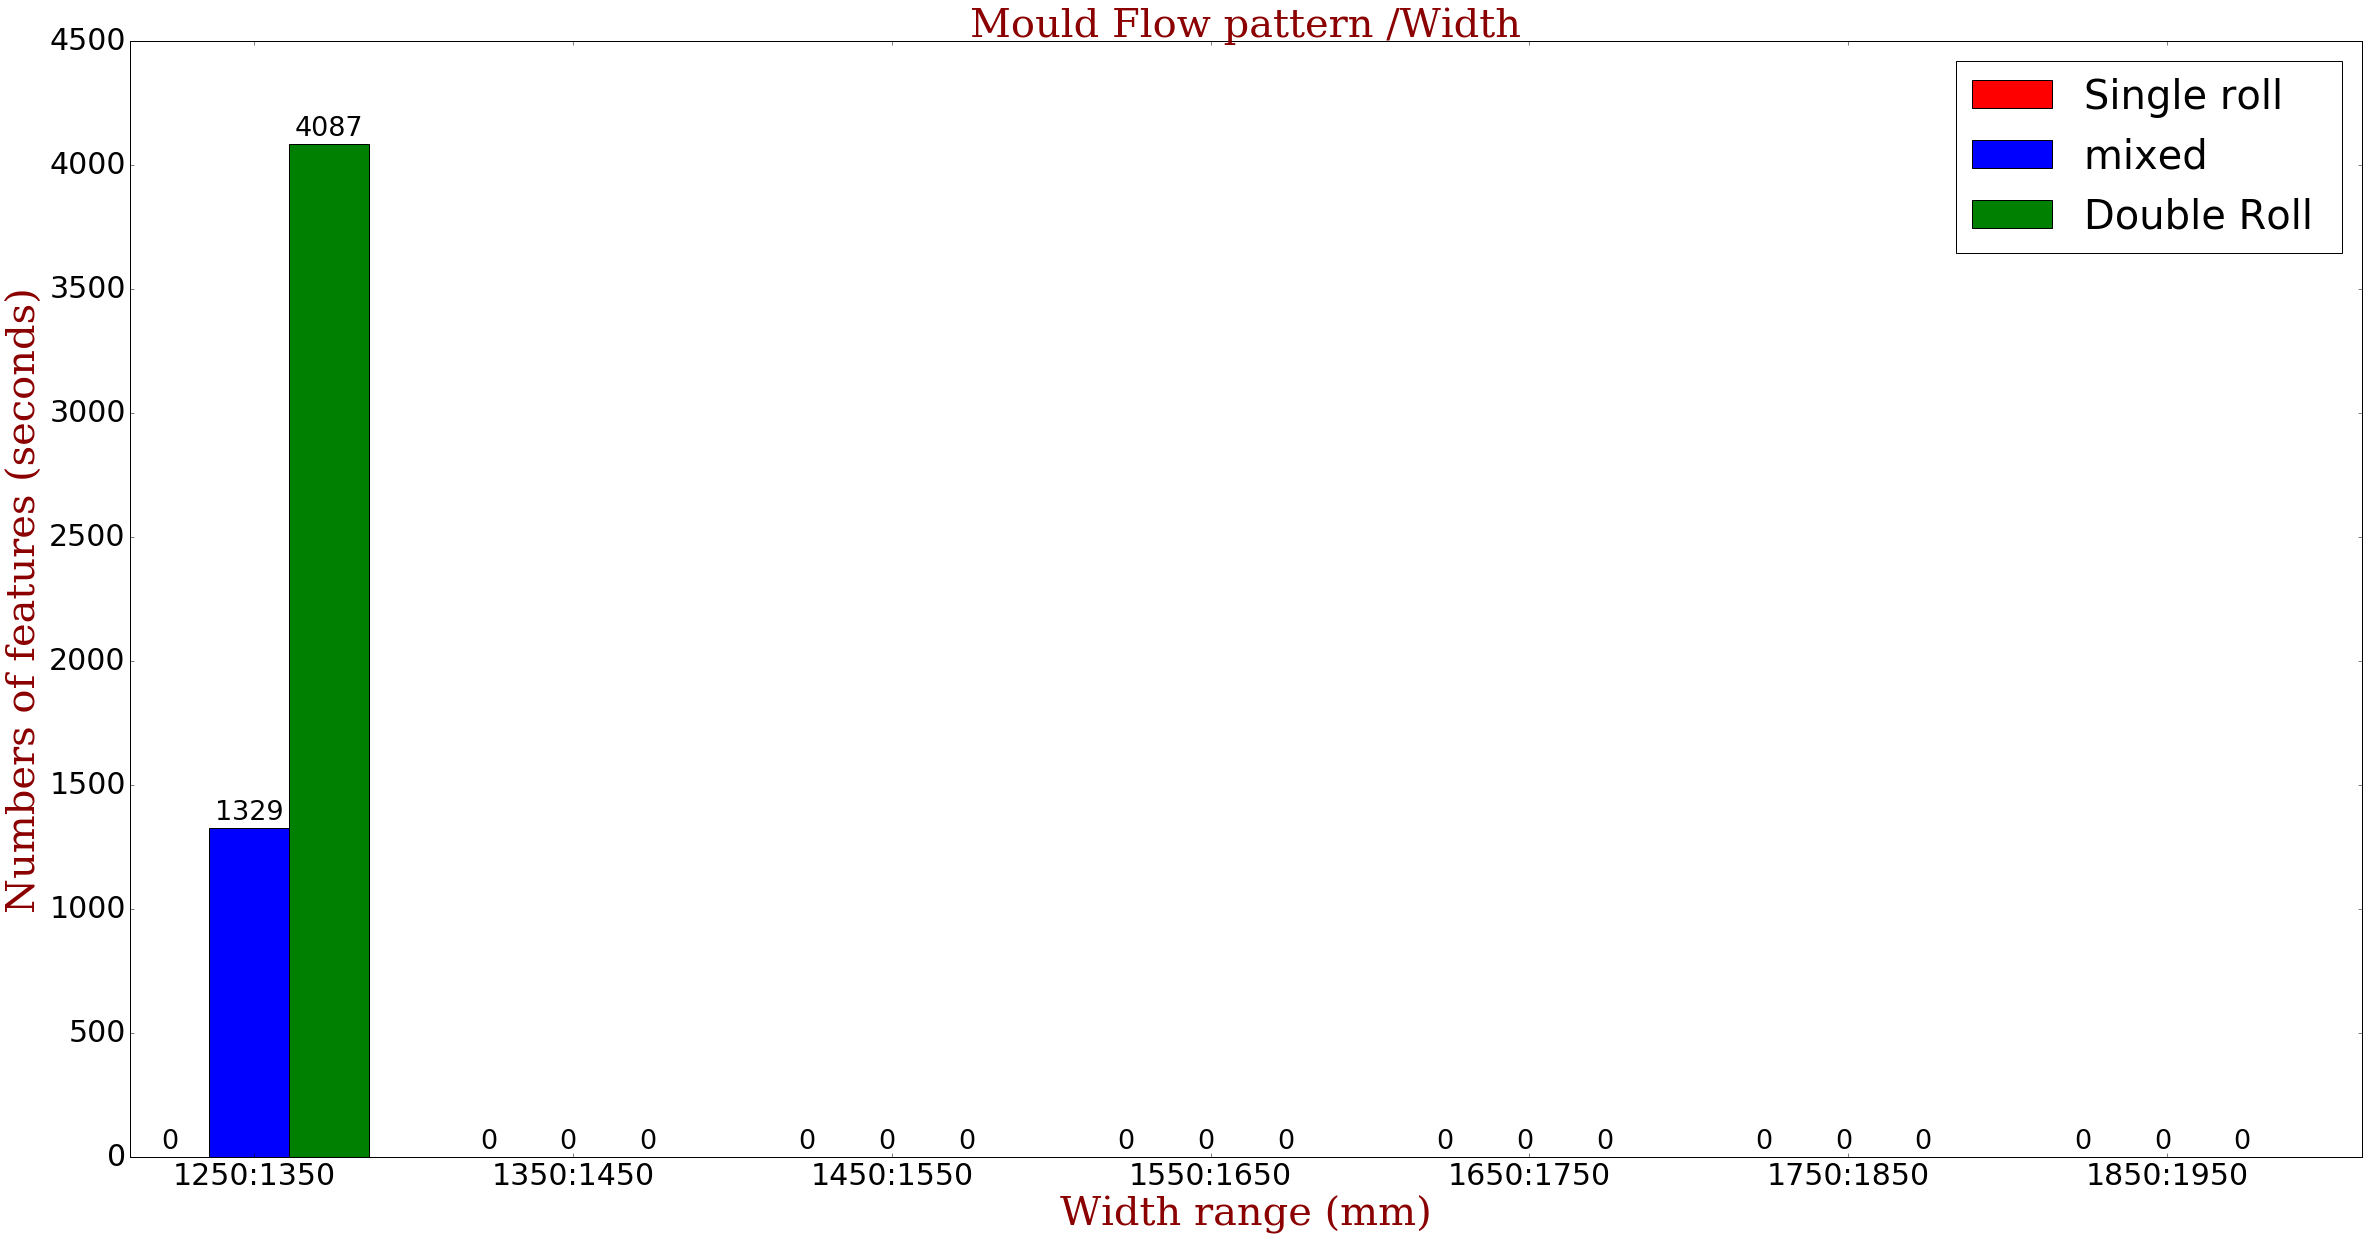

In [100]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[18])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

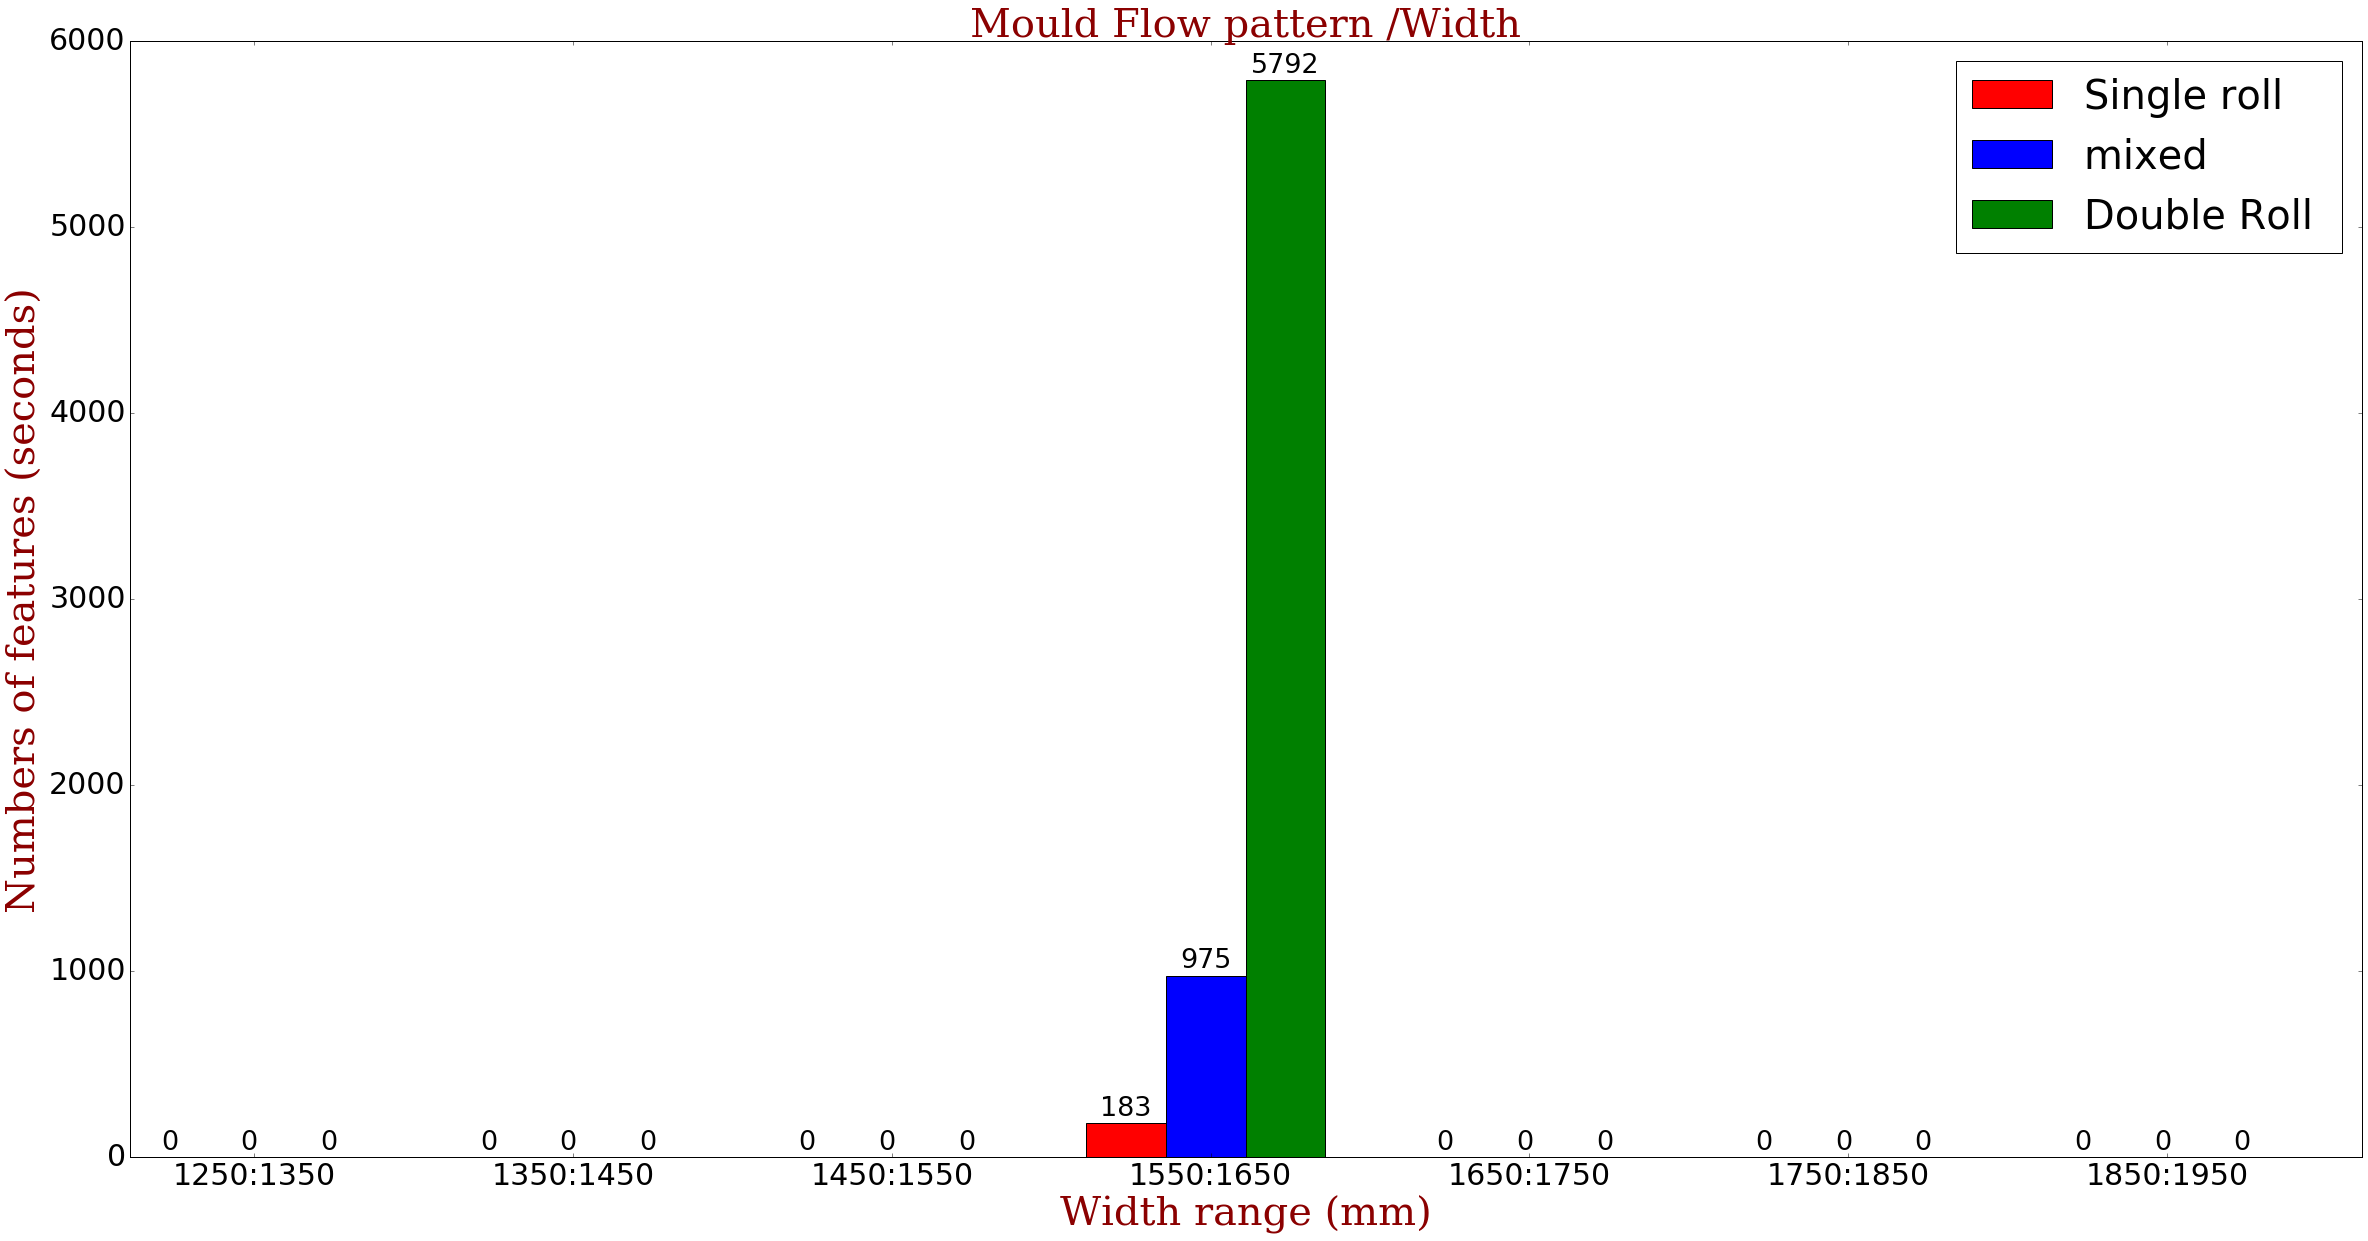

In [101]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[19])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

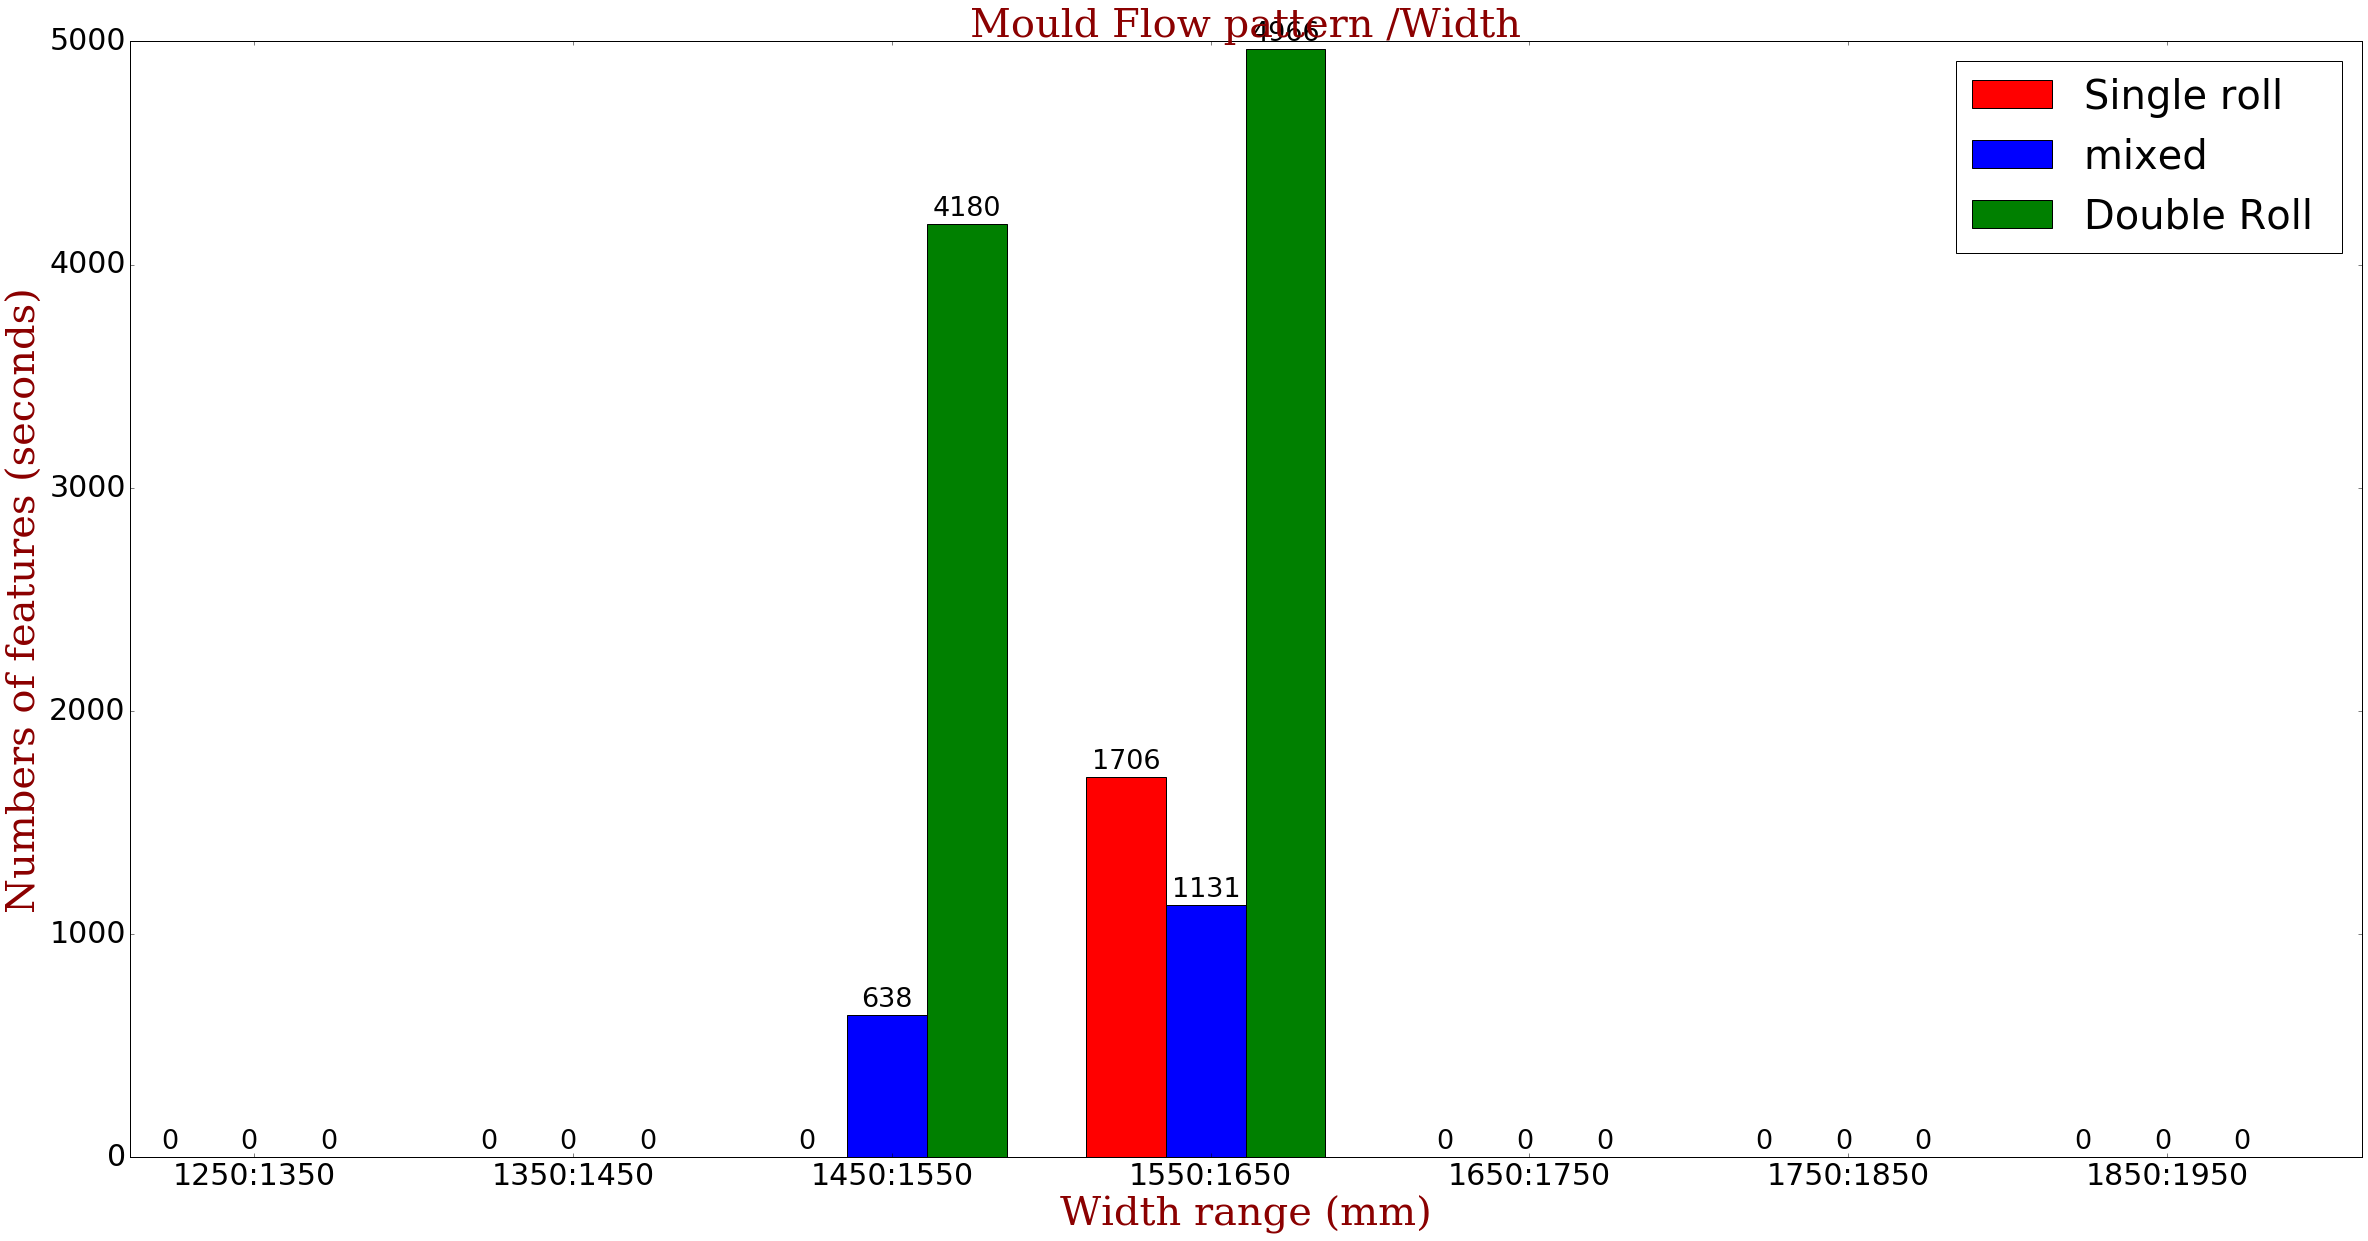

In [102]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[20])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

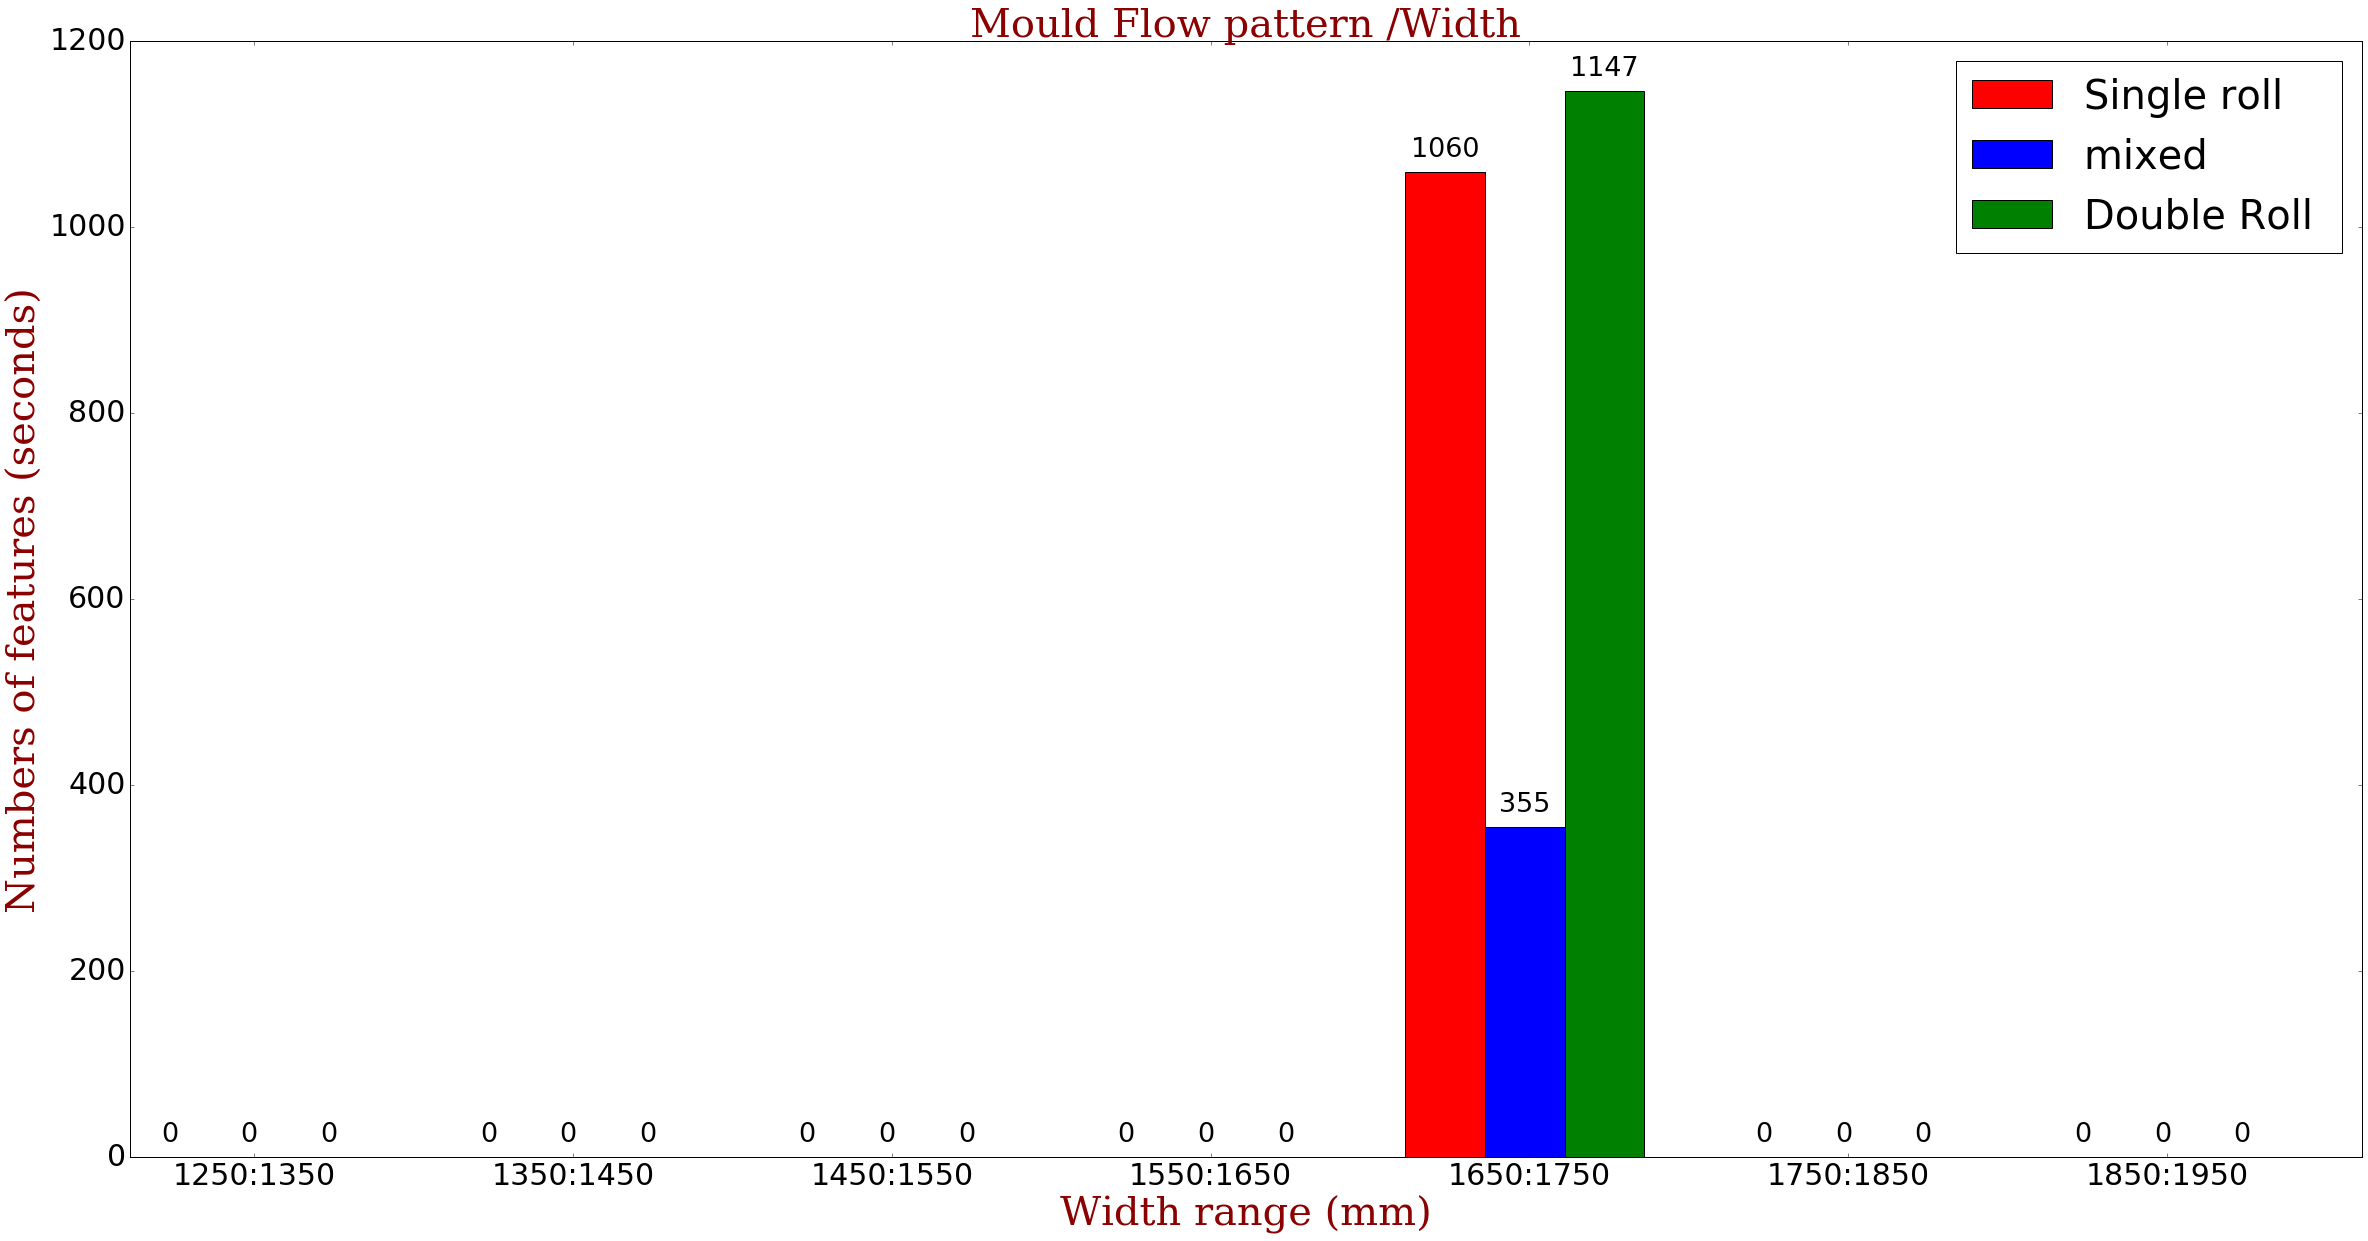

In [103]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[21])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

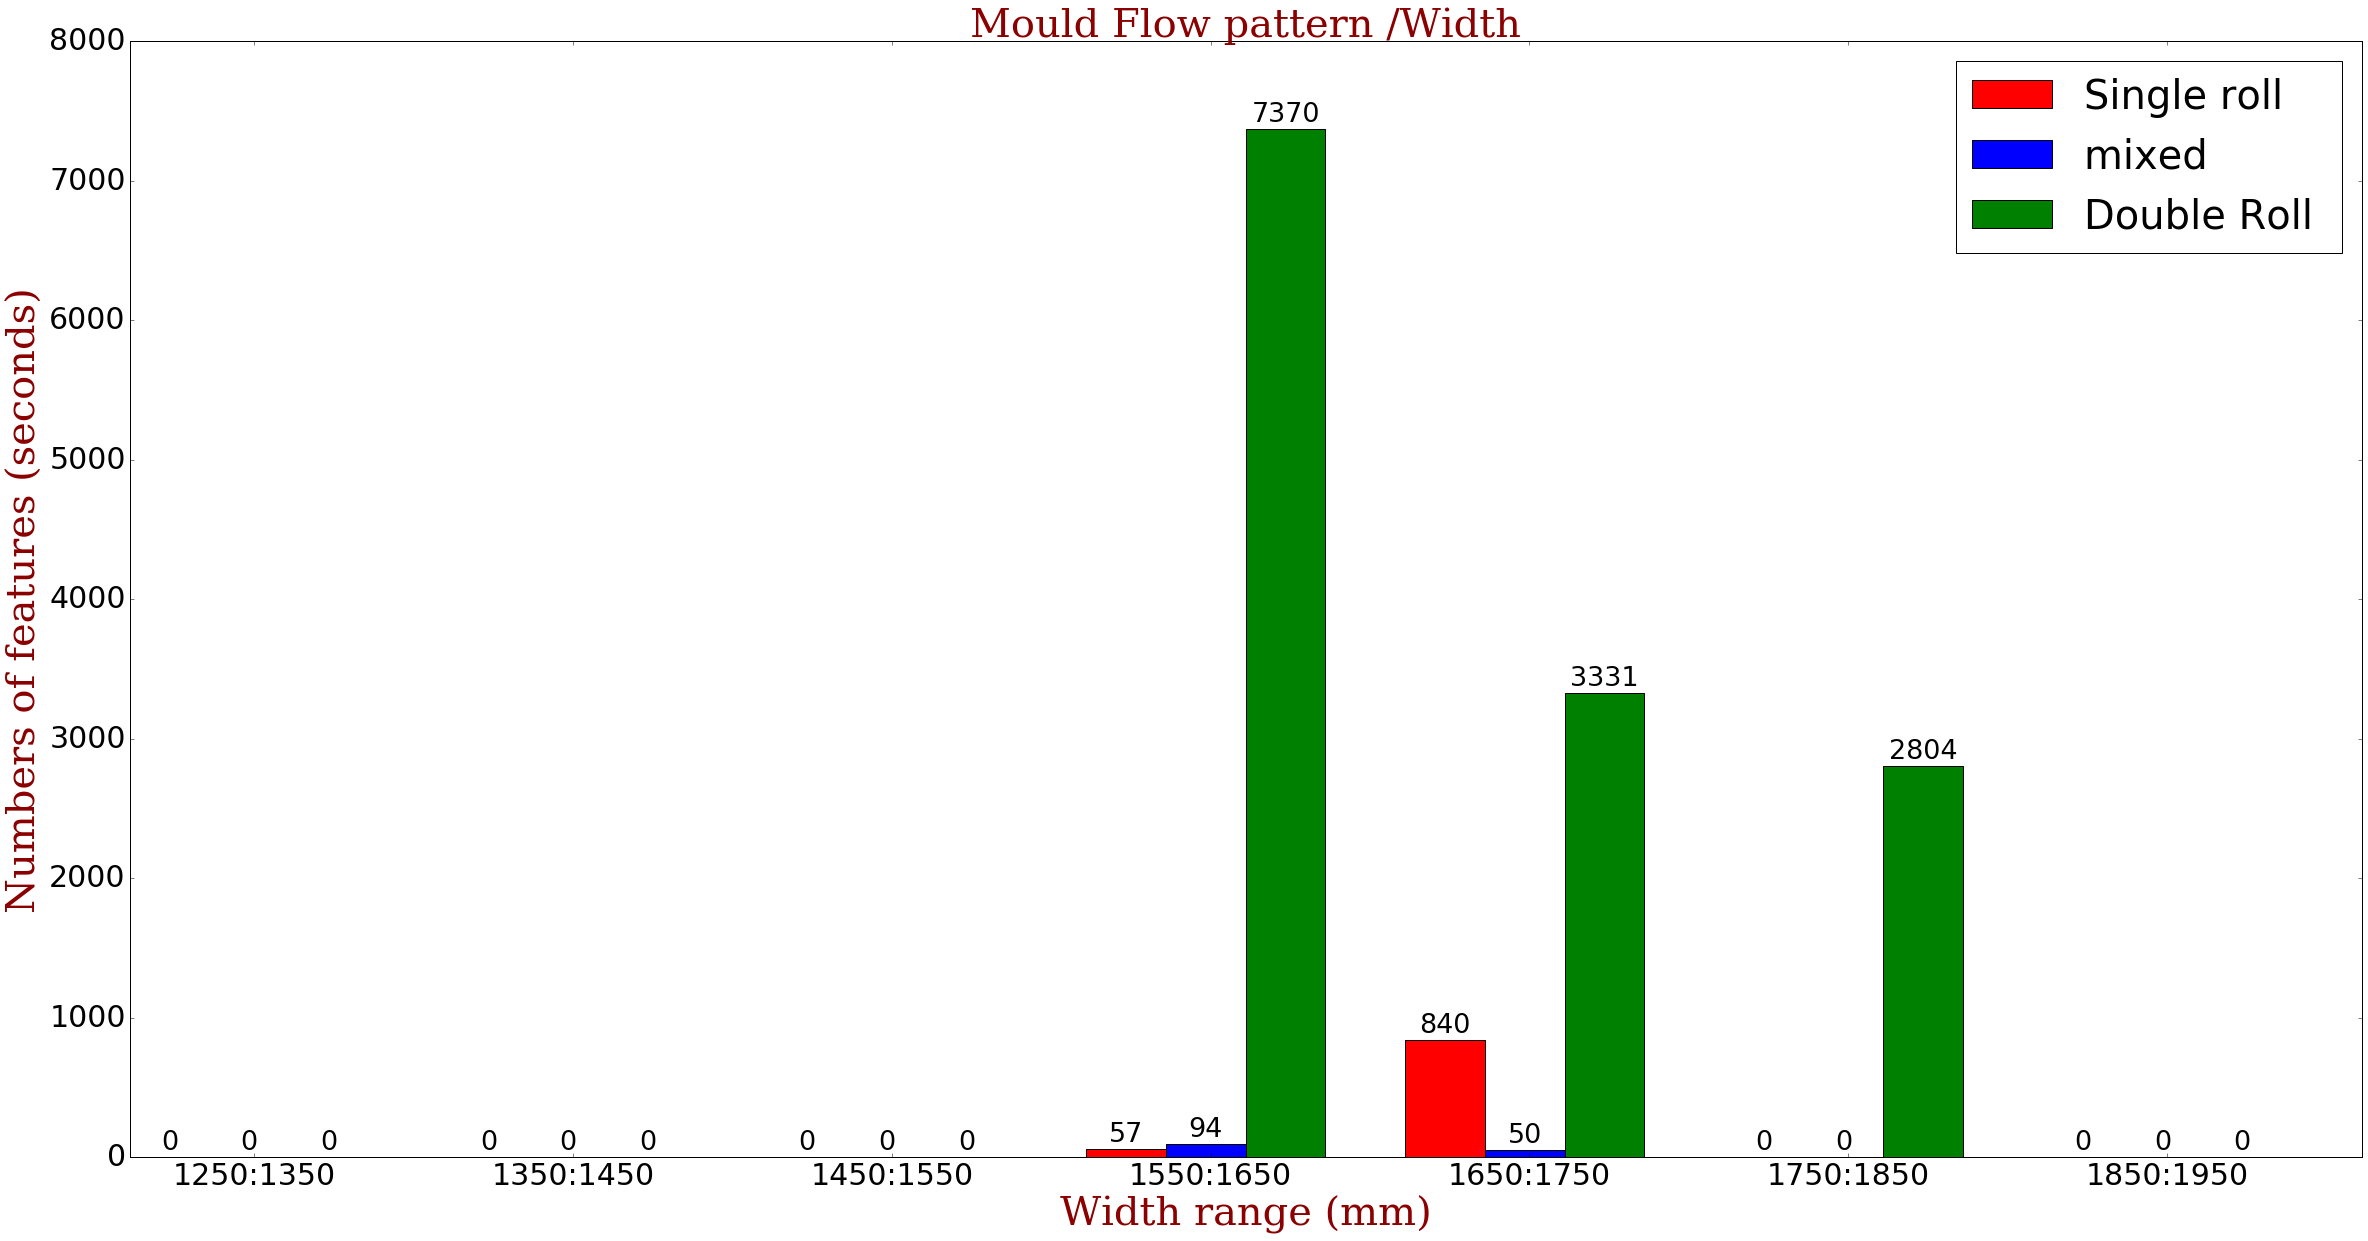

In [104]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1250,1950,100,'Width',list_df[22])
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

# LDA

In [11]:
number_Train=[0,1,9,12,15,20,22]
number_Test=[3,7,8,10,19,21]

In [12]:
df_train=pd.DataFrame()
for i in number_Train:
    df_train = df_train.append(list_df[i])


In [13]:
df_test=pd.DataFrame()
for i in number_Test:
    df_test=df_test.append(list_df[i])

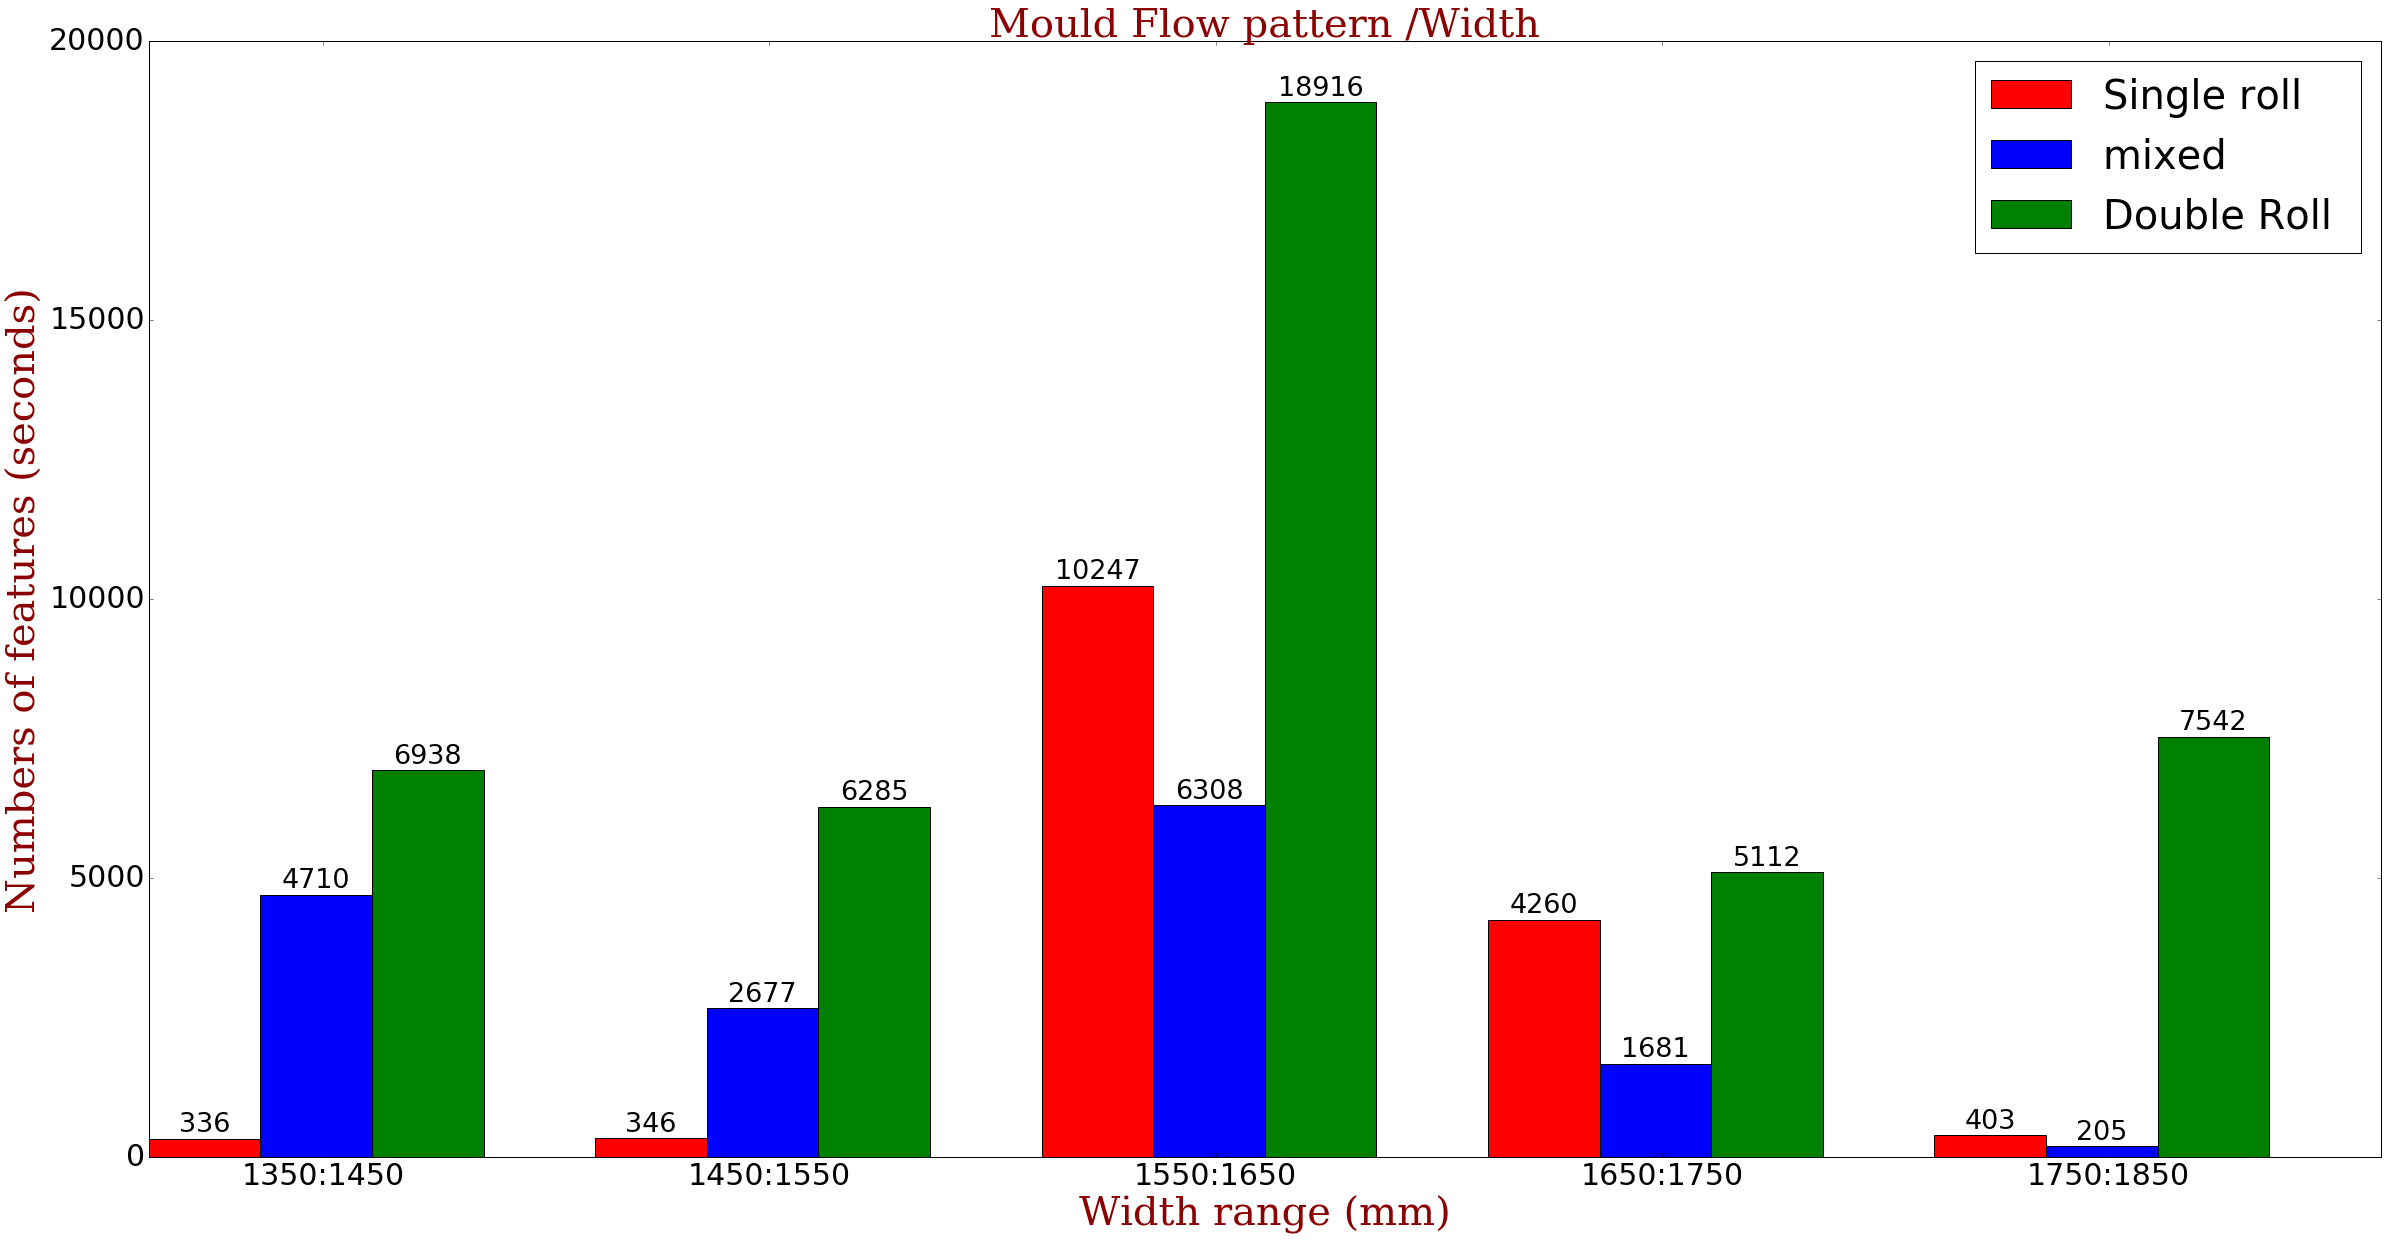

In [25]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1350,1850,100,'Width',df_train)
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')

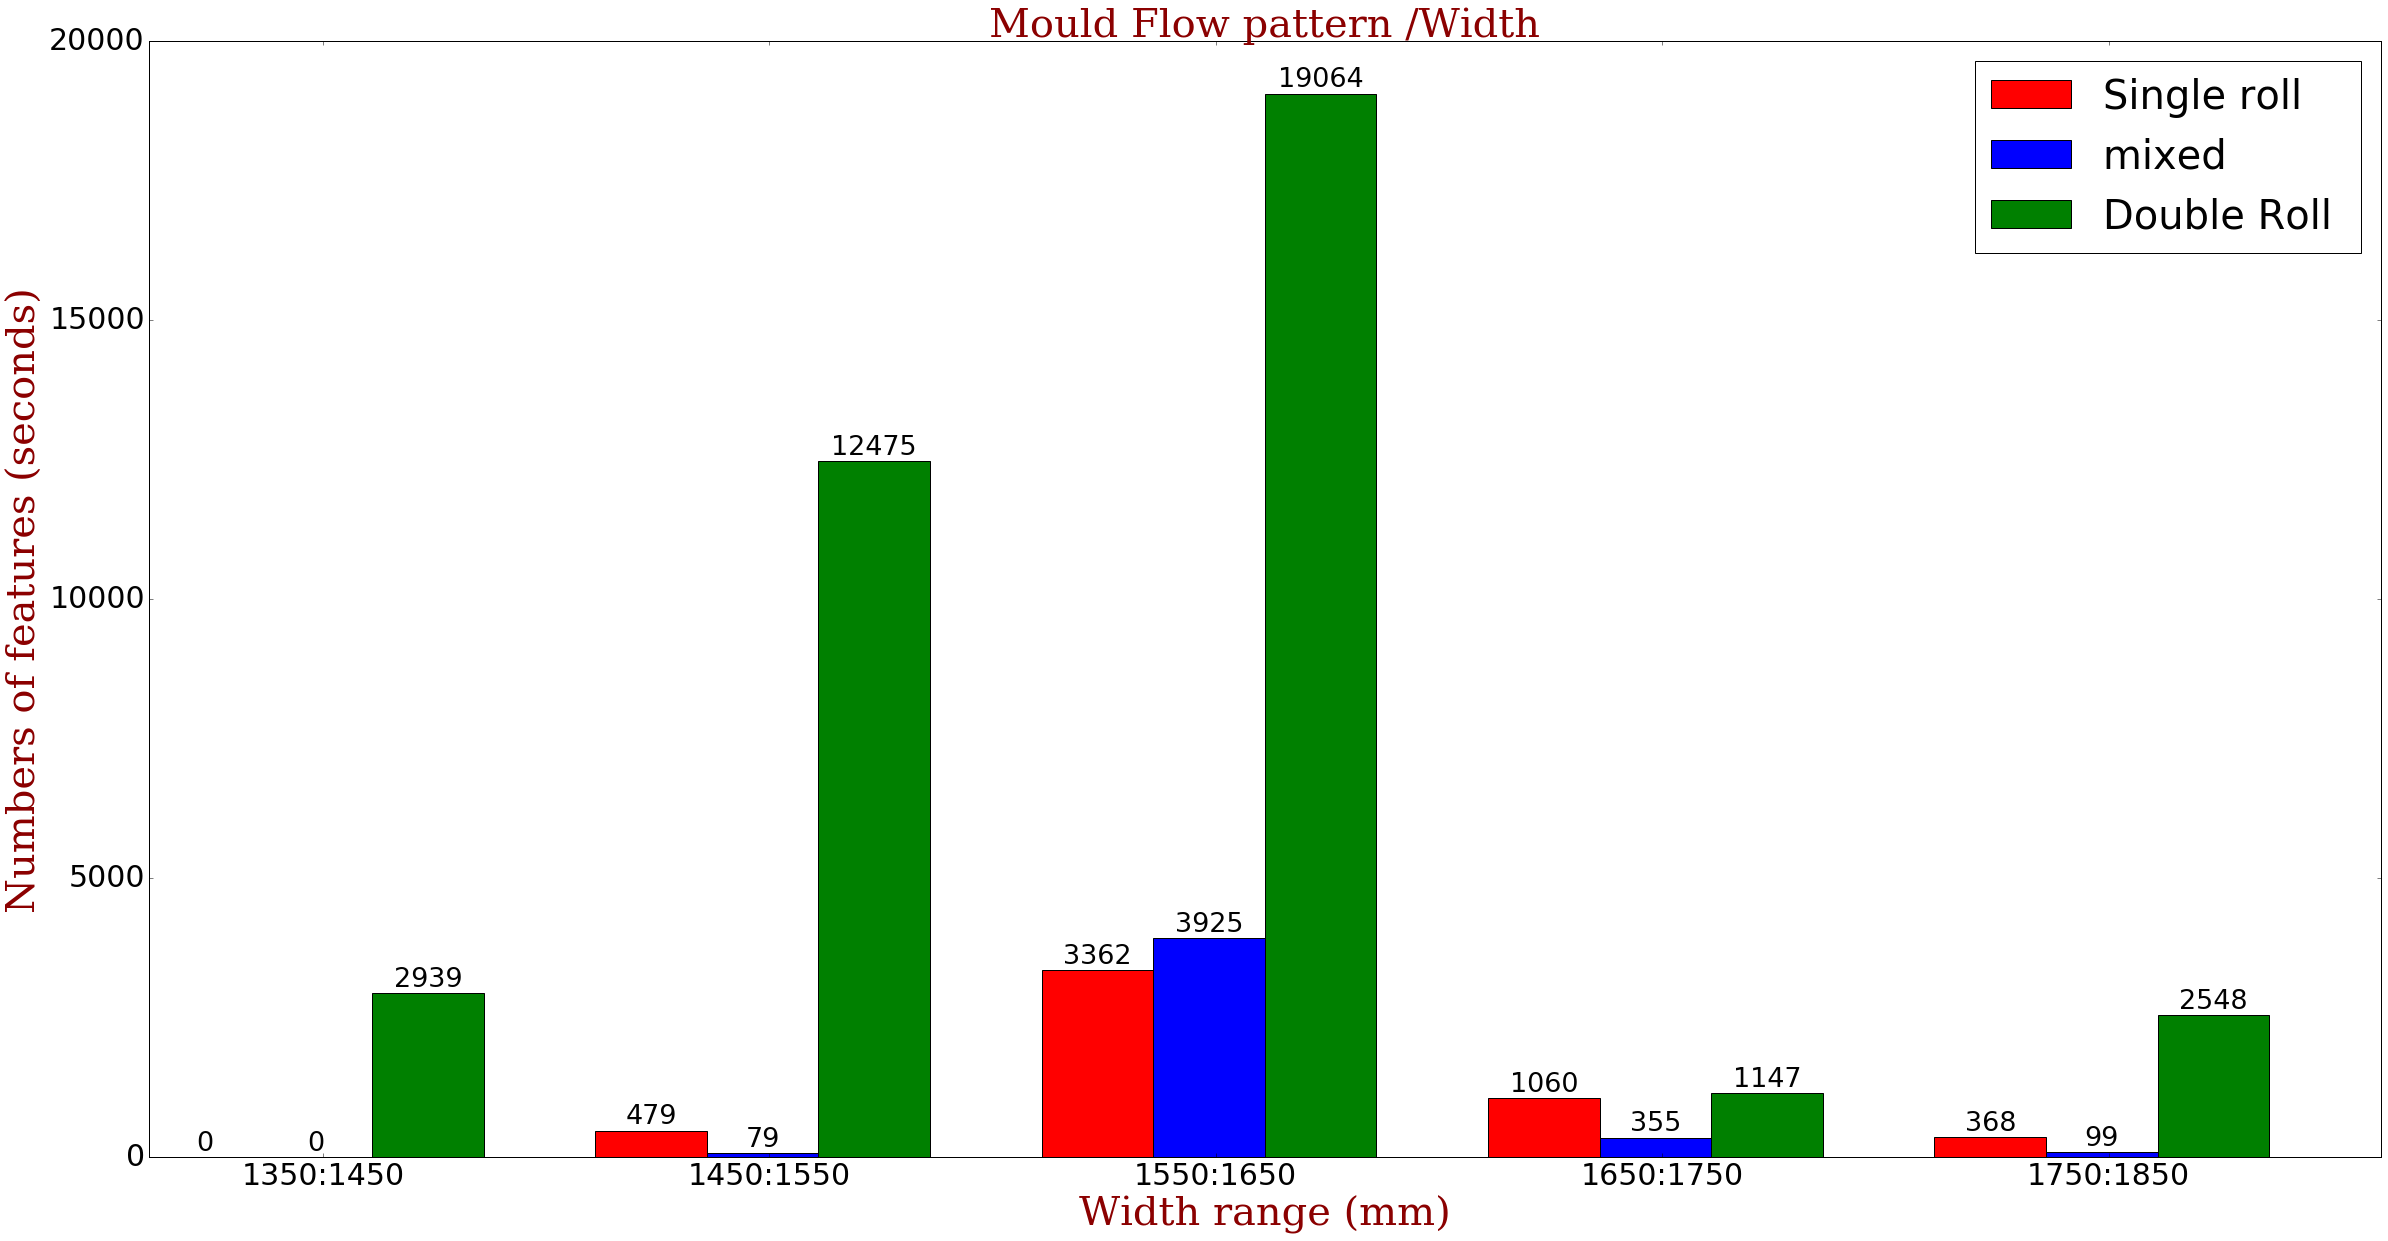

In [26]:
l,SR,DR,MR,Instable,j,Tot=fn_Format(1350,1850,100,'Width',df_test)
fn_plot_TypeE (l,SR,MR,Instable,j,'Width')


In [14]:
df_test_width=df_test[(df_test.Width>1550) & (df_test.Width<1750)]
df_train_width=df_train[(df_train.Width>1550) & (df_train.Width<1750)]


In [28]:
y_list_AM=df_train_width['TypeE'].values
print " 0 =>",sum(1 for i in y_list_AM if i==0)
print " 1 =>",sum(1 for i in y_list_AM if i==1)
print " 2 =>",sum(1 for i in y_list_AM if i==2)
print " 3 =>",sum(1 for i in y_list_AM if i==3)
print "Total => ",len(y_list_AM)

 0 => 0
 1 => 14507
 2 => 24029
 3 => 8007
Total =>  46543


In [29]:
y_list_AM=df_test_width['TypeE'].values
print " 0 =>",sum(1 for i in y_list_AM if i==0)
print " 1 =>",sum(1 for i in y_list_AM if i==1)
print " 2 =>",sum(1 for i in y_list_AM if i==2)
print " 3 =>",sum(1 for i in y_list_AM if i==3)
print "Total => ",len(y_list_AM)

 0 => 0
 1 => 4422
 2 => 20211
 3 => 4280
Total =>  28913


In [30]:
X_Test_width=df_test_width[TC]
Y_Test_width=df_test_width['TypeE']

In [31]:
X_Train_width=df_train_width[TC]
Y_Train_width=df_train_width['TypeE']

In [32]:
LDA_model = LDA(n_components=2)

In [33]:
Y_pred = LDA_model.fit(X_Train_width.values, Y_Train_width.values).predict(X_Test_width.values)


In [34]:
confusion_matrix(Y_Test_width,Y_pred)

array([[ 2884,  1001,   537],
       [  548, 18185,  1478],
       [  500,  3402,   378]])

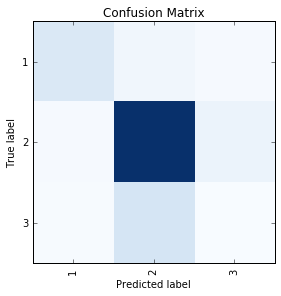

In [35]:
target_names=[1,2,3]
plot_confusion_matrix(confusion_matrix(Y_Test_width,Y_pred))

In [36]:
score= LDA_model.score(X_Test_width,Y_Test_width)
score

0.74177705530384253

In [37]:
print(metrics.classification_report(Y_Test_width, Y_pred))

             precision    recall  f1-score   support

          1       0.73      0.65      0.69      4422
          2       0.81      0.90      0.85     20211
          3       0.16      0.09      0.11      4280

avg / total       0.70      0.74      0.72     28913



In [38]:
def Echantillonnage_Lda(X,y,TypeEchantillonnage):
    # On génère les données en sous-échantillonnant
    verbose = False
    # 'Random under-sampling'
    US = TypeEchantillonnage()
    usx, usy = US.fit_sample(X, y)
    clf_US = LDA()
    #clf_US.fit(usx, usy)
    X_lda_US = clf_US.fit(usx, usy)
    return   X_lda_US ,usy,usx,clf_US

In [39]:
ldaEchanti_width=Echantillonnage_Lda( X_Train_width.values,Y_Train_width.values,RandomUnderSampler)

In [40]:
y_list_AM=ldaEchanti_width[1]
print " 0 =>",sum(1 for i in y_list_AM if i==0)
print " 1 =>",sum(1 for i in y_list_AM if i==1)
print " 2 =>",sum(1 for i in y_list_AM if i==2)
print " 3 =>",sum(1 for i in y_list_AM if i==3)
print "Total => ",len(y_list_AM)

 0 => 0
 1 => 8007
 2 => 8007
 3 => 8007
Total =>  24021


In [41]:
Y_pred = LDA_model.fit(ldaEchanti_width[2], ldaEchanti_width[1]).predict(X_Test_width.values)
confusion_matrix(Y_Test_width,Y_pred)


array([[ 2861,   531,  1030],
       [  410, 15973,  3828],
       [  291,  2679,  1310]])

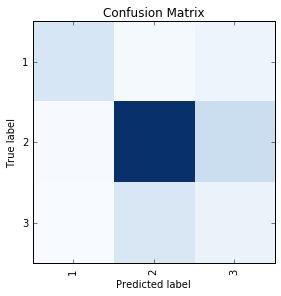

In [42]:
plot_confusion_matrix(confusion_matrix(Y_Test_width,Y_pred))

In [43]:
score=LDA_model.score(X_Test_width,Y_Test_width)
score

0.69671082212153701

In [44]:
print(metrics.classification_report(Y_Test_width, Y_pred))

             precision    recall  f1-score   support

          1       0.80      0.65      0.72      4422
          2       0.83      0.79      0.81     20211
          3       0.21      0.31      0.25      4280

avg / total       0.74      0.70      0.71     28913



In [45]:
a=pd.DataFrame(Y_pred, columns=['pred'])
b=pd.DataFrame(Y_Test_width.values, columns=['real'])
dff=pd.concat([a,b],axis=1)
dff.to_csv(chemin+"pred_real",sep=";",index=False)
    


In [46]:
def plot_contour_GF (df):
    x = np.linspace(1,10,10)
    y = np.linspace(5,1,5) 
    X, Y = np.meshgrid(x, y)
    Z = np.ones_like(X)*df

    plt.contourf(X,Y,Z,1000)

In [47]:
img_neg_neg=df_test_width.iloc[2760,9:59].values.reshape(5,10)
img_pos_pos=df_test_width.iloc[17400,9:59].values.reshape(5,10)

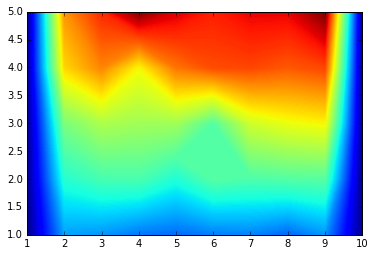

In [48]:
plot_contour_GF(img_neg_neg)

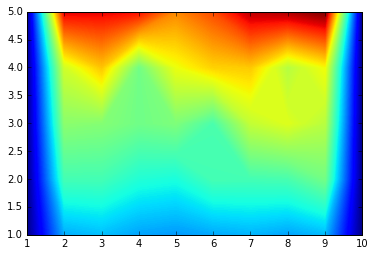

In [49]:
plot_contour_GF(img_pos_pos)

In [62]:
Y_Test_width.values[0]

2

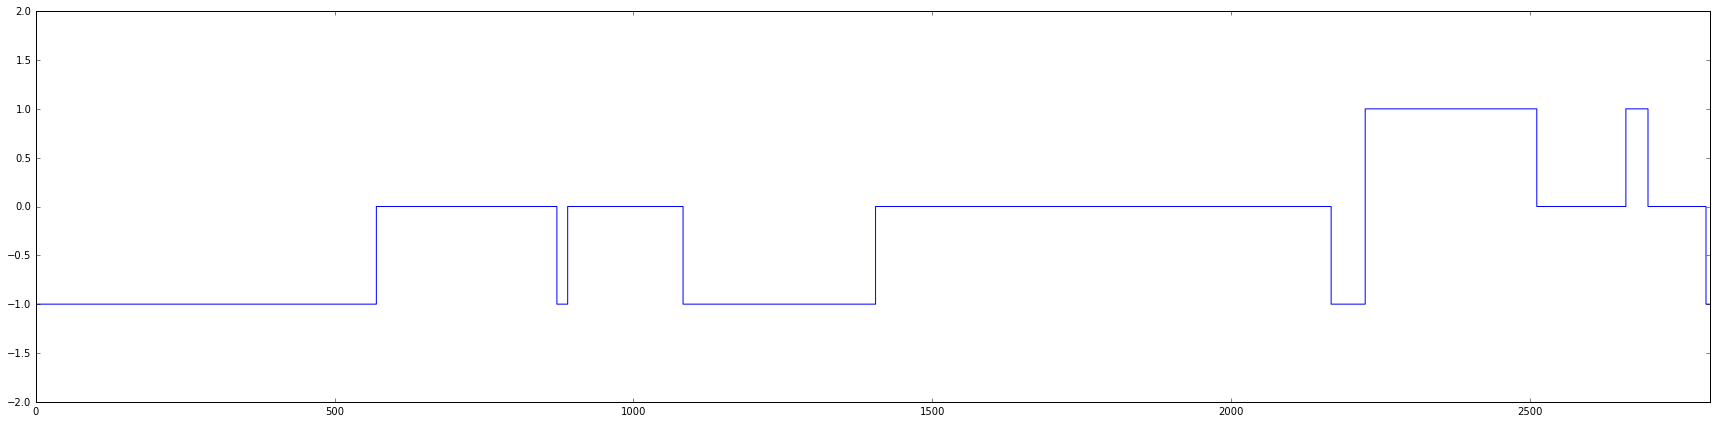

In [110]:
tsr1=Y_Test_width.values
xs=np.repeat(range(len(tsr1)),2)
ys=np.repeat(tsr1,2)
xs=xs[1:]
ys=ys[:-1]
yv1 = -1*(ys==2)+(ys==1)
plt.figure(figsize=(30,7))
plt.plot(xs,yv1)
plt.xlim(0,2800)
plt.ylim(-2,2)
plt.show()

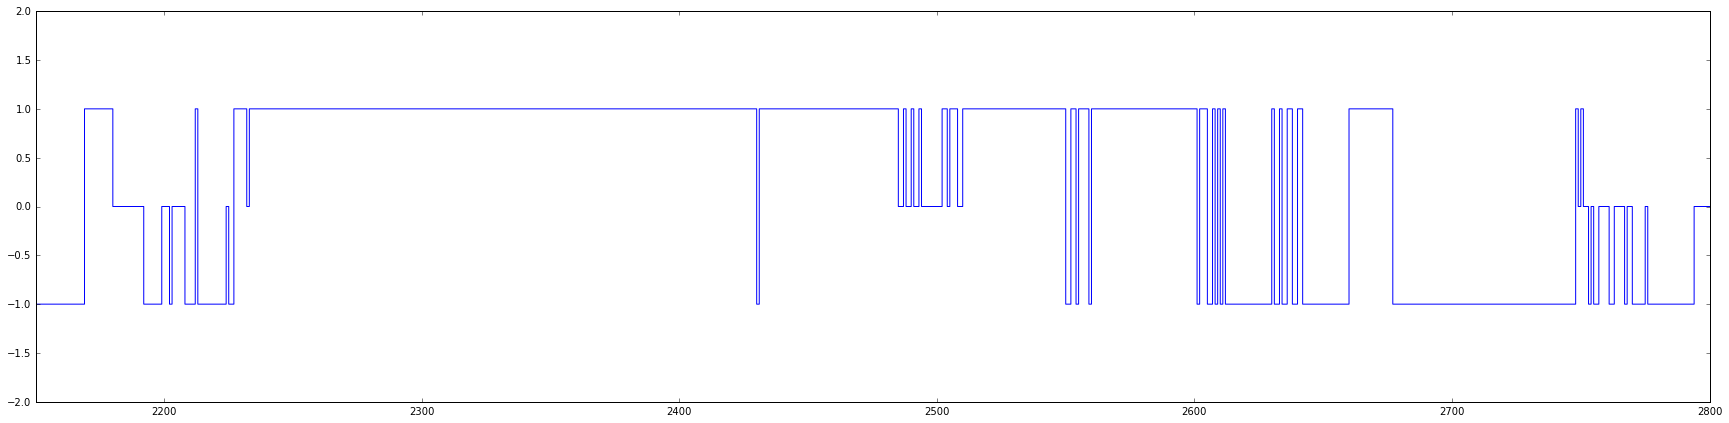

In [107]:
psr1=Y_pred
xs=np.repeat(range(len(psr1)),2)
ys=np.repeat(psr1,2)
xs=xs[1:]
ys=ys[:-1]
yv = -1*(ys==2)+(ys==1)
plt.figure(figsize=(30,7))
plt.plot(xs,yv)
plt.xlim(2150,2800)
plt.ylim(-2,2)
plt.show()

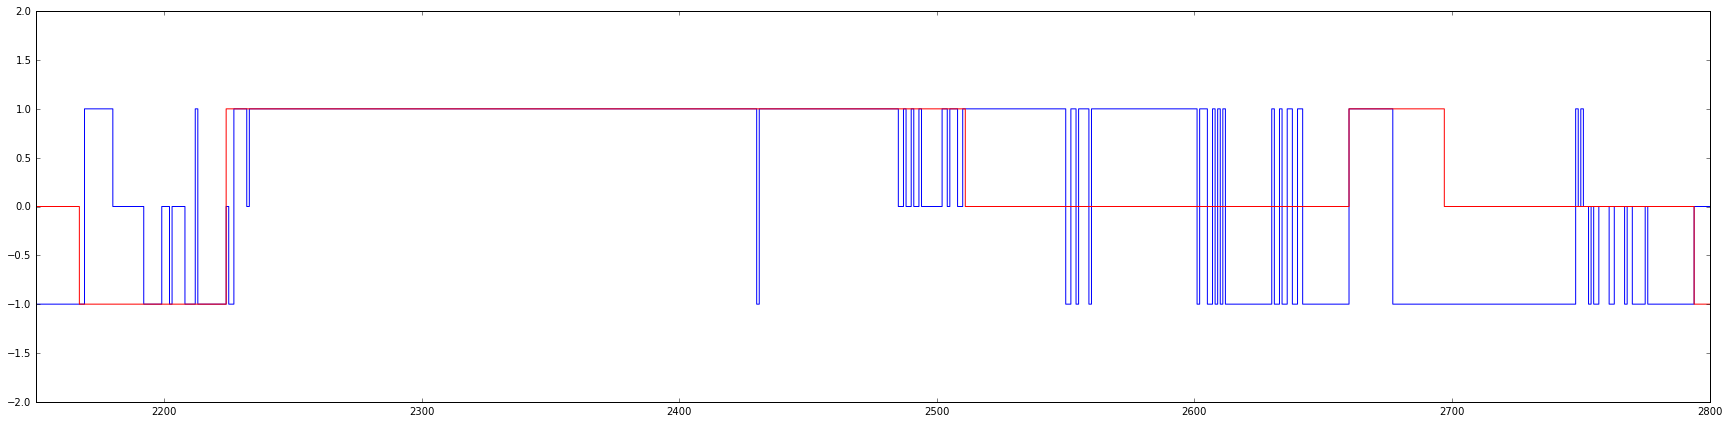

In [109]:
psr1=Y_pred
xs=np.repeat(range(len(psr1)),2)
ys=np.repeat(psr1,2)

xs=xs[1:]
ys=ys[:-1]
yv = -1*(ys==2)+(ys==1)
plt.figure(figsize=(30,7))
plt.plot(xs,yv)
plt.plot(xs,yv1,"r")
plt.xlim(2150,2800)
plt.ylim(-2,2)
plt.show()

In [ ]:
Y_pred